# Face Generation

In this project, you'll define and train a Generative Adverserial network of your own creation on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **defining new architectures training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset has higher resolution images than datasets you have previously worked with (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed-celeba-small/`.

In [1]:
# run this once to unzip the file
#!unzip processed-celeba-small.zip

Archive:  processed-celeba-small.zip
   creating: processed_celeba_small/
  inflating: processed_celeba_small/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/processed_celeba_small/
  inflating: __MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/celeba/
  inflating: processed_celeba_small/celeba/.DS_Store  
   creating: __MACOSX/processed_celeba_small/celeba/
  inflating: __MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/celeba/161982.jpg  
  inflating: processed_celeba_small/celeba/161983.jpg  
  inflating: processed_celeba_small/celeba/161984.jpg  
  inflating: processed_celeba_small/celeba/161985.jpg  
  inflating: processed_celeba_small/celeba/161986.jpg  
  inflating: processed_celeba_small/celeba/161987.jpg  
  inflating: processed_celeb

  inflating: processed_celeba_small/celeba/162142.jpg  
  inflating: processed_celeba_small/celeba/162143.jpg  
  inflating: processed_celeba_small/celeba/162144.jpg  
  inflating: processed_celeba_small/celeba/162145.jpg  
  inflating: processed_celeba_small/celeba/162146.jpg  
  inflating: processed_celeba_small/celeba/162147.jpg  
  inflating: processed_celeba_small/celeba/162148.jpg  
  inflating: processed_celeba_small/celeba/162149.jpg  
  inflating: processed_celeba_small/celeba/162150.jpg  
  inflating: processed_celeba_small/celeba/162151.jpg  
  inflating: processed_celeba_small/celeba/162152.jpg  
  inflating: processed_celeba_small/celeba/162153.jpg  
  inflating: processed_celeba_small/celeba/162154.jpg  
  inflating: processed_celeba_small/celeba/162155.jpg  
  inflating: processed_celeba_small/celeba/162156.jpg  
  inflating: processed_celeba_small/celeba/162157.jpg  
  inflating: processed_celeba_small/celeba/162158.jpg  
  inflating: processed_celeba_small/celeba/16215

  inflating: processed_celeba_small/celeba/162322.jpg  
  inflating: processed_celeba_small/celeba/162323.jpg  
  inflating: processed_celeba_small/celeba/162324.jpg  
  inflating: processed_celeba_small/celeba/162325.jpg  
  inflating: processed_celeba_small/celeba/162326.jpg  
  inflating: processed_celeba_small/celeba/162327.jpg  
  inflating: processed_celeba_small/celeba/162328.jpg  
  inflating: processed_celeba_small/celeba/162329.jpg  
  inflating: processed_celeba_small/celeba/162330.jpg  
  inflating: processed_celeba_small/celeba/162331.jpg  
  inflating: processed_celeba_small/celeba/162332.jpg  
  inflating: processed_celeba_small/celeba/162333.jpg  
  inflating: processed_celeba_small/celeba/162334.jpg  
  inflating: processed_celeba_small/celeba/162335.jpg  
  inflating: processed_celeba_small/celeba/162336.jpg  
  inflating: processed_celeba_small/celeba/162337.jpg  
  inflating: processed_celeba_small/celeba/162338.jpg  
  inflating: processed_celeba_small/celeba/16233

  inflating: processed_celeba_small/celeba/162498.jpg  
  inflating: processed_celeba_small/celeba/162499.jpg  
  inflating: processed_celeba_small/celeba/162500.jpg  
  inflating: processed_celeba_small/celeba/162501.jpg  
  inflating: processed_celeba_small/celeba/162502.jpg  
  inflating: processed_celeba_small/celeba/162503.jpg  
  inflating: processed_celeba_small/celeba/162504.jpg  
  inflating: processed_celeba_small/celeba/162505.jpg  
  inflating: processed_celeba_small/celeba/162506.jpg  
  inflating: processed_celeba_small/celeba/162507.jpg  
  inflating: processed_celeba_small/celeba/162508.jpg  
  inflating: processed_celeba_small/celeba/162509.jpg  
  inflating: processed_celeba_small/celeba/162510.jpg  
  inflating: processed_celeba_small/celeba/162511.jpg  
  inflating: processed_celeba_small/celeba/162512.jpg  
  inflating: processed_celeba_small/celeba/162513.jpg  
  inflating: processed_celeba_small/celeba/162514.jpg  
  inflating: processed_celeba_small/celeba/16251

  inflating: processed_celeba_small/celeba/162686.jpg  
  inflating: processed_celeba_small/celeba/162687.jpg  
  inflating: processed_celeba_small/celeba/162688.jpg  
  inflating: processed_celeba_small/celeba/162689.jpg  
  inflating: processed_celeba_small/celeba/162690.jpg  
  inflating: processed_celeba_small/celeba/162691.jpg  
  inflating: processed_celeba_small/celeba/162692.jpg  
  inflating: processed_celeba_small/celeba/162693.jpg  
  inflating: processed_celeba_small/celeba/162694.jpg  
  inflating: processed_celeba_small/celeba/162695.jpg  
  inflating: processed_celeba_small/celeba/162696.jpg  
  inflating: processed_celeba_small/celeba/162697.jpg  
  inflating: processed_celeba_small/celeba/162698.jpg  
  inflating: processed_celeba_small/celeba/162699.jpg  
  inflating: processed_celeba_small/celeba/162700.jpg  
  inflating: processed_celeba_small/celeba/162701.jpg  
  inflating: processed_celeba_small/celeba/162702.jpg  
  inflating: processed_celeba_small/celeba/16270

  inflating: processed_celeba_small/celeba/162868.jpg  
  inflating: processed_celeba_small/celeba/162869.jpg  
  inflating: processed_celeba_small/celeba/162870.jpg  
  inflating: processed_celeba_small/celeba/162871.jpg  
  inflating: processed_celeba_small/celeba/162872.jpg  
  inflating: processed_celeba_small/celeba/162873.jpg  
  inflating: processed_celeba_small/celeba/162874.jpg  
  inflating: processed_celeba_small/celeba/162875.jpg  
  inflating: processed_celeba_small/celeba/162876.jpg  
  inflating: processed_celeba_small/celeba/162877.jpg  
  inflating: processed_celeba_small/celeba/162878.jpg  
  inflating: processed_celeba_small/celeba/162879.jpg  
  inflating: processed_celeba_small/celeba/162880.jpg  
  inflating: processed_celeba_small/celeba/162881.jpg  
  inflating: processed_celeba_small/celeba/162882.jpg  
  inflating: processed_celeba_small/celeba/162883.jpg  
  inflating: processed_celeba_small/celeba/162884.jpg  
  inflating: processed_celeba_small/celeba/16288

  inflating: processed_celeba_small/celeba/163029.jpg  
  inflating: processed_celeba_small/celeba/163030.jpg  
  inflating: processed_celeba_small/celeba/163031.jpg  
  inflating: processed_celeba_small/celeba/163032.jpg  
  inflating: processed_celeba_small/celeba/163033.jpg  
  inflating: processed_celeba_small/celeba/163034.jpg  
  inflating: processed_celeba_small/celeba/163035.jpg  
  inflating: processed_celeba_small/celeba/163036.jpg  
  inflating: processed_celeba_small/celeba/163037.jpg  
  inflating: processed_celeba_small/celeba/163038.jpg  
  inflating: processed_celeba_small/celeba/163039.jpg  
  inflating: processed_celeba_small/celeba/163040.jpg  
  inflating: processed_celeba_small/celeba/163041.jpg  
  inflating: processed_celeba_small/celeba/163042.jpg  
  inflating: processed_celeba_small/celeba/163043.jpg  
  inflating: processed_celeba_small/celeba/163044.jpg  
  inflating: processed_celeba_small/celeba/163045.jpg  
  inflating: processed_celeba_small/celeba/16304

  inflating: processed_celeba_small/celeba/163215.jpg  
  inflating: processed_celeba_small/celeba/163216.jpg  
  inflating: processed_celeba_small/celeba/163217.jpg  
  inflating: processed_celeba_small/celeba/163218.jpg  
  inflating: processed_celeba_small/celeba/163219.jpg  
  inflating: processed_celeba_small/celeba/163220.jpg  
  inflating: processed_celeba_small/celeba/163221.jpg  
  inflating: processed_celeba_small/celeba/163222.jpg  
  inflating: processed_celeba_small/celeba/163223.jpg  
  inflating: processed_celeba_small/celeba/163224.jpg  
  inflating: processed_celeba_small/celeba/163225.jpg  
  inflating: processed_celeba_small/celeba/163226.jpg  
  inflating: processed_celeba_small/celeba/163227.jpg  
  inflating: processed_celeba_small/celeba/163228.jpg  
  inflating: processed_celeba_small/celeba/163229.jpg  
  inflating: processed_celeba_small/celeba/163230.jpg  
  inflating: processed_celeba_small/celeba/163231.jpg  
  inflating: processed_celeba_small/celeba/16323

  inflating: processed_celeba_small/celeba/163393.jpg  
  inflating: processed_celeba_small/celeba/163394.jpg  
  inflating: processed_celeba_small/celeba/163395.jpg  
  inflating: processed_celeba_small/celeba/163396.jpg  
  inflating: processed_celeba_small/celeba/163397.jpg  
  inflating: processed_celeba_small/celeba/163398.jpg  
  inflating: processed_celeba_small/celeba/163399.jpg  
  inflating: processed_celeba_small/celeba/163400.jpg  
  inflating: processed_celeba_small/celeba/163401.jpg  
  inflating: processed_celeba_small/celeba/163402.jpg  
  inflating: processed_celeba_small/celeba/163403.jpg  
  inflating: processed_celeba_small/celeba/163404.jpg  
  inflating: processed_celeba_small/celeba/163405.jpg  
  inflating: processed_celeba_small/celeba/163406.jpg  
  inflating: processed_celeba_small/celeba/163407.jpg  
  inflating: processed_celeba_small/celeba/163408.jpg  
  inflating: processed_celeba_small/celeba/163409.jpg  
  inflating: processed_celeba_small/celeba/16341

  inflating: processed_celeba_small/celeba/163569.jpg  
  inflating: processed_celeba_small/celeba/163570.jpg  
  inflating: processed_celeba_small/celeba/163571.jpg  
  inflating: processed_celeba_small/celeba/163572.jpg  
  inflating: processed_celeba_small/celeba/163573.jpg  
  inflating: processed_celeba_small/celeba/163574.jpg  
  inflating: processed_celeba_small/celeba/163575.jpg  
  inflating: processed_celeba_small/celeba/163576.jpg  
  inflating: processed_celeba_small/celeba/163577.jpg  
  inflating: processed_celeba_small/celeba/163578.jpg  
  inflating: processed_celeba_small/celeba/163579.jpg  
  inflating: processed_celeba_small/celeba/163580.jpg  
  inflating: processed_celeba_small/celeba/163581.jpg  
  inflating: processed_celeba_small/celeba/163582.jpg  
  inflating: processed_celeba_small/celeba/163583.jpg  
  inflating: processed_celeba_small/celeba/163584.jpg  
  inflating: processed_celeba_small/celeba/163585.jpg  
  inflating: processed_celeba_small/celeba/16358

  inflating: processed_celeba_small/celeba/163737.jpg  
  inflating: processed_celeba_small/celeba/163738.jpg  
  inflating: processed_celeba_small/celeba/163739.jpg  
  inflating: processed_celeba_small/celeba/163740.jpg  
  inflating: processed_celeba_small/celeba/163741.jpg  
  inflating: processed_celeba_small/celeba/163742.jpg  
  inflating: processed_celeba_small/celeba/163743.jpg  
  inflating: processed_celeba_small/celeba/163744.jpg  
  inflating: processed_celeba_small/celeba/163745.jpg  
  inflating: processed_celeba_small/celeba/163746.jpg  
  inflating: processed_celeba_small/celeba/163747.jpg  
  inflating: processed_celeba_small/celeba/163748.jpg  
  inflating: processed_celeba_small/celeba/163749.jpg  
  inflating: processed_celeba_small/celeba/163750.jpg  
  inflating: processed_celeba_small/celeba/163751.jpg  
  inflating: processed_celeba_small/celeba/163752.jpg  
  inflating: processed_celeba_small/celeba/163753.jpg  
  inflating: processed_celeba_small/celeba/16375

  inflating: processed_celeba_small/celeba/163899.jpg  
  inflating: processed_celeba_small/celeba/163900.jpg  
  inflating: processed_celeba_small/celeba/163901.jpg  
  inflating: processed_celeba_small/celeba/163902.jpg  
  inflating: processed_celeba_small/celeba/163903.jpg  
  inflating: processed_celeba_small/celeba/163904.jpg  
  inflating: processed_celeba_small/celeba/163905.jpg  
  inflating: processed_celeba_small/celeba/163906.jpg  
  inflating: processed_celeba_small/celeba/163907.jpg  
  inflating: processed_celeba_small/celeba/163908.jpg  
  inflating: processed_celeba_small/celeba/163909.jpg  
  inflating: processed_celeba_small/celeba/163910.jpg  
  inflating: processed_celeba_small/celeba/163911.jpg  
  inflating: processed_celeba_small/celeba/163912.jpg  
  inflating: processed_celeba_small/celeba/163913.jpg  
  inflating: processed_celeba_small/celeba/163914.jpg  
  inflating: processed_celeba_small/celeba/163915.jpg  
  inflating: processed_celeba_small/celeba/16391

  inflating: processed_celeba_small/celeba/164070.jpg  
  inflating: processed_celeba_small/celeba/164071.jpg  
  inflating: processed_celeba_small/celeba/164072.jpg  
  inflating: processed_celeba_small/celeba/164073.jpg  
  inflating: processed_celeba_small/celeba/164074.jpg  
  inflating: processed_celeba_small/celeba/164075.jpg  
  inflating: processed_celeba_small/celeba/164076.jpg  
  inflating: processed_celeba_small/celeba/164077.jpg  
  inflating: processed_celeba_small/celeba/164078.jpg  
  inflating: processed_celeba_small/celeba/164079.jpg  
  inflating: processed_celeba_small/celeba/164080.jpg  
  inflating: processed_celeba_small/celeba/164081.jpg  
  inflating: processed_celeba_small/celeba/164082.jpg  
  inflating: processed_celeba_small/celeba/164083.jpg  
  inflating: processed_celeba_small/celeba/164084.jpg  
  inflating: processed_celeba_small/celeba/164085.jpg  
  inflating: processed_celeba_small/celeba/164086.jpg  
  inflating: processed_celeba_small/celeba/16408

  inflating: processed_celeba_small/celeba/164250.jpg  
  inflating: processed_celeba_small/celeba/164251.jpg  
  inflating: processed_celeba_small/celeba/164252.jpg  
  inflating: processed_celeba_small/celeba/164253.jpg  
  inflating: processed_celeba_small/celeba/164254.jpg  
  inflating: processed_celeba_small/celeba/164255.jpg  
  inflating: processed_celeba_small/celeba/164256.jpg  
  inflating: processed_celeba_small/celeba/164257.jpg  
  inflating: processed_celeba_small/celeba/164258.jpg  
  inflating: processed_celeba_small/celeba/164259.jpg  
  inflating: processed_celeba_small/celeba/164260.jpg  
  inflating: processed_celeba_small/celeba/164261.jpg  
  inflating: processed_celeba_small/celeba/164262.jpg  
  inflating: processed_celeba_small/celeba/164263.jpg  
  inflating: processed_celeba_small/celeba/164264.jpg  
  inflating: processed_celeba_small/celeba/164265.jpg  
  inflating: processed_celeba_small/celeba/164266.jpg  
  inflating: processed_celeba_small/celeba/16426

  inflating: processed_celeba_small/celeba/164427.jpg  
  inflating: processed_celeba_small/celeba/164428.jpg  
  inflating: processed_celeba_small/celeba/164429.jpg  
  inflating: processed_celeba_small/celeba/164430.jpg  
  inflating: processed_celeba_small/celeba/164431.jpg  
  inflating: processed_celeba_small/celeba/164432.jpg  
  inflating: processed_celeba_small/celeba/164433.jpg  
  inflating: processed_celeba_small/celeba/164434.jpg  
  inflating: processed_celeba_small/celeba/164435.jpg  
  inflating: processed_celeba_small/celeba/164436.jpg  
  inflating: processed_celeba_small/celeba/164437.jpg  
  inflating: processed_celeba_small/celeba/164438.jpg  
  inflating: processed_celeba_small/celeba/164439.jpg  
  inflating: processed_celeba_small/celeba/164440.jpg  
  inflating: processed_celeba_small/celeba/164441.jpg  
  inflating: processed_celeba_small/celeba/164442.jpg  
  inflating: processed_celeba_small/celeba/164443.jpg  
  inflating: processed_celeba_small/celeba/16444

  inflating: processed_celeba_small/celeba/164606.jpg  
  inflating: processed_celeba_small/celeba/164607.jpg  
  inflating: processed_celeba_small/celeba/164608.jpg  
  inflating: processed_celeba_small/celeba/164609.jpg  
  inflating: processed_celeba_small/celeba/164610.jpg  
  inflating: processed_celeba_small/celeba/164611.jpg  
  inflating: processed_celeba_small/celeba/164612.jpg  
  inflating: processed_celeba_small/celeba/164613.jpg  
  inflating: processed_celeba_small/celeba/164614.jpg  
  inflating: processed_celeba_small/celeba/164615.jpg  
  inflating: processed_celeba_small/celeba/164616.jpg  
  inflating: processed_celeba_small/celeba/164617.jpg  
  inflating: processed_celeba_small/celeba/164618.jpg  
  inflating: processed_celeba_small/celeba/164619.jpg  
  inflating: processed_celeba_small/celeba/164620.jpg  
  inflating: processed_celeba_small/celeba/164621.jpg  
  inflating: processed_celeba_small/celeba/164622.jpg  
  inflating: processed_celeba_small/celeba/16462

  inflating: processed_celeba_small/celeba/164786.jpg  
  inflating: processed_celeba_small/celeba/164787.jpg  
  inflating: processed_celeba_small/celeba/164788.jpg  
  inflating: processed_celeba_small/celeba/164789.jpg  
  inflating: processed_celeba_small/celeba/164790.jpg  
  inflating: processed_celeba_small/celeba/164791.jpg  
  inflating: processed_celeba_small/celeba/164792.jpg  
  inflating: processed_celeba_small/celeba/164793.jpg  
  inflating: processed_celeba_small/celeba/164794.jpg  
  inflating: processed_celeba_small/celeba/164795.jpg  
  inflating: processed_celeba_small/celeba/164796.jpg  
  inflating: processed_celeba_small/celeba/164797.jpg  
  inflating: processed_celeba_small/celeba/164798.jpg  
  inflating: processed_celeba_small/celeba/164799.jpg  
  inflating: processed_celeba_small/celeba/164800.jpg  
  inflating: processed_celeba_small/celeba/164801.jpg  
  inflating: processed_celeba_small/celeba/164802.jpg  
  inflating: processed_celeba_small/celeba/16480

  inflating: processed_celeba_small/celeba/164966.jpg  
  inflating: processed_celeba_small/celeba/164967.jpg  
  inflating: processed_celeba_small/celeba/164968.jpg  
  inflating: processed_celeba_small/celeba/164969.jpg  
  inflating: processed_celeba_small/celeba/164970.jpg  
  inflating: processed_celeba_small/celeba/164971.jpg  
  inflating: processed_celeba_small/celeba/164972.jpg  
  inflating: processed_celeba_small/celeba/164973.jpg  
  inflating: processed_celeba_small/celeba/164974.jpg  
  inflating: processed_celeba_small/celeba/164975.jpg  
  inflating: processed_celeba_small/celeba/164976.jpg  
  inflating: processed_celeba_small/celeba/164977.jpg  
  inflating: processed_celeba_small/celeba/164978.jpg  
  inflating: processed_celeba_small/celeba/164979.jpg  
  inflating: processed_celeba_small/celeba/164980.jpg  
  inflating: processed_celeba_small/celeba/164981.jpg  
  inflating: processed_celeba_small/celeba/164982.jpg  
  inflating: processed_celeba_small/celeba/16498

  inflating: processed_celeba_small/celeba/165150.jpg  
  inflating: processed_celeba_small/celeba/165151.jpg  
  inflating: processed_celeba_small/celeba/165152.jpg  
  inflating: processed_celeba_small/celeba/165153.jpg  
  inflating: processed_celeba_small/celeba/165154.jpg  
  inflating: processed_celeba_small/celeba/165155.jpg  
  inflating: processed_celeba_small/celeba/165156.jpg  
  inflating: processed_celeba_small/celeba/165157.jpg  
  inflating: processed_celeba_small/celeba/165158.jpg  
  inflating: processed_celeba_small/celeba/165159.jpg  
  inflating: processed_celeba_small/celeba/165160.jpg  
  inflating: processed_celeba_small/celeba/165161.jpg  
  inflating: processed_celeba_small/celeba/165162.jpg  
  inflating: processed_celeba_small/celeba/165163.jpg  
  inflating: processed_celeba_small/celeba/165164.jpg  
  inflating: processed_celeba_small/celeba/165165.jpg  
  inflating: processed_celeba_small/celeba/165166.jpg  
  inflating: processed_celeba_small/celeba/16516

  inflating: processed_celeba_small/celeba/165332.jpg  
  inflating: processed_celeba_small/celeba/165333.jpg  
  inflating: processed_celeba_small/celeba/165334.jpg  
  inflating: processed_celeba_small/celeba/165335.jpg  
  inflating: processed_celeba_small/celeba/165336.jpg  
  inflating: processed_celeba_small/celeba/165337.jpg  
  inflating: processed_celeba_small/celeba/165338.jpg  
  inflating: processed_celeba_small/celeba/165339.jpg  
  inflating: processed_celeba_small/celeba/165340.jpg  
  inflating: processed_celeba_small/celeba/165341.jpg  
  inflating: processed_celeba_small/celeba/165342.jpg  
  inflating: processed_celeba_small/celeba/165343.jpg  
  inflating: processed_celeba_small/celeba/165344.jpg  
  inflating: processed_celeba_small/celeba/165345.jpg  
  inflating: processed_celeba_small/celeba/165346.jpg  
  inflating: processed_celeba_small/celeba/165347.jpg  
  inflating: processed_celeba_small/celeba/165348.jpg  
  inflating: processed_celeba_small/celeba/16534

  inflating: processed_celeba_small/celeba/165520.jpg  
  inflating: processed_celeba_small/celeba/165521.jpg  
  inflating: processed_celeba_small/celeba/165522.jpg  
  inflating: processed_celeba_small/celeba/165523.jpg  
  inflating: processed_celeba_small/celeba/165524.jpg  
  inflating: processed_celeba_small/celeba/165525.jpg  
  inflating: processed_celeba_small/celeba/165526.jpg  
  inflating: processed_celeba_small/celeba/165527.jpg  
  inflating: processed_celeba_small/celeba/165528.jpg  
  inflating: processed_celeba_small/celeba/165529.jpg  
  inflating: processed_celeba_small/celeba/165530.jpg  
  inflating: processed_celeba_small/celeba/165531.jpg  
  inflating: processed_celeba_small/celeba/165532.jpg  
  inflating: processed_celeba_small/celeba/165533.jpg  
  inflating: processed_celeba_small/celeba/165534.jpg  
  inflating: processed_celeba_small/celeba/165535.jpg  
  inflating: processed_celeba_small/celeba/165536.jpg  
  inflating: processed_celeba_small/celeba/16553

  inflating: processed_celeba_small/celeba/165705.jpg  
  inflating: processed_celeba_small/celeba/165706.jpg  
  inflating: processed_celeba_small/celeba/165707.jpg  
  inflating: processed_celeba_small/celeba/165708.jpg  
  inflating: processed_celeba_small/celeba/165709.jpg  
  inflating: processed_celeba_small/celeba/165710.jpg  
  inflating: processed_celeba_small/celeba/165711.jpg  
  inflating: processed_celeba_small/celeba/165712.jpg  
  inflating: processed_celeba_small/celeba/165713.jpg  
  inflating: processed_celeba_small/celeba/165714.jpg  
  inflating: processed_celeba_small/celeba/165715.jpg  
  inflating: processed_celeba_small/celeba/165716.jpg  
  inflating: processed_celeba_small/celeba/165717.jpg  
  inflating: processed_celeba_small/celeba/165718.jpg  
  inflating: processed_celeba_small/celeba/165719.jpg  
  inflating: processed_celeba_small/celeba/165720.jpg  
  inflating: processed_celeba_small/celeba/165721.jpg  
  inflating: processed_celeba_small/celeba/16572

  inflating: processed_celeba_small/celeba/165889.jpg  
  inflating: processed_celeba_small/celeba/165890.jpg  
  inflating: processed_celeba_small/celeba/165891.jpg  
  inflating: processed_celeba_small/celeba/165892.jpg  
  inflating: processed_celeba_small/celeba/165893.jpg  
  inflating: processed_celeba_small/celeba/165894.jpg  
  inflating: processed_celeba_small/celeba/165895.jpg  
  inflating: processed_celeba_small/celeba/165896.jpg  
  inflating: processed_celeba_small/celeba/165897.jpg  
  inflating: processed_celeba_small/celeba/165898.jpg  
  inflating: processed_celeba_small/celeba/165899.jpg  
  inflating: processed_celeba_small/celeba/165900.jpg  
  inflating: processed_celeba_small/celeba/165901.jpg  
  inflating: processed_celeba_small/celeba/165902.jpg  
  inflating: processed_celeba_small/celeba/165903.jpg  
  inflating: processed_celeba_small/celeba/165904.jpg  
  inflating: processed_celeba_small/celeba/165905.jpg  
  inflating: processed_celeba_small/celeba/16590

  inflating: processed_celeba_small/celeba/166075.jpg  
  inflating: processed_celeba_small/celeba/166076.jpg  
  inflating: processed_celeba_small/celeba/166077.jpg  
  inflating: processed_celeba_small/celeba/166078.jpg  
  inflating: processed_celeba_small/celeba/166079.jpg  
  inflating: processed_celeba_small/celeba/166080.jpg  
  inflating: processed_celeba_small/celeba/166081.jpg  
  inflating: processed_celeba_small/celeba/166082.jpg  
  inflating: processed_celeba_small/celeba/166083.jpg  
  inflating: processed_celeba_small/celeba/166084.jpg  
  inflating: processed_celeba_small/celeba/166085.jpg  
  inflating: processed_celeba_small/celeba/166086.jpg  
  inflating: processed_celeba_small/celeba/166087.jpg  
  inflating: processed_celeba_small/celeba/166088.jpg  
  inflating: processed_celeba_small/celeba/166089.jpg  
  inflating: processed_celeba_small/celeba/166090.jpg  
  inflating: processed_celeba_small/celeba/166091.jpg  
  inflating: processed_celeba_small/celeba/16609

  inflating: processed_celeba_small/celeba/166260.jpg  
  inflating: processed_celeba_small/celeba/166261.jpg  
  inflating: processed_celeba_small/celeba/166262.jpg  
  inflating: processed_celeba_small/celeba/166263.jpg  
  inflating: processed_celeba_small/celeba/166264.jpg  
  inflating: processed_celeba_small/celeba/166265.jpg  
  inflating: processed_celeba_small/celeba/166266.jpg  
  inflating: processed_celeba_small/celeba/166267.jpg  
  inflating: processed_celeba_small/celeba/166268.jpg  
  inflating: processed_celeba_small/celeba/166269.jpg  
  inflating: processed_celeba_small/celeba/166270.jpg  
  inflating: processed_celeba_small/celeba/166271.jpg  
  inflating: processed_celeba_small/celeba/166272.jpg  
  inflating: processed_celeba_small/celeba/166273.jpg  
  inflating: processed_celeba_small/celeba/166274.jpg  
  inflating: processed_celeba_small/celeba/166275.jpg  
  inflating: processed_celeba_small/celeba/166276.jpg  
  inflating: processed_celeba_small/celeba/16627

  inflating: processed_celeba_small/celeba/166448.jpg  
  inflating: processed_celeba_small/celeba/166449.jpg  
  inflating: processed_celeba_small/celeba/166450.jpg  
  inflating: processed_celeba_small/celeba/166451.jpg  
  inflating: processed_celeba_small/celeba/166452.jpg  
  inflating: processed_celeba_small/celeba/166453.jpg  
  inflating: processed_celeba_small/celeba/166454.jpg  
  inflating: processed_celeba_small/celeba/166455.jpg  
  inflating: processed_celeba_small/celeba/166456.jpg  
  inflating: processed_celeba_small/celeba/166457.jpg  
  inflating: processed_celeba_small/celeba/166458.jpg  
  inflating: processed_celeba_small/celeba/166459.jpg  
  inflating: processed_celeba_small/celeba/166460.jpg  
  inflating: processed_celeba_small/celeba/166461.jpg  
  inflating: processed_celeba_small/celeba/166462.jpg  
  inflating: processed_celeba_small/celeba/166463.jpg  
  inflating: processed_celeba_small/celeba/166464.jpg  
  inflating: processed_celeba_small/celeba/16646

  inflating: processed_celeba_small/celeba/166639.jpg  
  inflating: processed_celeba_small/celeba/166640.jpg  
  inflating: processed_celeba_small/celeba/166641.jpg  
  inflating: processed_celeba_small/celeba/166642.jpg  
  inflating: processed_celeba_small/celeba/166643.jpg  
  inflating: processed_celeba_small/celeba/166644.jpg  
  inflating: processed_celeba_small/celeba/166645.jpg  
  inflating: processed_celeba_small/celeba/166646.jpg  
  inflating: processed_celeba_small/celeba/166647.jpg  
  inflating: processed_celeba_small/celeba/166648.jpg  
  inflating: processed_celeba_small/celeba/166649.jpg  
  inflating: processed_celeba_small/celeba/166650.jpg  
  inflating: processed_celeba_small/celeba/166651.jpg  
  inflating: processed_celeba_small/celeba/166652.jpg  
  inflating: processed_celeba_small/celeba/166653.jpg  
  inflating: processed_celeba_small/celeba/166654.jpg  
  inflating: processed_celeba_small/celeba/166655.jpg  
  inflating: processed_celeba_small/celeba/16665

  inflating: processed_celeba_small/celeba/166829.jpg  
  inflating: processed_celeba_small/celeba/166830.jpg  
  inflating: processed_celeba_small/celeba/166831.jpg  
  inflating: processed_celeba_small/celeba/166832.jpg  
  inflating: processed_celeba_small/celeba/166833.jpg  
  inflating: processed_celeba_small/celeba/166834.jpg  
  inflating: processed_celeba_small/celeba/166835.jpg  
  inflating: processed_celeba_small/celeba/166836.jpg  
  inflating: processed_celeba_small/celeba/166837.jpg  
  inflating: processed_celeba_small/celeba/166838.jpg  
  inflating: processed_celeba_small/celeba/166839.jpg  
  inflating: processed_celeba_small/celeba/166840.jpg  
  inflating: processed_celeba_small/celeba/166841.jpg  
  inflating: processed_celeba_small/celeba/166842.jpg  
  inflating: processed_celeba_small/celeba/166843.jpg  
  inflating: processed_celeba_small/celeba/166844.jpg  
  inflating: processed_celeba_small/celeba/166845.jpg  
  inflating: processed_celeba_small/celeba/16684

  inflating: processed_celeba_small/celeba/167020.jpg  
  inflating: processed_celeba_small/celeba/167021.jpg  
  inflating: processed_celeba_small/celeba/167022.jpg  
  inflating: processed_celeba_small/celeba/167023.jpg  
  inflating: processed_celeba_small/celeba/167024.jpg  
  inflating: processed_celeba_small/celeba/167025.jpg  
  inflating: processed_celeba_small/celeba/167026.jpg  
  inflating: processed_celeba_small/celeba/167027.jpg  
  inflating: processed_celeba_small/celeba/167028.jpg  
  inflating: processed_celeba_small/celeba/167029.jpg  
  inflating: processed_celeba_small/celeba/167030.jpg  
  inflating: processed_celeba_small/celeba/167031.jpg  
  inflating: processed_celeba_small/celeba/167032.jpg  
  inflating: processed_celeba_small/celeba/167033.jpg  
  inflating: processed_celeba_small/celeba/167034.jpg  
  inflating: processed_celeba_small/celeba/167035.jpg  
  inflating: processed_celeba_small/celeba/167036.jpg  
  inflating: processed_celeba_small/celeba/16703

  inflating: processed_celeba_small/celeba/167215.jpg  
  inflating: processed_celeba_small/celeba/167216.jpg  
  inflating: processed_celeba_small/celeba/167217.jpg  
  inflating: processed_celeba_small/celeba/167218.jpg  
  inflating: processed_celeba_small/celeba/167219.jpg  
  inflating: processed_celeba_small/celeba/167220.jpg  
  inflating: processed_celeba_small/celeba/167221.jpg  
  inflating: processed_celeba_small/celeba/167222.jpg  
  inflating: processed_celeba_small/celeba/167223.jpg  
  inflating: processed_celeba_small/celeba/167224.jpg  
  inflating: processed_celeba_small/celeba/167225.jpg  
  inflating: processed_celeba_small/celeba/167226.jpg  
  inflating: processed_celeba_small/celeba/167227.jpg  
  inflating: processed_celeba_small/celeba/167228.jpg  
  inflating: processed_celeba_small/celeba/167229.jpg  
  inflating: processed_celeba_small/celeba/167230.jpg  
  inflating: processed_celeba_small/celeba/167231.jpg  
  inflating: processed_celeba_small/celeba/16723

  inflating: processed_celeba_small/celeba/167403.jpg  
  inflating: processed_celeba_small/celeba/167404.jpg  
  inflating: processed_celeba_small/celeba/167405.jpg  
  inflating: processed_celeba_small/celeba/167406.jpg  
  inflating: processed_celeba_small/celeba/167407.jpg  
  inflating: processed_celeba_small/celeba/167408.jpg  
  inflating: processed_celeba_small/celeba/167409.jpg  
  inflating: processed_celeba_small/celeba/167410.jpg  
  inflating: processed_celeba_small/celeba/167411.jpg  
  inflating: processed_celeba_small/celeba/167412.jpg  
  inflating: processed_celeba_small/celeba/167413.jpg  
  inflating: processed_celeba_small/celeba/167414.jpg  
  inflating: processed_celeba_small/celeba/167415.jpg  
  inflating: processed_celeba_small/celeba/167416.jpg  
  inflating: processed_celeba_small/celeba/167417.jpg  
  inflating: processed_celeba_small/celeba/167418.jpg  
  inflating: processed_celeba_small/celeba/167419.jpg  
  inflating: processed_celeba_small/celeba/16742

  inflating: processed_celeba_small/celeba/167589.jpg  
  inflating: processed_celeba_small/celeba/167590.jpg  
  inflating: processed_celeba_small/celeba/167591.jpg  
  inflating: processed_celeba_small/celeba/167592.jpg  
  inflating: processed_celeba_small/celeba/167593.jpg  
  inflating: processed_celeba_small/celeba/167594.jpg  
  inflating: processed_celeba_small/celeba/167595.jpg  
  inflating: processed_celeba_small/celeba/167596.jpg  
  inflating: processed_celeba_small/celeba/167597.jpg  
  inflating: processed_celeba_small/celeba/167598.jpg  
  inflating: processed_celeba_small/celeba/167599.jpg  
  inflating: processed_celeba_small/celeba/167600.jpg  
  inflating: processed_celeba_small/celeba/167601.jpg  
  inflating: processed_celeba_small/celeba/167602.jpg  
  inflating: processed_celeba_small/celeba/167603.jpg  
  inflating: processed_celeba_small/celeba/167604.jpg  
  inflating: processed_celeba_small/celeba/167605.jpg  
  inflating: processed_celeba_small/celeba/16760

  inflating: processed_celeba_small/celeba/167777.jpg  
  inflating: processed_celeba_small/celeba/167778.jpg  
  inflating: processed_celeba_small/celeba/167779.jpg  
  inflating: processed_celeba_small/celeba/167780.jpg  
  inflating: processed_celeba_small/celeba/167781.jpg  
  inflating: processed_celeba_small/celeba/167782.jpg  
  inflating: processed_celeba_small/celeba/167783.jpg  
  inflating: processed_celeba_small/celeba/167784.jpg  
  inflating: processed_celeba_small/celeba/167785.jpg  
  inflating: processed_celeba_small/celeba/167786.jpg  
  inflating: processed_celeba_small/celeba/167787.jpg  
  inflating: processed_celeba_small/celeba/167788.jpg  
  inflating: processed_celeba_small/celeba/167789.jpg  
  inflating: processed_celeba_small/celeba/167790.jpg  
  inflating: processed_celeba_small/celeba/167791.jpg  
  inflating: processed_celeba_small/celeba/167792.jpg  
  inflating: processed_celeba_small/celeba/167793.jpg  
  inflating: processed_celeba_small/celeba/16779

  inflating: processed_celeba_small/celeba/167957.jpg  
  inflating: processed_celeba_small/celeba/167958.jpg  
  inflating: processed_celeba_small/celeba/167959.jpg  
  inflating: processed_celeba_small/celeba/167960.jpg  
  inflating: processed_celeba_small/celeba/167961.jpg  
  inflating: processed_celeba_small/celeba/167962.jpg  
  inflating: processed_celeba_small/celeba/167963.jpg  
  inflating: processed_celeba_small/celeba/167964.jpg  
  inflating: processed_celeba_small/celeba/167965.jpg  
  inflating: processed_celeba_small/celeba/167966.jpg  
  inflating: processed_celeba_small/celeba/167967.jpg  
  inflating: processed_celeba_small/celeba/167968.jpg  
  inflating: processed_celeba_small/celeba/167969.jpg  
  inflating: processed_celeba_small/celeba/167970.jpg  
  inflating: processed_celeba_small/celeba/167971.jpg  
  inflating: processed_celeba_small/celeba/167972.jpg  
  inflating: processed_celeba_small/celeba/167973.jpg  
  inflating: processed_celeba_small/celeba/16797

  inflating: processed_celeba_small/celeba/168140.jpg  
  inflating: processed_celeba_small/celeba/168141.jpg  
  inflating: processed_celeba_small/celeba/168142.jpg  
  inflating: processed_celeba_small/celeba/168143.jpg  
  inflating: processed_celeba_small/celeba/168144.jpg  
  inflating: processed_celeba_small/celeba/168145.jpg  
  inflating: processed_celeba_small/celeba/168146.jpg  
  inflating: processed_celeba_small/celeba/168147.jpg  
  inflating: processed_celeba_small/celeba/168148.jpg  
  inflating: processed_celeba_small/celeba/168149.jpg  
  inflating: processed_celeba_small/celeba/168150.jpg  
  inflating: processed_celeba_small/celeba/168151.jpg  
  inflating: processed_celeba_small/celeba/168152.jpg  
  inflating: processed_celeba_small/celeba/168153.jpg  
  inflating: processed_celeba_small/celeba/168154.jpg  
  inflating: processed_celeba_small/celeba/168155.jpg  
  inflating: processed_celeba_small/celeba/168156.jpg  
  inflating: processed_celeba_small/celeba/16815

  inflating: processed_celeba_small/celeba/168325.jpg  
  inflating: processed_celeba_small/celeba/168326.jpg  
  inflating: processed_celeba_small/celeba/168327.jpg  
  inflating: processed_celeba_small/celeba/168328.jpg  
  inflating: processed_celeba_small/celeba/168329.jpg  
  inflating: processed_celeba_small/celeba/168330.jpg  
  inflating: processed_celeba_small/celeba/168331.jpg  
  inflating: processed_celeba_small/celeba/168332.jpg  
  inflating: processed_celeba_small/celeba/168333.jpg  
  inflating: processed_celeba_small/celeba/168334.jpg  
  inflating: processed_celeba_small/celeba/168335.jpg  
  inflating: processed_celeba_small/celeba/168336.jpg  
  inflating: processed_celeba_small/celeba/168337.jpg  
  inflating: processed_celeba_small/celeba/168338.jpg  
  inflating: processed_celeba_small/celeba/168339.jpg  
  inflating: processed_celeba_small/celeba/168340.jpg  
  inflating: processed_celeba_small/celeba/168341.jpg  
  inflating: processed_celeba_small/celeba/16834

  inflating: processed_celeba_small/celeba/168501.jpg  
  inflating: processed_celeba_small/celeba/168502.jpg  
  inflating: processed_celeba_small/celeba/168503.jpg  
  inflating: processed_celeba_small/celeba/168504.jpg  
  inflating: processed_celeba_small/celeba/168505.jpg  
  inflating: processed_celeba_small/celeba/168506.jpg  
  inflating: processed_celeba_small/celeba/168507.jpg  
  inflating: processed_celeba_small/celeba/168508.jpg  
  inflating: processed_celeba_small/celeba/168509.jpg  
  inflating: processed_celeba_small/celeba/168510.jpg  
  inflating: processed_celeba_small/celeba/168511.jpg  
  inflating: processed_celeba_small/celeba/168512.jpg  
  inflating: processed_celeba_small/celeba/168513.jpg  
  inflating: processed_celeba_small/celeba/168514.jpg  
  inflating: processed_celeba_small/celeba/168515.jpg  
  inflating: processed_celeba_small/celeba/168516.jpg  
  inflating: processed_celeba_small/celeba/168517.jpg  
  inflating: processed_celeba_small/celeba/16851

  inflating: processed_celeba_small/celeba/168680.jpg  
  inflating: processed_celeba_small/celeba/168681.jpg  
  inflating: processed_celeba_small/celeba/168682.jpg  
  inflating: processed_celeba_small/celeba/168683.jpg  
  inflating: processed_celeba_small/celeba/168684.jpg  
  inflating: processed_celeba_small/celeba/168685.jpg  
  inflating: processed_celeba_small/celeba/168686.jpg  
  inflating: processed_celeba_small/celeba/168687.jpg  
  inflating: processed_celeba_small/celeba/168688.jpg  
  inflating: processed_celeba_small/celeba/168689.jpg  
  inflating: processed_celeba_small/celeba/168690.jpg  
  inflating: processed_celeba_small/celeba/168691.jpg  
  inflating: processed_celeba_small/celeba/168692.jpg  
  inflating: processed_celeba_small/celeba/168693.jpg  
  inflating: processed_celeba_small/celeba/168694.jpg  
  inflating: processed_celeba_small/celeba/168695.jpg  
  inflating: processed_celeba_small/celeba/168696.jpg  
  inflating: processed_celeba_small/celeba/16869

  inflating: processed_celeba_small/celeba/168861.jpg  
  inflating: processed_celeba_small/celeba/168862.jpg  
  inflating: processed_celeba_small/celeba/168863.jpg  
  inflating: processed_celeba_small/celeba/168864.jpg  
  inflating: processed_celeba_small/celeba/168865.jpg  
  inflating: processed_celeba_small/celeba/168866.jpg  
  inflating: processed_celeba_small/celeba/168867.jpg  
  inflating: processed_celeba_small/celeba/168868.jpg  
  inflating: processed_celeba_small/celeba/168869.jpg  
  inflating: processed_celeba_small/celeba/168870.jpg  
  inflating: processed_celeba_small/celeba/168871.jpg  
  inflating: processed_celeba_small/celeba/168872.jpg  
  inflating: processed_celeba_small/celeba/168873.jpg  
  inflating: processed_celeba_small/celeba/168874.jpg  
  inflating: processed_celeba_small/celeba/168875.jpg  
  inflating: processed_celeba_small/celeba/168876.jpg  
  inflating: processed_celeba_small/celeba/168877.jpg  
  inflating: processed_celeba_small/celeba/16887

  inflating: processed_celeba_small/celeba/169036.jpg  
  inflating: processed_celeba_small/celeba/169037.jpg  
  inflating: processed_celeba_small/celeba/169038.jpg  
  inflating: processed_celeba_small/celeba/169039.jpg  
  inflating: processed_celeba_small/celeba/169040.jpg  
  inflating: processed_celeba_small/celeba/169041.jpg  
  inflating: processed_celeba_small/celeba/169042.jpg  
  inflating: processed_celeba_small/celeba/169043.jpg  
  inflating: processed_celeba_small/celeba/169044.jpg  
  inflating: processed_celeba_small/celeba/169045.jpg  
  inflating: processed_celeba_small/celeba/169046.jpg  
  inflating: processed_celeba_small/celeba/169047.jpg  
  inflating: processed_celeba_small/celeba/169048.jpg  
  inflating: processed_celeba_small/celeba/169049.jpg  
  inflating: processed_celeba_small/celeba/169050.jpg  
  inflating: processed_celeba_small/celeba/169051.jpg  
  inflating: processed_celeba_small/celeba/169052.jpg  
  inflating: processed_celeba_small/celeba/16905

  inflating: processed_celeba_small/celeba/169207.jpg  
  inflating: processed_celeba_small/celeba/169208.jpg  
  inflating: processed_celeba_small/celeba/169209.jpg  
  inflating: processed_celeba_small/celeba/169210.jpg  
  inflating: processed_celeba_small/celeba/169211.jpg  
  inflating: processed_celeba_small/celeba/169212.jpg  
  inflating: processed_celeba_small/celeba/169213.jpg  
  inflating: processed_celeba_small/celeba/169214.jpg  
  inflating: processed_celeba_small/celeba/169215.jpg  
  inflating: processed_celeba_small/celeba/169216.jpg  
  inflating: processed_celeba_small/celeba/169217.jpg  
  inflating: processed_celeba_small/celeba/169218.jpg  
  inflating: processed_celeba_small/celeba/169219.jpg  
  inflating: processed_celeba_small/celeba/169220.jpg  
  inflating: processed_celeba_small/celeba/169221.jpg  
  inflating: processed_celeba_small/celeba/169222.jpg  
  inflating: processed_celeba_small/celeba/169223.jpg  
  inflating: processed_celeba_small/celeba/16922

  inflating: processed_celeba_small/celeba/169392.jpg  
  inflating: processed_celeba_small/celeba/169393.jpg  
  inflating: processed_celeba_small/celeba/169394.jpg  
  inflating: processed_celeba_small/celeba/169395.jpg  
  inflating: processed_celeba_small/celeba/169396.jpg  
  inflating: processed_celeba_small/celeba/169397.jpg  
  inflating: processed_celeba_small/celeba/169398.jpg  
  inflating: processed_celeba_small/celeba/169399.jpg  
  inflating: processed_celeba_small/celeba/169400.jpg  
  inflating: processed_celeba_small/celeba/169401.jpg  
  inflating: processed_celeba_small/celeba/169402.jpg  
  inflating: processed_celeba_small/celeba/169403.jpg  
  inflating: processed_celeba_small/celeba/169404.jpg  
  inflating: processed_celeba_small/celeba/169405.jpg  
  inflating: processed_celeba_small/celeba/169406.jpg  
  inflating: processed_celeba_small/celeba/169407.jpg  
  inflating: processed_celeba_small/celeba/169408.jpg  
  inflating: processed_celeba_small/celeba/16940

  inflating: processed_celeba_small/celeba/169564.jpg  
  inflating: processed_celeba_small/celeba/169565.jpg  
  inflating: processed_celeba_small/celeba/169566.jpg  
  inflating: processed_celeba_small/celeba/169567.jpg  
  inflating: processed_celeba_small/celeba/169568.jpg  
  inflating: processed_celeba_small/celeba/169569.jpg  
  inflating: processed_celeba_small/celeba/169570.jpg  
  inflating: processed_celeba_small/celeba/169571.jpg  
  inflating: processed_celeba_small/celeba/169572.jpg  
  inflating: processed_celeba_small/celeba/169573.jpg  
  inflating: processed_celeba_small/celeba/169574.jpg  
  inflating: processed_celeba_small/celeba/169575.jpg  
  inflating: processed_celeba_small/celeba/169576.jpg  
  inflating: processed_celeba_small/celeba/169577.jpg  
  inflating: processed_celeba_small/celeba/169578.jpg  
  inflating: processed_celeba_small/celeba/169579.jpg  
  inflating: processed_celeba_small/celeba/169580.jpg  
  inflating: processed_celeba_small/celeba/16958

  inflating: processed_celeba_small/celeba/169746.jpg  
  inflating: processed_celeba_small/celeba/169747.jpg  
  inflating: processed_celeba_small/celeba/169748.jpg  
  inflating: processed_celeba_small/celeba/169749.jpg  
  inflating: processed_celeba_small/celeba/169750.jpg  
  inflating: processed_celeba_small/celeba/169751.jpg  
  inflating: processed_celeba_small/celeba/169752.jpg  
  inflating: processed_celeba_small/celeba/169753.jpg  
  inflating: processed_celeba_small/celeba/169754.jpg  
  inflating: processed_celeba_small/celeba/169755.jpg  
  inflating: processed_celeba_small/celeba/169756.jpg  
  inflating: processed_celeba_small/celeba/169757.jpg  
  inflating: processed_celeba_small/celeba/169758.jpg  
  inflating: processed_celeba_small/celeba/169759.jpg  
  inflating: processed_celeba_small/celeba/169760.jpg  
  inflating: processed_celeba_small/celeba/169761.jpg  
  inflating: processed_celeba_small/celeba/169762.jpg  
  inflating: processed_celeba_small/celeba/16976

  inflating: processed_celeba_small/celeba/169931.jpg  
  inflating: processed_celeba_small/celeba/169932.jpg  
  inflating: processed_celeba_small/celeba/169933.jpg  
  inflating: processed_celeba_small/celeba/169934.jpg  
  inflating: processed_celeba_small/celeba/169935.jpg  
  inflating: processed_celeba_small/celeba/169936.jpg  
  inflating: processed_celeba_small/celeba/169937.jpg  
  inflating: processed_celeba_small/celeba/169938.jpg  
  inflating: processed_celeba_small/celeba/169939.jpg  
  inflating: processed_celeba_small/celeba/169940.jpg  
  inflating: processed_celeba_small/celeba/169941.jpg  
  inflating: processed_celeba_small/celeba/169942.jpg  
  inflating: processed_celeba_small/celeba/169943.jpg  
  inflating: processed_celeba_small/celeba/169944.jpg  
  inflating: processed_celeba_small/celeba/169945.jpg  
  inflating: processed_celeba_small/celeba/169946.jpg  
  inflating: processed_celeba_small/celeba/169947.jpg  
  inflating: processed_celeba_small/celeba/16994

  inflating: processed_celeba_small/celeba/170116.jpg  
  inflating: processed_celeba_small/celeba/170117.jpg  
  inflating: processed_celeba_small/celeba/170118.jpg  
  inflating: processed_celeba_small/celeba/170119.jpg  
  inflating: processed_celeba_small/celeba/170120.jpg  
  inflating: processed_celeba_small/celeba/170121.jpg  
  inflating: processed_celeba_small/celeba/170122.jpg  
  inflating: processed_celeba_small/celeba/170123.jpg  
  inflating: processed_celeba_small/celeba/170124.jpg  
  inflating: processed_celeba_small/celeba/170125.jpg  
  inflating: processed_celeba_small/celeba/170126.jpg  
  inflating: processed_celeba_small/celeba/170127.jpg  
  inflating: processed_celeba_small/celeba/170128.jpg  
  inflating: processed_celeba_small/celeba/170129.jpg  
  inflating: processed_celeba_small/celeba/170130.jpg  
  inflating: processed_celeba_small/celeba/170131.jpg  
  inflating: processed_celeba_small/celeba/170132.jpg  
  inflating: processed_celeba_small/celeba/17013

  inflating: processed_celeba_small/celeba/170293.jpg  
  inflating: processed_celeba_small/celeba/170294.jpg  
  inflating: processed_celeba_small/celeba/170295.jpg  
  inflating: processed_celeba_small/celeba/170296.jpg  
  inflating: processed_celeba_small/celeba/170297.jpg  
  inflating: processed_celeba_small/celeba/170298.jpg  
  inflating: processed_celeba_small/celeba/170299.jpg  
  inflating: processed_celeba_small/celeba/170300.jpg  
  inflating: processed_celeba_small/celeba/170301.jpg  
  inflating: processed_celeba_small/celeba/170302.jpg  
  inflating: processed_celeba_small/celeba/170303.jpg  
  inflating: processed_celeba_small/celeba/170304.jpg  
  inflating: processed_celeba_small/celeba/170305.jpg  
  inflating: processed_celeba_small/celeba/170306.jpg  
  inflating: processed_celeba_small/celeba/170307.jpg  
  inflating: processed_celeba_small/celeba/170308.jpg  
  inflating: processed_celeba_small/celeba/170309.jpg  
  inflating: processed_celeba_small/celeba/17031

  inflating: processed_celeba_small/celeba/170478.jpg  
  inflating: processed_celeba_small/celeba/170479.jpg  
  inflating: processed_celeba_small/celeba/170480.jpg  
  inflating: processed_celeba_small/celeba/170481.jpg  
  inflating: processed_celeba_small/celeba/170482.jpg  
  inflating: processed_celeba_small/celeba/170483.jpg  
  inflating: processed_celeba_small/celeba/170484.jpg  
  inflating: processed_celeba_small/celeba/170485.jpg  
  inflating: processed_celeba_small/celeba/170486.jpg  
  inflating: processed_celeba_small/celeba/170487.jpg  
  inflating: processed_celeba_small/celeba/170488.jpg  
  inflating: processed_celeba_small/celeba/170489.jpg  
  inflating: processed_celeba_small/celeba/170490.jpg  
  inflating: processed_celeba_small/celeba/170491.jpg  
  inflating: processed_celeba_small/celeba/170492.jpg  
  inflating: processed_celeba_small/celeba/170493.jpg  
  inflating: processed_celeba_small/celeba/170494.jpg  
  inflating: processed_celeba_small/celeba/17049

  inflating: processed_celeba_small/celeba/170646.jpg  
  inflating: processed_celeba_small/celeba/170647.jpg  
  inflating: processed_celeba_small/celeba/170648.jpg  
  inflating: processed_celeba_small/celeba/170649.jpg  
  inflating: processed_celeba_small/celeba/170650.jpg  
  inflating: processed_celeba_small/celeba/170651.jpg  
  inflating: processed_celeba_small/celeba/170652.jpg  
  inflating: processed_celeba_small/celeba/170653.jpg  
  inflating: processed_celeba_small/celeba/170654.jpg  
  inflating: processed_celeba_small/celeba/170655.jpg  
  inflating: processed_celeba_small/celeba/170656.jpg  
  inflating: processed_celeba_small/celeba/170657.jpg  
  inflating: processed_celeba_small/celeba/170658.jpg  
  inflating: processed_celeba_small/celeba/170659.jpg  
  inflating: processed_celeba_small/celeba/170660.jpg  
  inflating: processed_celeba_small/celeba/170661.jpg  
  inflating: processed_celeba_small/celeba/170662.jpg  
  inflating: processed_celeba_small/celeba/17066

  inflating: processed_celeba_small/celeba/170821.jpg  
  inflating: processed_celeba_small/celeba/170822.jpg  
  inflating: processed_celeba_small/celeba/170823.jpg  
  inflating: processed_celeba_small/celeba/170824.jpg  
  inflating: processed_celeba_small/celeba/170825.jpg  
  inflating: processed_celeba_small/celeba/170826.jpg  
  inflating: processed_celeba_small/celeba/170827.jpg  
  inflating: processed_celeba_small/celeba/170828.jpg  
  inflating: processed_celeba_small/celeba/170829.jpg  
  inflating: processed_celeba_small/celeba/170830.jpg  
  inflating: processed_celeba_small/celeba/170831.jpg  
  inflating: processed_celeba_small/celeba/170832.jpg  
  inflating: processed_celeba_small/celeba/170833.jpg  
  inflating: processed_celeba_small/celeba/170834.jpg  
  inflating: processed_celeba_small/celeba/170835.jpg  
  inflating: processed_celeba_small/celeba/170836.jpg  
  inflating: processed_celeba_small/celeba/170837.jpg  
  inflating: processed_celeba_small/celeba/17083

  inflating: processed_celeba_small/celeba/171002.jpg  
  inflating: processed_celeba_small/celeba/171003.jpg  
  inflating: processed_celeba_small/celeba/171004.jpg  
  inflating: processed_celeba_small/celeba/171005.jpg  
  inflating: processed_celeba_small/celeba/171006.jpg  
  inflating: processed_celeba_small/celeba/171007.jpg  
  inflating: processed_celeba_small/celeba/171008.jpg  
  inflating: processed_celeba_small/celeba/171009.jpg  
  inflating: processed_celeba_small/celeba/171010.jpg  
  inflating: processed_celeba_small/celeba/171011.jpg  
  inflating: processed_celeba_small/celeba/171012.jpg  
  inflating: processed_celeba_small/celeba/171013.jpg  
  inflating: processed_celeba_small/celeba/171014.jpg  
  inflating: processed_celeba_small/celeba/171015.jpg  
  inflating: processed_celeba_small/celeba/171016.jpg  
  inflating: processed_celeba_small/celeba/171017.jpg  
  inflating: processed_celeba_small/celeba/171018.jpg  
  inflating: processed_celeba_small/celeba/17101

  inflating: processed_celeba_small/celeba/171181.jpg  
  inflating: processed_celeba_small/celeba/171182.jpg  
  inflating: processed_celeba_small/celeba/171183.jpg  
  inflating: processed_celeba_small/celeba/171184.jpg  
  inflating: processed_celeba_small/celeba/171185.jpg  
  inflating: processed_celeba_small/celeba/171186.jpg  
  inflating: processed_celeba_small/celeba/171187.jpg  
  inflating: processed_celeba_small/celeba/171188.jpg  
  inflating: processed_celeba_small/celeba/171189.jpg  
  inflating: processed_celeba_small/celeba/171190.jpg  
  inflating: processed_celeba_small/celeba/171191.jpg  
  inflating: processed_celeba_small/celeba/171192.jpg  
  inflating: processed_celeba_small/celeba/171193.jpg  
  inflating: processed_celeba_small/celeba/171194.jpg  
  inflating: processed_celeba_small/celeba/171195.jpg  
  inflating: processed_celeba_small/celeba/171196.jpg  
  inflating: processed_celeba_small/celeba/171197.jpg  
  inflating: processed_celeba_small/celeba/17119

  inflating: processed_celeba_small/celeba/171365.jpg  
  inflating: processed_celeba_small/celeba/171366.jpg  
  inflating: processed_celeba_small/celeba/171367.jpg  
  inflating: processed_celeba_small/celeba/171368.jpg  
  inflating: processed_celeba_small/celeba/171369.jpg  
  inflating: processed_celeba_small/celeba/171370.jpg  
  inflating: processed_celeba_small/celeba/171371.jpg  
  inflating: processed_celeba_small/celeba/171372.jpg  
  inflating: processed_celeba_small/celeba/171373.jpg  
  inflating: processed_celeba_small/celeba/171374.jpg  
  inflating: processed_celeba_small/celeba/171375.jpg  
  inflating: processed_celeba_small/celeba/171376.jpg  
  inflating: processed_celeba_small/celeba/171377.jpg  
  inflating: processed_celeba_small/celeba/171378.jpg  
  inflating: processed_celeba_small/celeba/171379.jpg  
  inflating: processed_celeba_small/celeba/171380.jpg  
  inflating: processed_celeba_small/celeba/171381.jpg  
  inflating: processed_celeba_small/celeba/17138

  inflating: processed_celeba_small/celeba/171544.jpg  
  inflating: processed_celeba_small/celeba/171545.jpg  
  inflating: processed_celeba_small/celeba/171546.jpg  
  inflating: processed_celeba_small/celeba/171547.jpg  
  inflating: processed_celeba_small/celeba/171548.jpg  
  inflating: processed_celeba_small/celeba/171549.jpg  
  inflating: processed_celeba_small/celeba/171550.jpg  
  inflating: processed_celeba_small/celeba/171551.jpg  
  inflating: processed_celeba_small/celeba/171552.jpg  
  inflating: processed_celeba_small/celeba/171553.jpg  
  inflating: processed_celeba_small/celeba/171554.jpg  
  inflating: processed_celeba_small/celeba/171555.jpg  
  inflating: processed_celeba_small/celeba/171556.jpg  
  inflating: processed_celeba_small/celeba/171557.jpg  
  inflating: processed_celeba_small/celeba/171558.jpg  
  inflating: processed_celeba_small/celeba/171559.jpg  
  inflating: processed_celeba_small/celeba/171560.jpg  
  inflating: processed_celeba_small/celeba/17156

  inflating: processed_celeba_small/celeba/171729.jpg  
  inflating: processed_celeba_small/celeba/171730.jpg  
  inflating: processed_celeba_small/celeba/171731.jpg  
  inflating: processed_celeba_small/celeba/171732.jpg  
  inflating: processed_celeba_small/celeba/171733.jpg  
  inflating: processed_celeba_small/celeba/171734.jpg  
  inflating: processed_celeba_small/celeba/171735.jpg  
  inflating: processed_celeba_small/celeba/171736.jpg  
  inflating: processed_celeba_small/celeba/171737.jpg  
  inflating: processed_celeba_small/celeba/171738.jpg  
  inflating: processed_celeba_small/celeba/171739.jpg  
  inflating: processed_celeba_small/celeba/171740.jpg  
  inflating: processed_celeba_small/celeba/171741.jpg  
  inflating: processed_celeba_small/celeba/171742.jpg  
  inflating: processed_celeba_small/celeba/171743.jpg  
  inflating: processed_celeba_small/celeba/171744.jpg  
  inflating: processed_celeba_small/celeba/171745.jpg  
  inflating: processed_celeba_small/celeba/17174

  inflating: processed_celeba_small/celeba/171917.jpg  
  inflating: processed_celeba_small/celeba/171918.jpg  
  inflating: processed_celeba_small/celeba/171919.jpg  
  inflating: processed_celeba_small/celeba/171920.jpg  
  inflating: processed_celeba_small/celeba/171921.jpg  
  inflating: processed_celeba_small/celeba/171922.jpg  
  inflating: processed_celeba_small/celeba/171923.jpg  
  inflating: processed_celeba_small/celeba/171924.jpg  
  inflating: processed_celeba_small/celeba/171925.jpg  
  inflating: processed_celeba_small/celeba/171926.jpg  
  inflating: processed_celeba_small/celeba/171927.jpg  
  inflating: processed_celeba_small/celeba/171928.jpg  
  inflating: processed_celeba_small/celeba/171929.jpg  
  inflating: processed_celeba_small/celeba/171930.jpg  
  inflating: processed_celeba_small/celeba/171931.jpg  
  inflating: processed_celeba_small/celeba/171932.jpg  
  inflating: processed_celeba_small/celeba/171933.jpg  
  inflating: processed_celeba_small/celeba/17193

  inflating: processed_celeba_small/celeba/172106.jpg  
  inflating: processed_celeba_small/celeba/172107.jpg  
  inflating: processed_celeba_small/celeba/172108.jpg  
  inflating: processed_celeba_small/celeba/172109.jpg  
  inflating: processed_celeba_small/celeba/172110.jpg  
  inflating: processed_celeba_small/celeba/172111.jpg  
  inflating: processed_celeba_small/celeba/172112.jpg  
  inflating: processed_celeba_small/celeba/172113.jpg  
  inflating: processed_celeba_small/celeba/172114.jpg  
  inflating: processed_celeba_small/celeba/172115.jpg  
  inflating: processed_celeba_small/celeba/172116.jpg  
  inflating: processed_celeba_small/celeba/172117.jpg  
  inflating: processed_celeba_small/celeba/172118.jpg  
  inflating: processed_celeba_small/celeba/172119.jpg  
  inflating: processed_celeba_small/celeba/172120.jpg  
  inflating: processed_celeba_small/celeba/172121.jpg  
  inflating: processed_celeba_small/celeba/172122.jpg  
  inflating: processed_celeba_small/celeba/17212

  inflating: processed_celeba_small/celeba/172278.jpg  
  inflating: processed_celeba_small/celeba/172279.jpg  
  inflating: processed_celeba_small/celeba/172280.jpg  
  inflating: processed_celeba_small/celeba/172281.jpg  
  inflating: processed_celeba_small/celeba/172282.jpg  
  inflating: processed_celeba_small/celeba/172283.jpg  
  inflating: processed_celeba_small/celeba/172284.jpg  
  inflating: processed_celeba_small/celeba/172285.jpg  
  inflating: processed_celeba_small/celeba/172286.jpg  
  inflating: processed_celeba_small/celeba/172287.jpg  
  inflating: processed_celeba_small/celeba/172288.jpg  
  inflating: processed_celeba_small/celeba/172289.jpg  
  inflating: processed_celeba_small/celeba/172290.jpg  
  inflating: processed_celeba_small/celeba/172291.jpg  
  inflating: processed_celeba_small/celeba/172292.jpg  
  inflating: processed_celeba_small/celeba/172293.jpg  
  inflating: processed_celeba_small/celeba/172294.jpg  
  inflating: processed_celeba_small/celeba/17229

  inflating: processed_celeba_small/celeba/172455.jpg  
  inflating: processed_celeba_small/celeba/172456.jpg  
  inflating: processed_celeba_small/celeba/172457.jpg  
  inflating: processed_celeba_small/celeba/172458.jpg  
  inflating: processed_celeba_small/celeba/172459.jpg  
  inflating: processed_celeba_small/celeba/172460.jpg  
  inflating: processed_celeba_small/celeba/172461.jpg  
  inflating: processed_celeba_small/celeba/172462.jpg  
  inflating: processed_celeba_small/celeba/172463.jpg  
  inflating: processed_celeba_small/celeba/172464.jpg  
  inflating: processed_celeba_small/celeba/172465.jpg  
  inflating: processed_celeba_small/celeba/172466.jpg  
  inflating: processed_celeba_small/celeba/172467.jpg  
  inflating: processed_celeba_small/celeba/172468.jpg  
  inflating: processed_celeba_small/celeba/172469.jpg  
  inflating: processed_celeba_small/celeba/172470.jpg  
  inflating: processed_celeba_small/celeba/172471.jpg  
  inflating: processed_celeba_small/celeba/17247

  inflating: processed_celeba_small/celeba/172646.jpg  
  inflating: processed_celeba_small/celeba/172647.jpg  
  inflating: processed_celeba_small/celeba/172648.jpg  
  inflating: processed_celeba_small/celeba/172649.jpg  
  inflating: processed_celeba_small/celeba/172650.jpg  
  inflating: processed_celeba_small/celeba/172651.jpg  
  inflating: processed_celeba_small/celeba/172652.jpg  
  inflating: processed_celeba_small/celeba/172653.jpg  
  inflating: processed_celeba_small/celeba/172654.jpg  
  inflating: processed_celeba_small/celeba/172655.jpg  
  inflating: processed_celeba_small/celeba/172656.jpg  
  inflating: processed_celeba_small/celeba/172657.jpg  
  inflating: processed_celeba_small/celeba/172658.jpg  
  inflating: processed_celeba_small/celeba/172659.jpg  
  inflating: processed_celeba_small/celeba/172660.jpg  
  inflating: processed_celeba_small/celeba/172661.jpg  
  inflating: processed_celeba_small/celeba/172662.jpg  
  inflating: processed_celeba_small/celeba/17266

  inflating: processed_celeba_small/celeba/172824.jpg  
  inflating: processed_celeba_small/celeba/172825.jpg  
  inflating: processed_celeba_small/celeba/172826.jpg  
  inflating: processed_celeba_small/celeba/172827.jpg  
  inflating: processed_celeba_small/celeba/172828.jpg  
  inflating: processed_celeba_small/celeba/172829.jpg  
  inflating: processed_celeba_small/celeba/172830.jpg  
  inflating: processed_celeba_small/celeba/172831.jpg  
  inflating: processed_celeba_small/celeba/172832.jpg  
  inflating: processed_celeba_small/celeba/172833.jpg  
  inflating: processed_celeba_small/celeba/172834.jpg  
  inflating: processed_celeba_small/celeba/172835.jpg  
  inflating: processed_celeba_small/celeba/172836.jpg  
  inflating: processed_celeba_small/celeba/172837.jpg  
  inflating: processed_celeba_small/celeba/172838.jpg  
  inflating: processed_celeba_small/celeba/172839.jpg  
  inflating: processed_celeba_small/celeba/172840.jpg  
  inflating: processed_celeba_small/celeba/17284

  inflating: processed_celeba_small/celeba/173005.jpg  
  inflating: processed_celeba_small/celeba/173006.jpg  
  inflating: processed_celeba_small/celeba/173007.jpg  
  inflating: processed_celeba_small/celeba/173008.jpg  
  inflating: processed_celeba_small/celeba/173009.jpg  
  inflating: processed_celeba_small/celeba/173010.jpg  
  inflating: processed_celeba_small/celeba/173011.jpg  
  inflating: processed_celeba_small/celeba/173012.jpg  
  inflating: processed_celeba_small/celeba/173013.jpg  
  inflating: processed_celeba_small/celeba/173014.jpg  
  inflating: processed_celeba_small/celeba/173015.jpg  
  inflating: processed_celeba_small/celeba/173016.jpg  
  inflating: processed_celeba_small/celeba/173017.jpg  
  inflating: processed_celeba_small/celeba/173018.jpg  
  inflating: processed_celeba_small/celeba/173019.jpg  
  inflating: processed_celeba_small/celeba/173020.jpg  
  inflating: processed_celeba_small/celeba/173021.jpg  
  inflating: processed_celeba_small/celeba/17302

  inflating: processed_celeba_small/celeba/173182.jpg  
  inflating: processed_celeba_small/celeba/173183.jpg  
  inflating: processed_celeba_small/celeba/173184.jpg  
  inflating: processed_celeba_small/celeba/173185.jpg  
  inflating: processed_celeba_small/celeba/173186.jpg  
  inflating: processed_celeba_small/celeba/173187.jpg  
  inflating: processed_celeba_small/celeba/173188.jpg  
  inflating: processed_celeba_small/celeba/173189.jpg  
  inflating: processed_celeba_small/celeba/173190.jpg  
  inflating: processed_celeba_small/celeba/173191.jpg  
  inflating: processed_celeba_small/celeba/173192.jpg  
  inflating: processed_celeba_small/celeba/173193.jpg  
  inflating: processed_celeba_small/celeba/173194.jpg  
  inflating: processed_celeba_small/celeba/173195.jpg  
  inflating: processed_celeba_small/celeba/173196.jpg  
  inflating: processed_celeba_small/celeba/173197.jpg  
  inflating: processed_celeba_small/celeba/173198.jpg  
  inflating: processed_celeba_small/celeba/17319

  inflating: processed_celeba_small/celeba/173359.jpg  
  inflating: processed_celeba_small/celeba/173360.jpg  
  inflating: processed_celeba_small/celeba/173361.jpg  
  inflating: processed_celeba_small/celeba/173362.jpg  
  inflating: processed_celeba_small/celeba/173363.jpg  
  inflating: processed_celeba_small/celeba/173364.jpg  
  inflating: processed_celeba_small/celeba/173365.jpg  
  inflating: processed_celeba_small/celeba/173366.jpg  
  inflating: processed_celeba_small/celeba/173367.jpg  
  inflating: processed_celeba_small/celeba/173368.jpg  
  inflating: processed_celeba_small/celeba/173369.jpg  
  inflating: processed_celeba_small/celeba/173370.jpg  
  inflating: processed_celeba_small/celeba/173371.jpg  
  inflating: processed_celeba_small/celeba/173372.jpg  
  inflating: processed_celeba_small/celeba/173373.jpg  
  inflating: processed_celeba_small/celeba/173374.jpg  
  inflating: processed_celeba_small/celeba/173375.jpg  
  inflating: processed_celeba_small/celeba/17337

  inflating: processed_celeba_small/celeba/173537.jpg  
  inflating: processed_celeba_small/celeba/173538.jpg  
  inflating: processed_celeba_small/celeba/173539.jpg  
  inflating: processed_celeba_small/celeba/173540.jpg  
  inflating: processed_celeba_small/celeba/173541.jpg  
  inflating: processed_celeba_small/celeba/173542.jpg  
  inflating: processed_celeba_small/celeba/173543.jpg  
  inflating: processed_celeba_small/celeba/173544.jpg  
  inflating: processed_celeba_small/celeba/173545.jpg  
  inflating: processed_celeba_small/celeba/173546.jpg  
  inflating: processed_celeba_small/celeba/173547.jpg  
  inflating: processed_celeba_small/celeba/173548.jpg  
  inflating: processed_celeba_small/celeba/173549.jpg  
  inflating: processed_celeba_small/celeba/173550.jpg  
  inflating: processed_celeba_small/celeba/173551.jpg  
  inflating: processed_celeba_small/celeba/173552.jpg  
  inflating: processed_celeba_small/celeba/173553.jpg  
  inflating: processed_celeba_small/celeba/17355

  inflating: processed_celeba_small/celeba/173706.jpg  
  inflating: processed_celeba_small/celeba/173707.jpg  
  inflating: processed_celeba_small/celeba/173708.jpg  
  inflating: processed_celeba_small/celeba/173709.jpg  
  inflating: processed_celeba_small/celeba/173710.jpg  
  inflating: processed_celeba_small/celeba/173711.jpg  
  inflating: processed_celeba_small/celeba/173712.jpg  
  inflating: processed_celeba_small/celeba/173713.jpg  
  inflating: processed_celeba_small/celeba/173714.jpg  
  inflating: processed_celeba_small/celeba/173715.jpg  
  inflating: processed_celeba_small/celeba/173716.jpg  
  inflating: processed_celeba_small/celeba/173717.jpg  
  inflating: processed_celeba_small/celeba/173718.jpg  
  inflating: processed_celeba_small/celeba/173719.jpg  
  inflating: processed_celeba_small/celeba/173720.jpg  
  inflating: processed_celeba_small/celeba/173721.jpg  
  inflating: processed_celeba_small/celeba/173722.jpg  
  inflating: processed_celeba_small/celeba/17372

  inflating: processed_celeba_small/celeba/173888.jpg  
  inflating: processed_celeba_small/celeba/173889.jpg  
  inflating: processed_celeba_small/celeba/173890.jpg  
  inflating: processed_celeba_small/celeba/173891.jpg  
  inflating: processed_celeba_small/celeba/173892.jpg  
  inflating: processed_celeba_small/celeba/173893.jpg  
  inflating: processed_celeba_small/celeba/173894.jpg  
  inflating: processed_celeba_small/celeba/173895.jpg  
  inflating: processed_celeba_small/celeba/173896.jpg  
  inflating: processed_celeba_small/celeba/173897.jpg  
  inflating: processed_celeba_small/celeba/173898.jpg  
  inflating: processed_celeba_small/celeba/173899.jpg  
  inflating: processed_celeba_small/celeba/173900.jpg  
  inflating: processed_celeba_small/celeba/173901.jpg  
  inflating: processed_celeba_small/celeba/173902.jpg  
  inflating: processed_celeba_small/celeba/173903.jpg  
  inflating: processed_celeba_small/celeba/173904.jpg  
  inflating: processed_celeba_small/celeba/17390

  inflating: processed_celeba_small/celeba/174068.jpg  
  inflating: processed_celeba_small/celeba/174069.jpg  
  inflating: processed_celeba_small/celeba/174070.jpg  
  inflating: processed_celeba_small/celeba/174071.jpg  
  inflating: processed_celeba_small/celeba/174072.jpg  
  inflating: processed_celeba_small/celeba/174073.jpg  
  inflating: processed_celeba_small/celeba/174074.jpg  
  inflating: processed_celeba_small/celeba/174075.jpg  
  inflating: processed_celeba_small/celeba/174076.jpg  
  inflating: processed_celeba_small/celeba/174077.jpg  
  inflating: processed_celeba_small/celeba/174078.jpg  
  inflating: processed_celeba_small/celeba/174079.jpg  
  inflating: processed_celeba_small/celeba/174080.jpg  
  inflating: processed_celeba_small/celeba/174081.jpg  
  inflating: processed_celeba_small/celeba/174082.jpg  
  inflating: processed_celeba_small/celeba/174083.jpg  
  inflating: processed_celeba_small/celeba/174084.jpg  
  inflating: processed_celeba_small/celeba/17408

  inflating: processed_celeba_small/celeba/174248.jpg  
  inflating: processed_celeba_small/celeba/174249.jpg  
  inflating: processed_celeba_small/celeba/174250.jpg  
  inflating: processed_celeba_small/celeba/174251.jpg  
  inflating: processed_celeba_small/celeba/174252.jpg  
  inflating: processed_celeba_small/celeba/174253.jpg  
  inflating: processed_celeba_small/celeba/174254.jpg  
  inflating: processed_celeba_small/celeba/174255.jpg  
  inflating: processed_celeba_small/celeba/174256.jpg  
  inflating: processed_celeba_small/celeba/174257.jpg  
  inflating: processed_celeba_small/celeba/174258.jpg  
  inflating: processed_celeba_small/celeba/174259.jpg  
  inflating: processed_celeba_small/celeba/174260.jpg  
  inflating: processed_celeba_small/celeba/174261.jpg  
  inflating: processed_celeba_small/celeba/174262.jpg  
  inflating: processed_celeba_small/celeba/174263.jpg  
  inflating: processed_celeba_small/celeba/174264.jpg  
  inflating: processed_celeba_small/celeba/17426

  inflating: processed_celeba_small/celeba/174430.jpg  
  inflating: processed_celeba_small/celeba/174431.jpg  
  inflating: processed_celeba_small/celeba/174432.jpg  
  inflating: processed_celeba_small/celeba/174433.jpg  
  inflating: processed_celeba_small/celeba/174434.jpg  
  inflating: processed_celeba_small/celeba/174435.jpg  
  inflating: processed_celeba_small/celeba/174436.jpg  
  inflating: processed_celeba_small/celeba/174437.jpg  
  inflating: processed_celeba_small/celeba/174438.jpg  
  inflating: processed_celeba_small/celeba/174439.jpg  
  inflating: processed_celeba_small/celeba/174440.jpg  
  inflating: processed_celeba_small/celeba/174441.jpg  
  inflating: processed_celeba_small/celeba/174442.jpg  
  inflating: processed_celeba_small/celeba/174443.jpg  
  inflating: processed_celeba_small/celeba/174444.jpg  
  inflating: processed_celeba_small/celeba/174445.jpg  
  inflating: processed_celeba_small/celeba/174446.jpg  
  inflating: processed_celeba_small/celeba/17444

  inflating: processed_celeba_small/celeba/174611.jpg  
  inflating: processed_celeba_small/celeba/174612.jpg  
  inflating: processed_celeba_small/celeba/174613.jpg  
  inflating: processed_celeba_small/celeba/174614.jpg  
  inflating: processed_celeba_small/celeba/174615.jpg  
  inflating: processed_celeba_small/celeba/174616.jpg  
  inflating: processed_celeba_small/celeba/174617.jpg  
  inflating: processed_celeba_small/celeba/174618.jpg  
  inflating: processed_celeba_small/celeba/174619.jpg  
  inflating: processed_celeba_small/celeba/174620.jpg  
  inflating: processed_celeba_small/celeba/174621.jpg  
  inflating: processed_celeba_small/celeba/174622.jpg  
  inflating: processed_celeba_small/celeba/174623.jpg  
  inflating: processed_celeba_small/celeba/174624.jpg  
  inflating: processed_celeba_small/celeba/174625.jpg  
  inflating: processed_celeba_small/celeba/174626.jpg  
  inflating: processed_celeba_small/celeba/174627.jpg  
  inflating: processed_celeba_small/celeba/17462

  inflating: processed_celeba_small/celeba/174807.jpg  
  inflating: processed_celeba_small/celeba/174808.jpg  
  inflating: processed_celeba_small/celeba/174809.jpg  
  inflating: processed_celeba_small/celeba/174810.jpg  
  inflating: processed_celeba_small/celeba/174811.jpg  
  inflating: processed_celeba_small/celeba/174812.jpg  
  inflating: processed_celeba_small/celeba/174813.jpg  
  inflating: processed_celeba_small/celeba/174814.jpg  
  inflating: processed_celeba_small/celeba/174815.jpg  
  inflating: processed_celeba_small/celeba/174816.jpg  
  inflating: processed_celeba_small/celeba/174817.jpg  
  inflating: processed_celeba_small/celeba/174818.jpg  
  inflating: processed_celeba_small/celeba/174819.jpg  
  inflating: processed_celeba_small/celeba/174820.jpg  
  inflating: processed_celeba_small/celeba/174821.jpg  
  inflating: processed_celeba_small/celeba/174822.jpg  
  inflating: processed_celeba_small/celeba/174823.jpg  
  inflating: processed_celeba_small/celeba/17482

  inflating: processed_celeba_small/celeba/174983.jpg  
  inflating: processed_celeba_small/celeba/174984.jpg  
  inflating: processed_celeba_small/celeba/174985.jpg  
  inflating: processed_celeba_small/celeba/174986.jpg  
  inflating: processed_celeba_small/celeba/174987.jpg  
  inflating: processed_celeba_small/celeba/174988.jpg  
  inflating: processed_celeba_small/celeba/174989.jpg  
  inflating: processed_celeba_small/celeba/174990.jpg  
  inflating: processed_celeba_small/celeba/174991.jpg  
  inflating: processed_celeba_small/celeba/174992.jpg  
  inflating: processed_celeba_small/celeba/174993.jpg  
  inflating: processed_celeba_small/celeba/174994.jpg  
  inflating: processed_celeba_small/celeba/174995.jpg  
  inflating: processed_celeba_small/celeba/174996.jpg  
  inflating: processed_celeba_small/celeba/174997.jpg  
  inflating: processed_celeba_small/celeba/174998.jpg  
  inflating: processed_celeba_small/celeba/174999.jpg  
  inflating: processed_celeba_small/celeba/17500

  inflating: processed_celeba_small/celeba/175168.jpg  
  inflating: processed_celeba_small/celeba/175169.jpg  
  inflating: processed_celeba_small/celeba/175170.jpg  
  inflating: processed_celeba_small/celeba/175171.jpg  
  inflating: processed_celeba_small/celeba/175172.jpg  
  inflating: processed_celeba_small/celeba/175173.jpg  
  inflating: processed_celeba_small/celeba/175174.jpg  
  inflating: processed_celeba_small/celeba/175175.jpg  
  inflating: processed_celeba_small/celeba/175176.jpg  
  inflating: processed_celeba_small/celeba/175177.jpg  
  inflating: processed_celeba_small/celeba/175178.jpg  
  inflating: processed_celeba_small/celeba/175179.jpg  
  inflating: processed_celeba_small/celeba/175180.jpg  
  inflating: processed_celeba_small/celeba/175181.jpg  
  inflating: processed_celeba_small/celeba/175182.jpg  
  inflating: processed_celeba_small/celeba/175183.jpg  
  inflating: processed_celeba_small/celeba/175184.jpg  
  inflating: processed_celeba_small/celeba/17518

  inflating: processed_celeba_small/celeba/175344.jpg  
  inflating: processed_celeba_small/celeba/175345.jpg  
  inflating: processed_celeba_small/celeba/175346.jpg  
  inflating: processed_celeba_small/celeba/175347.jpg  
  inflating: processed_celeba_small/celeba/175348.jpg  
  inflating: processed_celeba_small/celeba/175349.jpg  
  inflating: processed_celeba_small/celeba/175350.jpg  
  inflating: processed_celeba_small/celeba/175351.jpg  
  inflating: processed_celeba_small/celeba/175352.jpg  
  inflating: processed_celeba_small/celeba/175353.jpg  
  inflating: processed_celeba_small/celeba/175354.jpg  
  inflating: processed_celeba_small/celeba/175355.jpg  
  inflating: processed_celeba_small/celeba/175356.jpg  
  inflating: processed_celeba_small/celeba/175357.jpg  
  inflating: processed_celeba_small/celeba/175358.jpg  
  inflating: processed_celeba_small/celeba/175359.jpg  
  inflating: processed_celeba_small/celeba/175360.jpg  
  inflating: processed_celeba_small/celeba/17536

  inflating: processed_celeba_small/celeba/175515.jpg  
  inflating: processed_celeba_small/celeba/175516.jpg  
  inflating: processed_celeba_small/celeba/175517.jpg  
  inflating: processed_celeba_small/celeba/175518.jpg  
  inflating: processed_celeba_small/celeba/175519.jpg  
  inflating: processed_celeba_small/celeba/175520.jpg  
  inflating: processed_celeba_small/celeba/175521.jpg  
  inflating: processed_celeba_small/celeba/175522.jpg  
  inflating: processed_celeba_small/celeba/175523.jpg  
  inflating: processed_celeba_small/celeba/175524.jpg  
  inflating: processed_celeba_small/celeba/175525.jpg  
  inflating: processed_celeba_small/celeba/175526.jpg  
  inflating: processed_celeba_small/celeba/175527.jpg  
  inflating: processed_celeba_small/celeba/175528.jpg  
  inflating: processed_celeba_small/celeba/175529.jpg  
  inflating: processed_celeba_small/celeba/175530.jpg  
  inflating: processed_celeba_small/celeba/175531.jpg  
  inflating: processed_celeba_small/celeba/17553

  inflating: processed_celeba_small/celeba/175689.jpg  
  inflating: processed_celeba_small/celeba/175690.jpg  
  inflating: processed_celeba_small/celeba/175691.jpg  
  inflating: processed_celeba_small/celeba/175692.jpg  
  inflating: processed_celeba_small/celeba/175693.jpg  
  inflating: processed_celeba_small/celeba/175694.jpg  
  inflating: processed_celeba_small/celeba/175695.jpg  
  inflating: processed_celeba_small/celeba/175696.jpg  
  inflating: processed_celeba_small/celeba/175697.jpg  
  inflating: processed_celeba_small/celeba/175698.jpg  
  inflating: processed_celeba_small/celeba/175699.jpg  
  inflating: processed_celeba_small/celeba/175700.jpg  
  inflating: processed_celeba_small/celeba/175701.jpg  
  inflating: processed_celeba_small/celeba/175702.jpg  
  inflating: processed_celeba_small/celeba/175703.jpg  
  inflating: processed_celeba_small/celeba/175704.jpg  
  inflating: processed_celeba_small/celeba/175705.jpg  
  inflating: processed_celeba_small/celeba/17570

  inflating: processed_celeba_small/celeba/175867.jpg  
  inflating: processed_celeba_small/celeba/175868.jpg  
  inflating: processed_celeba_small/celeba/175869.jpg  
  inflating: processed_celeba_small/celeba/175870.jpg  
  inflating: processed_celeba_small/celeba/175871.jpg  
  inflating: processed_celeba_small/celeba/175872.jpg  
  inflating: processed_celeba_small/celeba/175873.jpg  
  inflating: processed_celeba_small/celeba/175874.jpg  
  inflating: processed_celeba_small/celeba/175875.jpg  
  inflating: processed_celeba_small/celeba/175876.jpg  
  inflating: processed_celeba_small/celeba/175877.jpg  
  inflating: processed_celeba_small/celeba/175878.jpg  
  inflating: processed_celeba_small/celeba/175879.jpg  
  inflating: processed_celeba_small/celeba/175880.jpg  
  inflating: processed_celeba_small/celeba/175881.jpg  
  inflating: processed_celeba_small/celeba/175882.jpg  
  inflating: processed_celeba_small/celeba/175883.jpg  
  inflating: processed_celeba_small/celeba/17588

  inflating: processed_celeba_small/celeba/176047.jpg  
  inflating: processed_celeba_small/celeba/176048.jpg  
  inflating: processed_celeba_small/celeba/176049.jpg  
  inflating: processed_celeba_small/celeba/176050.jpg  
  inflating: processed_celeba_small/celeba/176051.jpg  
  inflating: processed_celeba_small/celeba/176052.jpg  
  inflating: processed_celeba_small/celeba/176053.jpg  
  inflating: processed_celeba_small/celeba/176054.jpg  
  inflating: processed_celeba_small/celeba/176055.jpg  
  inflating: processed_celeba_small/celeba/176056.jpg  
  inflating: processed_celeba_small/celeba/176057.jpg  
  inflating: processed_celeba_small/celeba/176058.jpg  
  inflating: processed_celeba_small/celeba/176059.jpg  
  inflating: processed_celeba_small/celeba/176060.jpg  
  inflating: processed_celeba_small/celeba/176061.jpg  
  inflating: processed_celeba_small/celeba/176062.jpg  
  inflating: processed_celeba_small/celeba/176063.jpg  
  inflating: processed_celeba_small/celeba/17606

  inflating: processed_celeba_small/celeba/176228.jpg  
  inflating: processed_celeba_small/celeba/176229.jpg  
  inflating: processed_celeba_small/celeba/176230.jpg  
  inflating: processed_celeba_small/celeba/176231.jpg  
  inflating: processed_celeba_small/celeba/176232.jpg  
  inflating: processed_celeba_small/celeba/176233.jpg  
  inflating: processed_celeba_small/celeba/176234.jpg  
  inflating: processed_celeba_small/celeba/176235.jpg  
  inflating: processed_celeba_small/celeba/176236.jpg  
  inflating: processed_celeba_small/celeba/176237.jpg  
  inflating: processed_celeba_small/celeba/176238.jpg  
  inflating: processed_celeba_small/celeba/176239.jpg  
  inflating: processed_celeba_small/celeba/176240.jpg  
  inflating: processed_celeba_small/celeba/176241.jpg  
  inflating: processed_celeba_small/celeba/176242.jpg  
  inflating: processed_celeba_small/celeba/176243.jpg  
  inflating: processed_celeba_small/celeba/176244.jpg  
  inflating: processed_celeba_small/celeba/17624

  inflating: processed_celeba_small/celeba/176401.jpg  
  inflating: processed_celeba_small/celeba/176402.jpg  
  inflating: processed_celeba_small/celeba/176403.jpg  
  inflating: processed_celeba_small/celeba/176404.jpg  
  inflating: processed_celeba_small/celeba/176405.jpg  
  inflating: processed_celeba_small/celeba/176406.jpg  
  inflating: processed_celeba_small/celeba/176407.jpg  
  inflating: processed_celeba_small/celeba/176408.jpg  
  inflating: processed_celeba_small/celeba/176409.jpg  
  inflating: processed_celeba_small/celeba/176410.jpg  
  inflating: processed_celeba_small/celeba/176411.jpg  
  inflating: processed_celeba_small/celeba/176412.jpg  
  inflating: processed_celeba_small/celeba/176413.jpg  
  inflating: processed_celeba_small/celeba/176414.jpg  
  inflating: processed_celeba_small/celeba/176415.jpg  
  inflating: processed_celeba_small/celeba/176416.jpg  
  inflating: processed_celeba_small/celeba/176417.jpg  
  inflating: processed_celeba_small/celeba/17641

  inflating: processed_celeba_small/celeba/176578.jpg  
  inflating: processed_celeba_small/celeba/176579.jpg  
  inflating: processed_celeba_small/celeba/176580.jpg  
  inflating: processed_celeba_small/celeba/176581.jpg  
  inflating: processed_celeba_small/celeba/176582.jpg  
  inflating: processed_celeba_small/celeba/176583.jpg  
  inflating: processed_celeba_small/celeba/176584.jpg  
  inflating: processed_celeba_small/celeba/176585.jpg  
  inflating: processed_celeba_small/celeba/176586.jpg  
  inflating: processed_celeba_small/celeba/176587.jpg  
  inflating: processed_celeba_small/celeba/176588.jpg  
  inflating: processed_celeba_small/celeba/176589.jpg  
  inflating: processed_celeba_small/celeba/176590.jpg  
  inflating: processed_celeba_small/celeba/176591.jpg  
  inflating: processed_celeba_small/celeba/176592.jpg  
  inflating: processed_celeba_small/celeba/176593.jpg  
  inflating: processed_celeba_small/celeba/176594.jpg  
  inflating: processed_celeba_small/celeba/17659

  inflating: processed_celeba_small/celeba/176756.jpg  
  inflating: processed_celeba_small/celeba/176757.jpg  
  inflating: processed_celeba_small/celeba/176758.jpg  
  inflating: processed_celeba_small/celeba/176759.jpg  
  inflating: processed_celeba_small/celeba/176760.jpg  
  inflating: processed_celeba_small/celeba/176761.jpg  
  inflating: processed_celeba_small/celeba/176762.jpg  
  inflating: processed_celeba_small/celeba/176763.jpg  
  inflating: processed_celeba_small/celeba/176764.jpg  
  inflating: processed_celeba_small/celeba/176765.jpg  
  inflating: processed_celeba_small/celeba/176766.jpg  
  inflating: processed_celeba_small/celeba/176767.jpg  
  inflating: processed_celeba_small/celeba/176768.jpg  
  inflating: processed_celeba_small/celeba/176769.jpg  
  inflating: processed_celeba_small/celeba/176770.jpg  
  inflating: processed_celeba_small/celeba/176771.jpg  
  inflating: processed_celeba_small/celeba/176772.jpg  
  inflating: processed_celeba_small/celeba/17677

  inflating: processed_celeba_small/celeba/176933.jpg  
  inflating: processed_celeba_small/celeba/176934.jpg  
  inflating: processed_celeba_small/celeba/176935.jpg  
  inflating: processed_celeba_small/celeba/176936.jpg  
  inflating: processed_celeba_small/celeba/176937.jpg  
  inflating: processed_celeba_small/celeba/176938.jpg  
  inflating: processed_celeba_small/celeba/176939.jpg  
  inflating: processed_celeba_small/celeba/176940.jpg  
  inflating: processed_celeba_small/celeba/176941.jpg  
  inflating: processed_celeba_small/celeba/176942.jpg  
  inflating: processed_celeba_small/celeba/176943.jpg  
  inflating: processed_celeba_small/celeba/176944.jpg  
  inflating: processed_celeba_small/celeba/176945.jpg  
  inflating: processed_celeba_small/celeba/176946.jpg  
  inflating: processed_celeba_small/celeba/176947.jpg  
  inflating: processed_celeba_small/celeba/176948.jpg  
  inflating: processed_celeba_small/celeba/176949.jpg  
  inflating: processed_celeba_small/celeba/17695

  inflating: processed_celeba_small/celeba/177116.jpg  
  inflating: processed_celeba_small/celeba/177117.jpg  
  inflating: processed_celeba_small/celeba/177118.jpg  
  inflating: processed_celeba_small/celeba/177119.jpg  
  inflating: processed_celeba_small/celeba/177120.jpg  
  inflating: processed_celeba_small/celeba/177121.jpg  
  inflating: processed_celeba_small/celeba/177122.jpg  
  inflating: processed_celeba_small/celeba/177123.jpg  
  inflating: processed_celeba_small/celeba/177124.jpg  
  inflating: processed_celeba_small/celeba/177125.jpg  
  inflating: processed_celeba_small/celeba/177126.jpg  
  inflating: processed_celeba_small/celeba/177127.jpg  
  inflating: processed_celeba_small/celeba/177128.jpg  
  inflating: processed_celeba_small/celeba/177129.jpg  
  inflating: processed_celeba_small/celeba/177130.jpg  
  inflating: processed_celeba_small/celeba/177131.jpg  
  inflating: processed_celeba_small/celeba/177132.jpg  
  inflating: processed_celeba_small/celeba/17713

  inflating: processed_celeba_small/celeba/177301.jpg  
  inflating: processed_celeba_small/celeba/177302.jpg  
  inflating: processed_celeba_small/celeba/177303.jpg  
  inflating: processed_celeba_small/celeba/177304.jpg  
  inflating: processed_celeba_small/celeba/177305.jpg  
  inflating: processed_celeba_small/celeba/177306.jpg  
  inflating: processed_celeba_small/celeba/177307.jpg  
  inflating: processed_celeba_small/celeba/177308.jpg  
  inflating: processed_celeba_small/celeba/177309.jpg  
  inflating: processed_celeba_small/celeba/177310.jpg  
  inflating: processed_celeba_small/celeba/177311.jpg  
  inflating: processed_celeba_small/celeba/177312.jpg  
  inflating: processed_celeba_small/celeba/177313.jpg  
  inflating: processed_celeba_small/celeba/177314.jpg  
  inflating: processed_celeba_small/celeba/177315.jpg  
  inflating: processed_celeba_small/celeba/177316.jpg  
  inflating: processed_celeba_small/celeba/177317.jpg  
  inflating: processed_celeba_small/celeba/17731

  inflating: processed_celeba_small/celeba/177480.jpg  
  inflating: processed_celeba_small/celeba/177481.jpg  
  inflating: processed_celeba_small/celeba/177482.jpg  
  inflating: processed_celeba_small/celeba/177483.jpg  
  inflating: processed_celeba_small/celeba/177484.jpg  
  inflating: processed_celeba_small/celeba/177485.jpg  
  inflating: processed_celeba_small/celeba/177486.jpg  
  inflating: processed_celeba_small/celeba/177487.jpg  
  inflating: processed_celeba_small/celeba/177488.jpg  
  inflating: processed_celeba_small/celeba/177489.jpg  
  inflating: processed_celeba_small/celeba/177490.jpg  
  inflating: processed_celeba_small/celeba/177491.jpg  
  inflating: processed_celeba_small/celeba/177492.jpg  
  inflating: processed_celeba_small/celeba/177493.jpg  
  inflating: processed_celeba_small/celeba/177494.jpg  
  inflating: processed_celeba_small/celeba/177495.jpg  
  inflating: processed_celeba_small/celeba/177496.jpg  
  inflating: processed_celeba_small/celeba/17749

  inflating: processed_celeba_small/celeba/177662.jpg  
  inflating: processed_celeba_small/celeba/177663.jpg  
  inflating: processed_celeba_small/celeba/177664.jpg  
  inflating: processed_celeba_small/celeba/177665.jpg  
  inflating: processed_celeba_small/celeba/177666.jpg  
  inflating: processed_celeba_small/celeba/177667.jpg  
  inflating: processed_celeba_small/celeba/177668.jpg  
  inflating: processed_celeba_small/celeba/177669.jpg  
  inflating: processed_celeba_small/celeba/177670.jpg  
  inflating: processed_celeba_small/celeba/177671.jpg  
  inflating: processed_celeba_small/celeba/177672.jpg  
  inflating: processed_celeba_small/celeba/177673.jpg  
  inflating: processed_celeba_small/celeba/177674.jpg  
  inflating: processed_celeba_small/celeba/177675.jpg  
  inflating: processed_celeba_small/celeba/177676.jpg  
  inflating: processed_celeba_small/celeba/177677.jpg  
  inflating: processed_celeba_small/celeba/177678.jpg  
  inflating: processed_celeba_small/celeba/17767

  inflating: processed_celeba_small/celeba/177834.jpg  
  inflating: processed_celeba_small/celeba/177835.jpg  
  inflating: processed_celeba_small/celeba/177836.jpg  
  inflating: processed_celeba_small/celeba/177837.jpg  
  inflating: processed_celeba_small/celeba/177838.jpg  
  inflating: processed_celeba_small/celeba/177839.jpg  
  inflating: processed_celeba_small/celeba/177840.jpg  
  inflating: processed_celeba_small/celeba/177841.jpg  
  inflating: processed_celeba_small/celeba/177842.jpg  
  inflating: processed_celeba_small/celeba/177843.jpg  
  inflating: processed_celeba_small/celeba/177844.jpg  
  inflating: processed_celeba_small/celeba/177845.jpg  
  inflating: processed_celeba_small/celeba/177846.jpg  
  inflating: processed_celeba_small/celeba/177847.jpg  
  inflating: processed_celeba_small/celeba/177848.jpg  
  inflating: processed_celeba_small/celeba/177849.jpg  
  inflating: processed_celeba_small/celeba/177850.jpg  
  inflating: processed_celeba_small/celeba/17785

  inflating: processed_celeba_small/celeba/178017.jpg  
  inflating: processed_celeba_small/celeba/178018.jpg  
  inflating: processed_celeba_small/celeba/178019.jpg  
  inflating: processed_celeba_small/celeba/178020.jpg  
  inflating: processed_celeba_small/celeba/178021.jpg  
  inflating: processed_celeba_small/celeba/178022.jpg  
  inflating: processed_celeba_small/celeba/178023.jpg  
  inflating: processed_celeba_small/celeba/178024.jpg  
  inflating: processed_celeba_small/celeba/178025.jpg  
  inflating: processed_celeba_small/celeba/178026.jpg  
  inflating: processed_celeba_small/celeba/178027.jpg  
  inflating: processed_celeba_small/celeba/178028.jpg  
  inflating: processed_celeba_small/celeba/178029.jpg  
  inflating: processed_celeba_small/celeba/178030.jpg  
  inflating: processed_celeba_small/celeba/178031.jpg  
  inflating: processed_celeba_small/celeba/178032.jpg  
  inflating: processed_celeba_small/celeba/178033.jpg  
  inflating: processed_celeba_small/celeba/17803

  inflating: processed_celeba_small/celeba/178199.jpg  
  inflating: processed_celeba_small/celeba/178200.jpg  
  inflating: processed_celeba_small/celeba/178201.jpg  
  inflating: processed_celeba_small/celeba/178202.jpg  
  inflating: processed_celeba_small/celeba/178203.jpg  
  inflating: processed_celeba_small/celeba/178204.jpg  
  inflating: processed_celeba_small/celeba/178205.jpg  
  inflating: processed_celeba_small/celeba/178206.jpg  
  inflating: processed_celeba_small/celeba/178207.jpg  
  inflating: processed_celeba_small/celeba/178208.jpg  
  inflating: processed_celeba_small/celeba/178209.jpg  
  inflating: processed_celeba_small/celeba/178210.jpg  
  inflating: processed_celeba_small/celeba/178211.jpg  
  inflating: processed_celeba_small/celeba/178212.jpg  
  inflating: processed_celeba_small/celeba/178213.jpg  
  inflating: processed_celeba_small/celeba/178214.jpg  
  inflating: processed_celeba_small/celeba/178215.jpg  
  inflating: processed_celeba_small/celeba/17821

  inflating: processed_celeba_small/celeba/178368.jpg  
  inflating: processed_celeba_small/celeba/178369.jpg  
  inflating: processed_celeba_small/celeba/178370.jpg  
  inflating: processed_celeba_small/celeba/178371.jpg  
  inflating: processed_celeba_small/celeba/178372.jpg  
  inflating: processed_celeba_small/celeba/178373.jpg  
  inflating: processed_celeba_small/celeba/178374.jpg  
  inflating: processed_celeba_small/celeba/178375.jpg  
  inflating: processed_celeba_small/celeba/178376.jpg  
  inflating: processed_celeba_small/celeba/178377.jpg  
  inflating: processed_celeba_small/celeba/178378.jpg  
  inflating: processed_celeba_small/celeba/178379.jpg  
  inflating: processed_celeba_small/celeba/178380.jpg  
  inflating: processed_celeba_small/celeba/178381.jpg  
  inflating: processed_celeba_small/celeba/178382.jpg  
  inflating: processed_celeba_small/celeba/178383.jpg  
  inflating: processed_celeba_small/celeba/178384.jpg  
  inflating: processed_celeba_small/celeba/17838

  inflating: processed_celeba_small/celeba/178543.jpg  
  inflating: processed_celeba_small/celeba/178544.jpg  
  inflating: processed_celeba_small/celeba/178545.jpg  
  inflating: processed_celeba_small/celeba/178546.jpg  
  inflating: processed_celeba_small/celeba/178547.jpg  
  inflating: processed_celeba_small/celeba/178548.jpg  
  inflating: processed_celeba_small/celeba/178549.jpg  
  inflating: processed_celeba_small/celeba/178550.jpg  
  inflating: processed_celeba_small/celeba/178551.jpg  
  inflating: processed_celeba_small/celeba/178552.jpg  
  inflating: processed_celeba_small/celeba/178553.jpg  
  inflating: processed_celeba_small/celeba/178554.jpg  
  inflating: processed_celeba_small/celeba/178555.jpg  
  inflating: processed_celeba_small/celeba/178556.jpg  
  inflating: processed_celeba_small/celeba/178557.jpg  
  inflating: processed_celeba_small/celeba/178558.jpg  
  inflating: processed_celeba_small/celeba/178559.jpg  
  inflating: processed_celeba_small/celeba/17856

  inflating: processed_celeba_small/celeba/178717.jpg  
  inflating: processed_celeba_small/celeba/178718.jpg  
  inflating: processed_celeba_small/celeba/178719.jpg  
  inflating: processed_celeba_small/celeba/178720.jpg  
  inflating: processed_celeba_small/celeba/178721.jpg  
  inflating: processed_celeba_small/celeba/178722.jpg  
  inflating: processed_celeba_small/celeba/178723.jpg  
  inflating: processed_celeba_small/celeba/178724.jpg  
  inflating: processed_celeba_small/celeba/178725.jpg  
  inflating: processed_celeba_small/celeba/178726.jpg  
  inflating: processed_celeba_small/celeba/178727.jpg  
  inflating: processed_celeba_small/celeba/178728.jpg  
  inflating: processed_celeba_small/celeba/178729.jpg  
  inflating: processed_celeba_small/celeba/178730.jpg  
  inflating: processed_celeba_small/celeba/178731.jpg  
  inflating: processed_celeba_small/celeba/178732.jpg  
  inflating: processed_celeba_small/celeba/178733.jpg  
  inflating: processed_celeba_small/celeba/17873

  inflating: processed_celeba_small/celeba/178892.jpg  
  inflating: processed_celeba_small/celeba/178893.jpg  
  inflating: processed_celeba_small/celeba/178894.jpg  
  inflating: processed_celeba_small/celeba/178895.jpg  
  inflating: processed_celeba_small/celeba/178896.jpg  
  inflating: processed_celeba_small/celeba/178897.jpg  
  inflating: processed_celeba_small/celeba/178898.jpg  
  inflating: processed_celeba_small/celeba/178899.jpg  
  inflating: processed_celeba_small/celeba/178900.jpg  
  inflating: processed_celeba_small/celeba/178901.jpg  
  inflating: processed_celeba_small/celeba/178902.jpg  
  inflating: processed_celeba_small/celeba/178903.jpg  
  inflating: processed_celeba_small/celeba/178904.jpg  
  inflating: processed_celeba_small/celeba/178905.jpg  
  inflating: processed_celeba_small/celeba/178906.jpg  
  inflating: processed_celeba_small/celeba/178907.jpg  
  inflating: processed_celeba_small/celeba/178908.jpg  
  inflating: processed_celeba_small/celeba/17890

  inflating: processed_celeba_small/celeba/179074.jpg  
  inflating: processed_celeba_small/celeba/179075.jpg  
  inflating: processed_celeba_small/celeba/179076.jpg  
  inflating: processed_celeba_small/celeba/179077.jpg  
  inflating: processed_celeba_small/celeba/179078.jpg  
  inflating: processed_celeba_small/celeba/179079.jpg  
  inflating: processed_celeba_small/celeba/179080.jpg  
  inflating: processed_celeba_small/celeba/179081.jpg  
  inflating: processed_celeba_small/celeba/179082.jpg  
  inflating: processed_celeba_small/celeba/179083.jpg  
  inflating: processed_celeba_small/celeba/179084.jpg  
  inflating: processed_celeba_small/celeba/179085.jpg  
  inflating: processed_celeba_small/celeba/179086.jpg  
  inflating: processed_celeba_small/celeba/179087.jpg  
  inflating: processed_celeba_small/celeba/179088.jpg  
  inflating: processed_celeba_small/celeba/179089.jpg  
  inflating: processed_celeba_small/celeba/179090.jpg  
  inflating: processed_celeba_small/celeba/17909

  inflating: processed_celeba_small/celeba/179249.jpg  
  inflating: processed_celeba_small/celeba/179250.jpg  
  inflating: processed_celeba_small/celeba/179251.jpg  
  inflating: processed_celeba_small/celeba/179252.jpg  
  inflating: processed_celeba_small/celeba/179253.jpg  
  inflating: processed_celeba_small/celeba/179254.jpg  
  inflating: processed_celeba_small/celeba/179255.jpg  
  inflating: processed_celeba_small/celeba/179256.jpg  
  inflating: processed_celeba_small/celeba/179257.jpg  
  inflating: processed_celeba_small/celeba/179258.jpg  
  inflating: processed_celeba_small/celeba/179259.jpg  
  inflating: processed_celeba_small/celeba/179260.jpg  
  inflating: processed_celeba_small/celeba/179261.jpg  
  inflating: processed_celeba_small/celeba/179262.jpg  
  inflating: processed_celeba_small/celeba/179263.jpg  
  inflating: processed_celeba_small/celeba/179264.jpg  
  inflating: processed_celeba_small/celeba/179265.jpg  
  inflating: processed_celeba_small/celeba/17926

  inflating: processed_celeba_small/celeba/179433.jpg  
  inflating: processed_celeba_small/celeba/179434.jpg  
  inflating: processed_celeba_small/celeba/179435.jpg  
  inflating: processed_celeba_small/celeba/179436.jpg  
  inflating: processed_celeba_small/celeba/179437.jpg  
  inflating: processed_celeba_small/celeba/179438.jpg  
  inflating: processed_celeba_small/celeba/179439.jpg  
  inflating: processed_celeba_small/celeba/179440.jpg  
  inflating: processed_celeba_small/celeba/179441.jpg  
  inflating: processed_celeba_small/celeba/179442.jpg  
  inflating: processed_celeba_small/celeba/179443.jpg  
  inflating: processed_celeba_small/celeba/179444.jpg  
  inflating: processed_celeba_small/celeba/179445.jpg  
  inflating: processed_celeba_small/celeba/179446.jpg  
  inflating: processed_celeba_small/celeba/179447.jpg  
  inflating: processed_celeba_small/celeba/179448.jpg  
  inflating: processed_celeba_small/celeba/179449.jpg  
  inflating: processed_celeba_small/celeba/17945

  inflating: processed_celeba_small/celeba/179614.jpg  
  inflating: processed_celeba_small/celeba/179615.jpg  
  inflating: processed_celeba_small/celeba/179616.jpg  
  inflating: processed_celeba_small/celeba/179617.jpg  
  inflating: processed_celeba_small/celeba/179618.jpg  
  inflating: processed_celeba_small/celeba/179619.jpg  
  inflating: processed_celeba_small/celeba/179620.jpg  
  inflating: processed_celeba_small/celeba/179621.jpg  
  inflating: processed_celeba_small/celeba/179622.jpg  
  inflating: processed_celeba_small/celeba/179623.jpg  
  inflating: processed_celeba_small/celeba/179624.jpg  
  inflating: processed_celeba_small/celeba/179625.jpg  
  inflating: processed_celeba_small/celeba/179626.jpg  
  inflating: processed_celeba_small/celeba/179627.jpg  
  inflating: processed_celeba_small/celeba/179628.jpg  
  inflating: processed_celeba_small/celeba/179629.jpg  
  inflating: processed_celeba_small/celeba/179630.jpg  
  inflating: processed_celeba_small/celeba/17963

  inflating: processed_celeba_small/celeba/179787.jpg  
  inflating: processed_celeba_small/celeba/179788.jpg  
  inflating: processed_celeba_small/celeba/179789.jpg  
  inflating: processed_celeba_small/celeba/179790.jpg  
  inflating: processed_celeba_small/celeba/179791.jpg  
  inflating: processed_celeba_small/celeba/179792.jpg  
  inflating: processed_celeba_small/celeba/179793.jpg  
  inflating: processed_celeba_small/celeba/179794.jpg  
  inflating: processed_celeba_small/celeba/179795.jpg  
  inflating: processed_celeba_small/celeba/179796.jpg  
  inflating: processed_celeba_small/celeba/179797.jpg  
  inflating: processed_celeba_small/celeba/179798.jpg  
  inflating: processed_celeba_small/celeba/179799.jpg  
  inflating: processed_celeba_small/celeba/179800.jpg  
  inflating: processed_celeba_small/celeba/179801.jpg  
  inflating: processed_celeba_small/celeba/179802.jpg  
  inflating: processed_celeba_small/celeba/179803.jpg  
  inflating: processed_celeba_small/celeba/17980

  inflating: processed_celeba_small/celeba/179971.jpg  
  inflating: processed_celeba_small/celeba/179972.jpg  
  inflating: processed_celeba_small/celeba/179973.jpg  
  inflating: processed_celeba_small/celeba/179974.jpg  
  inflating: processed_celeba_small/celeba/179975.jpg  
  inflating: processed_celeba_small/celeba/179976.jpg  
  inflating: processed_celeba_small/celeba/179977.jpg  
  inflating: processed_celeba_small/celeba/179978.jpg  
  inflating: processed_celeba_small/celeba/179979.jpg  
  inflating: processed_celeba_small/celeba/179980.jpg  
  inflating: processed_celeba_small/celeba/179981.jpg  
  inflating: processed_celeba_small/celeba/179982.jpg  
  inflating: processed_celeba_small/celeba/179983.jpg  
  inflating: processed_celeba_small/celeba/179984.jpg  
  inflating: processed_celeba_small/celeba/179985.jpg  
  inflating: processed_celeba_small/celeba/179986.jpg  
  inflating: processed_celeba_small/celeba/179987.jpg  
  inflating: processed_celeba_small/celeba/17998

  inflating: processed_celeba_small/celeba/180143.jpg  
  inflating: processed_celeba_small/celeba/180144.jpg  
  inflating: processed_celeba_small/celeba/180145.jpg  
  inflating: processed_celeba_small/celeba/180146.jpg  
  inflating: processed_celeba_small/celeba/180147.jpg  
  inflating: processed_celeba_small/celeba/180148.jpg  
  inflating: processed_celeba_small/celeba/180149.jpg  
  inflating: processed_celeba_small/celeba/180150.jpg  
  inflating: processed_celeba_small/celeba/180151.jpg  
  inflating: processed_celeba_small/celeba/180152.jpg  
  inflating: processed_celeba_small/celeba/180153.jpg  
  inflating: processed_celeba_small/celeba/180154.jpg  
  inflating: processed_celeba_small/celeba/180155.jpg  
  inflating: processed_celeba_small/celeba/180156.jpg  
  inflating: processed_celeba_small/celeba/180157.jpg  
  inflating: processed_celeba_small/celeba/180158.jpg  
  inflating: processed_celeba_small/celeba/180159.jpg  
  inflating: processed_celeba_small/celeba/18016

  inflating: processed_celeba_small/celeba/180343.jpg  
  inflating: processed_celeba_small/celeba/180344.jpg  
  inflating: processed_celeba_small/celeba/180345.jpg  
  inflating: processed_celeba_small/celeba/180346.jpg  
  inflating: processed_celeba_small/celeba/180347.jpg  
  inflating: processed_celeba_small/celeba/180348.jpg  
  inflating: processed_celeba_small/celeba/180349.jpg  
  inflating: processed_celeba_small/celeba/180350.jpg  
  inflating: processed_celeba_small/celeba/180351.jpg  
  inflating: processed_celeba_small/celeba/180352.jpg  
  inflating: processed_celeba_small/celeba/180353.jpg  
  inflating: processed_celeba_small/celeba/180354.jpg  
  inflating: processed_celeba_small/celeba/180355.jpg  
  inflating: processed_celeba_small/celeba/180356.jpg  
  inflating: processed_celeba_small/celeba/180357.jpg  
  inflating: processed_celeba_small/celeba/180358.jpg  
  inflating: processed_celeba_small/celeba/180359.jpg  
  inflating: processed_celeba_small/celeba/18036

  inflating: processed_celeba_small/celeba/180522.jpg  
  inflating: processed_celeba_small/celeba/180523.jpg  
  inflating: processed_celeba_small/celeba/180524.jpg  
  inflating: processed_celeba_small/celeba/180525.jpg  
  inflating: processed_celeba_small/celeba/180526.jpg  
  inflating: processed_celeba_small/celeba/180527.jpg  
  inflating: processed_celeba_small/celeba/180528.jpg  
  inflating: processed_celeba_small/celeba/180529.jpg  
  inflating: processed_celeba_small/celeba/180530.jpg  
  inflating: processed_celeba_small/celeba/180531.jpg  
  inflating: processed_celeba_small/celeba/180532.jpg  
  inflating: processed_celeba_small/celeba/180533.jpg  
  inflating: processed_celeba_small/celeba/180534.jpg  
  inflating: processed_celeba_small/celeba/180535.jpg  
  inflating: processed_celeba_small/celeba/180536.jpg  
  inflating: processed_celeba_small/celeba/180537.jpg  
  inflating: processed_celeba_small/celeba/180538.jpg  
  inflating: processed_celeba_small/celeba/18053

  inflating: processed_celeba_small/celeba/180700.jpg  
  inflating: processed_celeba_small/celeba/180701.jpg  
  inflating: processed_celeba_small/celeba/180702.jpg  
  inflating: processed_celeba_small/celeba/180703.jpg  
  inflating: processed_celeba_small/celeba/180704.jpg  
  inflating: processed_celeba_small/celeba/180705.jpg  
  inflating: processed_celeba_small/celeba/180706.jpg  
  inflating: processed_celeba_small/celeba/180707.jpg  
  inflating: processed_celeba_small/celeba/180708.jpg  
  inflating: processed_celeba_small/celeba/180709.jpg  
  inflating: processed_celeba_small/celeba/180710.jpg  
  inflating: processed_celeba_small/celeba/180711.jpg  
  inflating: processed_celeba_small/celeba/180712.jpg  
  inflating: processed_celeba_small/celeba/180713.jpg  
  inflating: processed_celeba_small/celeba/180714.jpg  
  inflating: processed_celeba_small/celeba/180715.jpg  
  inflating: processed_celeba_small/celeba/180716.jpg  
  inflating: processed_celeba_small/celeba/18071

  inflating: processed_celeba_small/celeba/180878.jpg  
  inflating: processed_celeba_small/celeba/180879.jpg  
  inflating: processed_celeba_small/celeba/180880.jpg  
  inflating: processed_celeba_small/celeba/180881.jpg  
  inflating: processed_celeba_small/celeba/180882.jpg  
  inflating: processed_celeba_small/celeba/180883.jpg  
  inflating: processed_celeba_small/celeba/180884.jpg  
  inflating: processed_celeba_small/celeba/180885.jpg  
  inflating: processed_celeba_small/celeba/180886.jpg  
  inflating: processed_celeba_small/celeba/180887.jpg  
  inflating: processed_celeba_small/celeba/180888.jpg  
  inflating: processed_celeba_small/celeba/180889.jpg  
  inflating: processed_celeba_small/celeba/180890.jpg  
  inflating: processed_celeba_small/celeba/180891.jpg  
  inflating: processed_celeba_small/celeba/180892.jpg  
  inflating: processed_celeba_small/celeba/180893.jpg  
  inflating: processed_celeba_small/celeba/180894.jpg  
  inflating: processed_celeba_small/celeba/18089

  inflating: processed_celeba_small/celeba/181042.jpg  
  inflating: processed_celeba_small/celeba/181043.jpg  
  inflating: processed_celeba_small/celeba/181044.jpg  
  inflating: processed_celeba_small/celeba/181045.jpg  
  inflating: processed_celeba_small/celeba/181046.jpg  
  inflating: processed_celeba_small/celeba/181047.jpg  
  inflating: processed_celeba_small/celeba/181048.jpg  
  inflating: processed_celeba_small/celeba/181049.jpg  
  inflating: processed_celeba_small/celeba/181050.jpg  
  inflating: processed_celeba_small/celeba/181051.jpg  
  inflating: processed_celeba_small/celeba/181052.jpg  
  inflating: processed_celeba_small/celeba/181053.jpg  
  inflating: processed_celeba_small/celeba/181054.jpg  
  inflating: processed_celeba_small/celeba/181055.jpg  
  inflating: processed_celeba_small/celeba/181056.jpg  
  inflating: processed_celeba_small/celeba/181057.jpg  
  inflating: processed_celeba_small/celeba/181058.jpg  
  inflating: processed_celeba_small/celeba/18105

  inflating: processed_celeba_small/celeba/181219.jpg  
  inflating: processed_celeba_small/celeba/181220.jpg  
  inflating: processed_celeba_small/celeba/181221.jpg  
  inflating: processed_celeba_small/celeba/181222.jpg  
  inflating: processed_celeba_small/celeba/181223.jpg  
  inflating: processed_celeba_small/celeba/181224.jpg  
  inflating: processed_celeba_small/celeba/181225.jpg  
  inflating: processed_celeba_small/celeba/181226.jpg  
  inflating: processed_celeba_small/celeba/181227.jpg  
  inflating: processed_celeba_small/celeba/181228.jpg  
  inflating: processed_celeba_small/celeba/181229.jpg  
  inflating: processed_celeba_small/celeba/181230.jpg  
  inflating: processed_celeba_small/celeba/181231.jpg  
  inflating: processed_celeba_small/celeba/181232.jpg  
  inflating: processed_celeba_small/celeba/181233.jpg  
  inflating: processed_celeba_small/celeba/181234.jpg  
  inflating: processed_celeba_small/celeba/181235.jpg  
  inflating: processed_celeba_small/celeba/18123

  inflating: processed_celeba_small/celeba/181404.jpg  
  inflating: processed_celeba_small/celeba/181405.jpg  
  inflating: processed_celeba_small/celeba/181406.jpg  
  inflating: processed_celeba_small/celeba/181407.jpg  
  inflating: processed_celeba_small/celeba/181408.jpg  
  inflating: processed_celeba_small/celeba/181409.jpg  
  inflating: processed_celeba_small/celeba/181410.jpg  
  inflating: processed_celeba_small/celeba/181411.jpg  
  inflating: processed_celeba_small/celeba/181412.jpg  
  inflating: processed_celeba_small/celeba/181413.jpg  
  inflating: processed_celeba_small/celeba/181414.jpg  
  inflating: processed_celeba_small/celeba/181415.jpg  
  inflating: processed_celeba_small/celeba/181416.jpg  
  inflating: processed_celeba_small/celeba/181417.jpg  
  inflating: processed_celeba_small/celeba/181418.jpg  
  inflating: processed_celeba_small/celeba/181419.jpg  
  inflating: processed_celeba_small/celeba/181420.jpg  
  inflating: processed_celeba_small/celeba/18142

  inflating: processed_celeba_small/celeba/181580.jpg  
  inflating: processed_celeba_small/celeba/181581.jpg  
  inflating: processed_celeba_small/celeba/181582.jpg  
  inflating: processed_celeba_small/celeba/181583.jpg  
  inflating: processed_celeba_small/celeba/181584.jpg  
  inflating: processed_celeba_small/celeba/181585.jpg  
  inflating: processed_celeba_small/celeba/181586.jpg  
  inflating: processed_celeba_small/celeba/181587.jpg  
  inflating: processed_celeba_small/celeba/181588.jpg  
  inflating: processed_celeba_small/celeba/181589.jpg  
  inflating: processed_celeba_small/celeba/181590.jpg  
  inflating: processed_celeba_small/celeba/181591.jpg  
  inflating: processed_celeba_small/celeba/181592.jpg  
  inflating: processed_celeba_small/celeba/181593.jpg  
  inflating: processed_celeba_small/celeba/181594.jpg  
  inflating: processed_celeba_small/celeba/181595.jpg  
  inflating: processed_celeba_small/celeba/181596.jpg  
  inflating: processed_celeba_small/celeba/18159

  inflating: processed_celeba_small/celeba/181768.jpg  
  inflating: processed_celeba_small/celeba/181769.jpg  
  inflating: processed_celeba_small/celeba/181770.jpg  
  inflating: processed_celeba_small/celeba/181771.jpg  
  inflating: processed_celeba_small/celeba/181772.jpg  
  inflating: processed_celeba_small/celeba/181773.jpg  
  inflating: processed_celeba_small/celeba/181774.jpg  
  inflating: processed_celeba_small/celeba/181775.jpg  
  inflating: processed_celeba_small/celeba/181776.jpg  
  inflating: processed_celeba_small/celeba/181777.jpg  
  inflating: processed_celeba_small/celeba/181778.jpg  
  inflating: processed_celeba_small/celeba/181779.jpg  
  inflating: processed_celeba_small/celeba/181780.jpg  
  inflating: processed_celeba_small/celeba/181781.jpg  
  inflating: processed_celeba_small/celeba/181782.jpg  
  inflating: processed_celeba_small/celeba/181783.jpg  
  inflating: processed_celeba_small/celeba/181784.jpg  
  inflating: processed_celeba_small/celeba/18178

  inflating: processed_celeba_small/celeba/181943.jpg  
  inflating: processed_celeba_small/celeba/181944.jpg  
  inflating: processed_celeba_small/celeba/181945.jpg  
  inflating: processed_celeba_small/celeba/181946.jpg  
  inflating: processed_celeba_small/celeba/181947.jpg  
  inflating: processed_celeba_small/celeba/181948.jpg  
  inflating: processed_celeba_small/celeba/181949.jpg  
  inflating: processed_celeba_small/celeba/181950.jpg  
  inflating: processed_celeba_small/celeba/181951.jpg  
  inflating: processed_celeba_small/celeba/181952.jpg  
  inflating: processed_celeba_small/celeba/181953.jpg  
  inflating: processed_celeba_small/celeba/181954.jpg  
  inflating: processed_celeba_small/celeba/181955.jpg  
  inflating: processed_celeba_small/celeba/181956.jpg  
  inflating: processed_celeba_small/celeba/181957.jpg  
  inflating: processed_celeba_small/celeba/181958.jpg  
  inflating: processed_celeba_small/celeba/181959.jpg  
  inflating: processed_celeba_small/celeba/18196

  inflating: processed_celeba_small/celeba/182113.jpg  
  inflating: processed_celeba_small/celeba/182114.jpg  
  inflating: processed_celeba_small/celeba/182115.jpg  
  inflating: processed_celeba_small/celeba/182116.jpg  
  inflating: processed_celeba_small/celeba/182117.jpg  
  inflating: processed_celeba_small/celeba/182118.jpg  
  inflating: processed_celeba_small/celeba/182119.jpg  
  inflating: processed_celeba_small/celeba/182120.jpg  
  inflating: processed_celeba_small/celeba/182121.jpg  
  inflating: processed_celeba_small/celeba/182122.jpg  
  inflating: processed_celeba_small/celeba/182123.jpg  
  inflating: processed_celeba_small/celeba/182124.jpg  
  inflating: processed_celeba_small/celeba/182125.jpg  
  inflating: processed_celeba_small/celeba/182126.jpg  
  inflating: processed_celeba_small/celeba/182127.jpg  
  inflating: processed_celeba_small/celeba/182128.jpg  
  inflating: processed_celeba_small/celeba/182129.jpg  
  inflating: processed_celeba_small/celeba/18213

  inflating: processed_celeba_small/celeba/182288.jpg  
  inflating: processed_celeba_small/celeba/182289.jpg  
  inflating: processed_celeba_small/celeba/182290.jpg  
  inflating: processed_celeba_small/celeba/182291.jpg  
  inflating: processed_celeba_small/celeba/182292.jpg  
  inflating: processed_celeba_small/celeba/182293.jpg  
  inflating: processed_celeba_small/celeba/182294.jpg  
  inflating: processed_celeba_small/celeba/182295.jpg  
  inflating: processed_celeba_small/celeba/182296.jpg  
  inflating: processed_celeba_small/celeba/182297.jpg  
  inflating: processed_celeba_small/celeba/182298.jpg  
  inflating: processed_celeba_small/celeba/182299.jpg  
  inflating: processed_celeba_small/celeba/182300.jpg  
  inflating: processed_celeba_small/celeba/182301.jpg  
  inflating: processed_celeba_small/celeba/182302.jpg  
  inflating: processed_celeba_small/celeba/182303.jpg  
  inflating: processed_celeba_small/celeba/182304.jpg  
  inflating: processed_celeba_small/celeba/18230

  inflating: processed_celeba_small/celeba/182471.jpg  
  inflating: processed_celeba_small/celeba/182472.jpg  
  inflating: processed_celeba_small/celeba/182473.jpg  
  inflating: processed_celeba_small/celeba/182474.jpg  
  inflating: processed_celeba_small/celeba/182475.jpg  
  inflating: processed_celeba_small/celeba/182476.jpg  
  inflating: processed_celeba_small/celeba/182477.jpg  
  inflating: processed_celeba_small/celeba/182478.jpg  
  inflating: processed_celeba_small/celeba/182479.jpg  
  inflating: processed_celeba_small/celeba/182480.jpg  
  inflating: processed_celeba_small/celeba/182481.jpg  
  inflating: processed_celeba_small/celeba/182482.jpg  
  inflating: processed_celeba_small/celeba/182483.jpg  
  inflating: processed_celeba_small/celeba/182484.jpg  
  inflating: processed_celeba_small/celeba/182485.jpg  
  inflating: processed_celeba_small/celeba/182486.jpg  
  inflating: processed_celeba_small/celeba/182487.jpg  
  inflating: processed_celeba_small/celeba/18248

  inflating: processed_celeba_small/celeba/182655.jpg  
  inflating: processed_celeba_small/celeba/182656.jpg  
  inflating: processed_celeba_small/celeba/182657.jpg  
  inflating: processed_celeba_small/celeba/182658.jpg  
  inflating: processed_celeba_small/celeba/182659.jpg  
  inflating: processed_celeba_small/celeba/182660.jpg  
  inflating: processed_celeba_small/celeba/182661.jpg  
  inflating: processed_celeba_small/celeba/182662.jpg  
  inflating: processed_celeba_small/celeba/182663.jpg  
  inflating: processed_celeba_small/celeba/182664.jpg  
  inflating: processed_celeba_small/celeba/182665.jpg  
  inflating: processed_celeba_small/celeba/182666.jpg  
  inflating: processed_celeba_small/celeba/182667.jpg  
  inflating: processed_celeba_small/celeba/182668.jpg  
  inflating: processed_celeba_small/celeba/182669.jpg  
  inflating: processed_celeba_small/celeba/182670.jpg  
  inflating: processed_celeba_small/celeba/182671.jpg  
  inflating: processed_celeba_small/celeba/18267

  inflating: processed_celeba_small/celeba/182821.jpg  
  inflating: processed_celeba_small/celeba/182822.jpg  
  inflating: processed_celeba_small/celeba/182823.jpg  
  inflating: processed_celeba_small/celeba/182824.jpg  
  inflating: processed_celeba_small/celeba/182825.jpg  
  inflating: processed_celeba_small/celeba/182826.jpg  
  inflating: processed_celeba_small/celeba/182827.jpg  
  inflating: processed_celeba_small/celeba/182828.jpg  
  inflating: processed_celeba_small/celeba/182829.jpg  
  inflating: processed_celeba_small/celeba/182830.jpg  
  inflating: processed_celeba_small/celeba/182831.jpg  
  inflating: processed_celeba_small/celeba/182832.jpg  
  inflating: processed_celeba_small/celeba/182833.jpg  
  inflating: processed_celeba_small/celeba/182834.jpg  
  inflating: processed_celeba_small/celeba/182835.jpg  
  inflating: processed_celeba_small/celeba/182836.jpg  
  inflating: processed_celeba_small/celeba/182837.jpg  
  inflating: processed_celeba_small/celeba/18283

  inflating: processed_celeba_small/celeba/182982.jpg  
  inflating: processed_celeba_small/celeba/182983.jpg  
  inflating: processed_celeba_small/celeba/182984.jpg  
  inflating: processed_celeba_small/celeba/182985.jpg  
  inflating: processed_celeba_small/celeba/182986.jpg  
  inflating: processed_celeba_small/celeba/182987.jpg  
  inflating: processed_celeba_small/celeba/182988.jpg  
  inflating: processed_celeba_small/celeba/182989.jpg  
  inflating: processed_celeba_small/celeba/182990.jpg  
  inflating: processed_celeba_small/celeba/182991.jpg  
  inflating: processed_celeba_small/celeba/182992.jpg  
  inflating: processed_celeba_small/celeba/182993.jpg  
  inflating: processed_celeba_small/celeba/182994.jpg  
  inflating: processed_celeba_small/celeba/182995.jpg  
  inflating: processed_celeba_small/celeba/182996.jpg  
  inflating: processed_celeba_small/celeba/182997.jpg  
  inflating: processed_celeba_small/celeba/182998.jpg  
  inflating: processed_celeba_small/celeba/18299

  inflating: processed_celeba_small/celeba/183163.jpg  
  inflating: processed_celeba_small/celeba/183164.jpg  
  inflating: processed_celeba_small/celeba/183165.jpg  
  inflating: processed_celeba_small/celeba/183166.jpg  
  inflating: processed_celeba_small/celeba/183167.jpg  
  inflating: processed_celeba_small/celeba/183168.jpg  
  inflating: processed_celeba_small/celeba/183169.jpg  
  inflating: processed_celeba_small/celeba/183170.jpg  
  inflating: processed_celeba_small/celeba/183171.jpg  
  inflating: processed_celeba_small/celeba/183172.jpg  
  inflating: processed_celeba_small/celeba/183173.jpg  
  inflating: processed_celeba_small/celeba/183174.jpg  
  inflating: processed_celeba_small/celeba/183175.jpg  
  inflating: processed_celeba_small/celeba/183176.jpg  
  inflating: processed_celeba_small/celeba/183177.jpg  
  inflating: processed_celeba_small/celeba/183178.jpg  
  inflating: processed_celeba_small/celeba/183179.jpg  
  inflating: processed_celeba_small/celeba/18318

  inflating: processed_celeba_small/celeba/183335.jpg  
  inflating: processed_celeba_small/celeba/183336.jpg  
  inflating: processed_celeba_small/celeba/183337.jpg  
  inflating: processed_celeba_small/celeba/183338.jpg  
  inflating: processed_celeba_small/celeba/183339.jpg  
  inflating: processed_celeba_small/celeba/183340.jpg  
  inflating: processed_celeba_small/celeba/183341.jpg  
  inflating: processed_celeba_small/celeba/183342.jpg  
  inflating: processed_celeba_small/celeba/183343.jpg  
  inflating: processed_celeba_small/celeba/183344.jpg  
  inflating: processed_celeba_small/celeba/183345.jpg  
  inflating: processed_celeba_small/celeba/183346.jpg  
  inflating: processed_celeba_small/celeba/183347.jpg  
  inflating: processed_celeba_small/celeba/183348.jpg  
  inflating: processed_celeba_small/celeba/183349.jpg  
  inflating: processed_celeba_small/celeba/183350.jpg  
  inflating: processed_celeba_small/celeba/183351.jpg  
  inflating: processed_celeba_small/celeba/18335

  inflating: processed_celeba_small/celeba/183526.jpg  
  inflating: processed_celeba_small/celeba/183527.jpg  
  inflating: processed_celeba_small/celeba/183528.jpg  
  inflating: processed_celeba_small/celeba/183529.jpg  
  inflating: processed_celeba_small/celeba/183530.jpg  
  inflating: processed_celeba_small/celeba/183531.jpg  
  inflating: processed_celeba_small/celeba/183532.jpg  
  inflating: processed_celeba_small/celeba/183533.jpg  
  inflating: processed_celeba_small/celeba/183534.jpg  
  inflating: processed_celeba_small/celeba/183535.jpg  
  inflating: processed_celeba_small/celeba/183536.jpg  
  inflating: processed_celeba_small/celeba/183537.jpg  
  inflating: processed_celeba_small/celeba/183538.jpg  
  inflating: processed_celeba_small/celeba/183539.jpg  
  inflating: processed_celeba_small/celeba/183540.jpg  
  inflating: processed_celeba_small/celeba/183541.jpg  
  inflating: processed_celeba_small/celeba/183542.jpg  
  inflating: processed_celeba_small/celeba/18354

  inflating: processed_celeba_small/celeba/183690.jpg  
  inflating: processed_celeba_small/celeba/183691.jpg  
  inflating: processed_celeba_small/celeba/183692.jpg  
  inflating: processed_celeba_small/celeba/183693.jpg  
  inflating: processed_celeba_small/celeba/183694.jpg  
  inflating: processed_celeba_small/celeba/183695.jpg  
  inflating: processed_celeba_small/celeba/183696.jpg  
  inflating: processed_celeba_small/celeba/183697.jpg  
  inflating: processed_celeba_small/celeba/183698.jpg  
  inflating: processed_celeba_small/celeba/183699.jpg  
  inflating: processed_celeba_small/celeba/183700.jpg  
  inflating: processed_celeba_small/celeba/183701.jpg  
  inflating: processed_celeba_small/celeba/183702.jpg  
  inflating: processed_celeba_small/celeba/183703.jpg  
  inflating: processed_celeba_small/celeba/183704.jpg  
  inflating: processed_celeba_small/celeba/183705.jpg  
  inflating: processed_celeba_small/celeba/183706.jpg  
  inflating: processed_celeba_small/celeba/18370

  inflating: processed_celeba_small/celeba/183874.jpg  
  inflating: processed_celeba_small/celeba/183875.jpg  
  inflating: processed_celeba_small/celeba/183876.jpg  
  inflating: processed_celeba_small/celeba/183877.jpg  
  inflating: processed_celeba_small/celeba/183878.jpg  
  inflating: processed_celeba_small/celeba/183879.jpg  
  inflating: processed_celeba_small/celeba/183880.jpg  
  inflating: processed_celeba_small/celeba/183881.jpg  
  inflating: processed_celeba_small/celeba/183882.jpg  
  inflating: processed_celeba_small/celeba/183883.jpg  
  inflating: processed_celeba_small/celeba/183884.jpg  
  inflating: processed_celeba_small/celeba/183885.jpg  
  inflating: processed_celeba_small/celeba/183886.jpg  
  inflating: processed_celeba_small/celeba/183887.jpg  
  inflating: processed_celeba_small/celeba/183888.jpg  
  inflating: processed_celeba_small/celeba/183889.jpg  
  inflating: processed_celeba_small/celeba/183890.jpg  
  inflating: processed_celeba_small/celeba/18389

  inflating: processed_celeba_small/celeba/184058.jpg  
  inflating: processed_celeba_small/celeba/184059.jpg  
  inflating: processed_celeba_small/celeba/184060.jpg  
  inflating: processed_celeba_small/celeba/184061.jpg  
  inflating: processed_celeba_small/celeba/184062.jpg  
  inflating: processed_celeba_small/celeba/184063.jpg  
  inflating: processed_celeba_small/celeba/184064.jpg  
  inflating: processed_celeba_small/celeba/184065.jpg  
  inflating: processed_celeba_small/celeba/184066.jpg  
  inflating: processed_celeba_small/celeba/184067.jpg  
  inflating: processed_celeba_small/celeba/184068.jpg  
  inflating: processed_celeba_small/celeba/184069.jpg  
  inflating: processed_celeba_small/celeba/184070.jpg  
  inflating: processed_celeba_small/celeba/184071.jpg  
  inflating: processed_celeba_small/celeba/184072.jpg  
  inflating: processed_celeba_small/celeba/184073.jpg  
  inflating: processed_celeba_small/celeba/184074.jpg  
  inflating: processed_celeba_small/celeba/18407

  inflating: processed_celeba_small/celeba/184243.jpg  
  inflating: processed_celeba_small/celeba/184244.jpg  
  inflating: processed_celeba_small/celeba/184245.jpg  
  inflating: processed_celeba_small/celeba/184246.jpg  
  inflating: processed_celeba_small/celeba/184247.jpg  
  inflating: processed_celeba_small/celeba/184248.jpg  
  inflating: processed_celeba_small/celeba/184249.jpg  
  inflating: processed_celeba_small/celeba/184250.jpg  
  inflating: processed_celeba_small/celeba/184251.jpg  
  inflating: processed_celeba_small/celeba/184252.jpg  
  inflating: processed_celeba_small/celeba/184253.jpg  
  inflating: processed_celeba_small/celeba/184254.jpg  
  inflating: processed_celeba_small/celeba/184255.jpg  
  inflating: processed_celeba_small/celeba/184256.jpg  
  inflating: processed_celeba_small/celeba/184257.jpg  
  inflating: processed_celeba_small/celeba/184258.jpg  
  inflating: processed_celeba_small/celeba/184259.jpg  
  inflating: processed_celeba_small/celeba/18426

  inflating: processed_celeba_small/celeba/184423.jpg  
  inflating: processed_celeba_small/celeba/184424.jpg  
  inflating: processed_celeba_small/celeba/184425.jpg  
  inflating: processed_celeba_small/celeba/184426.jpg  
  inflating: processed_celeba_small/celeba/184427.jpg  
  inflating: processed_celeba_small/celeba/184428.jpg  
  inflating: processed_celeba_small/celeba/184429.jpg  
  inflating: processed_celeba_small/celeba/184430.jpg  
  inflating: processed_celeba_small/celeba/184431.jpg  
  inflating: processed_celeba_small/celeba/184432.jpg  
  inflating: processed_celeba_small/celeba/184433.jpg  
  inflating: processed_celeba_small/celeba/184434.jpg  
  inflating: processed_celeba_small/celeba/184435.jpg  
  inflating: processed_celeba_small/celeba/184436.jpg  
  inflating: processed_celeba_small/celeba/184437.jpg  
  inflating: processed_celeba_small/celeba/184438.jpg  
  inflating: processed_celeba_small/celeba/184439.jpg  
  inflating: processed_celeba_small/celeba/18444

  inflating: processed_celeba_small/celeba/184599.jpg  
  inflating: processed_celeba_small/celeba/184600.jpg  
  inflating: processed_celeba_small/celeba/184601.jpg  
  inflating: processed_celeba_small/celeba/184602.jpg  
  inflating: processed_celeba_small/celeba/184603.jpg  
  inflating: processed_celeba_small/celeba/184604.jpg  
  inflating: processed_celeba_small/celeba/184605.jpg  
  inflating: processed_celeba_small/celeba/184606.jpg  
  inflating: processed_celeba_small/celeba/184607.jpg  
  inflating: processed_celeba_small/celeba/184608.jpg  
  inflating: processed_celeba_small/celeba/184609.jpg  
  inflating: processed_celeba_small/celeba/184610.jpg  
  inflating: processed_celeba_small/celeba/184611.jpg  
  inflating: processed_celeba_small/celeba/184612.jpg  
  inflating: processed_celeba_small/celeba/184613.jpg  
  inflating: processed_celeba_small/celeba/184614.jpg  
  inflating: processed_celeba_small/celeba/184615.jpg  
  inflating: processed_celeba_small/celeba/18461

  inflating: processed_celeba_small/celeba/184783.jpg  
  inflating: processed_celeba_small/celeba/184784.jpg  
  inflating: processed_celeba_small/celeba/184785.jpg  
  inflating: processed_celeba_small/celeba/184786.jpg  
  inflating: processed_celeba_small/celeba/184787.jpg  
  inflating: processed_celeba_small/celeba/184788.jpg  
  inflating: processed_celeba_small/celeba/184789.jpg  
  inflating: processed_celeba_small/celeba/184790.jpg  
  inflating: processed_celeba_small/celeba/184791.jpg  
  inflating: processed_celeba_small/celeba/184792.jpg  
  inflating: processed_celeba_small/celeba/184793.jpg  
  inflating: processed_celeba_small/celeba/184794.jpg  
  inflating: processed_celeba_small/celeba/184795.jpg  
  inflating: processed_celeba_small/celeba/184796.jpg  
  inflating: processed_celeba_small/celeba/184797.jpg  
  inflating: processed_celeba_small/celeba/184798.jpg  
  inflating: processed_celeba_small/celeba/184799.jpg  
  inflating: processed_celeba_small/celeba/18480

  inflating: processed_celeba_small/celeba/184962.jpg  
  inflating: processed_celeba_small/celeba/184963.jpg  
  inflating: processed_celeba_small/celeba/184964.jpg  
  inflating: processed_celeba_small/celeba/184965.jpg  
  inflating: processed_celeba_small/celeba/184966.jpg  
  inflating: processed_celeba_small/celeba/184967.jpg  
  inflating: processed_celeba_small/celeba/184968.jpg  
  inflating: processed_celeba_small/celeba/184969.jpg  
  inflating: processed_celeba_small/celeba/184970.jpg  
  inflating: processed_celeba_small/celeba/184971.jpg  
  inflating: processed_celeba_small/celeba/184972.jpg  
  inflating: processed_celeba_small/celeba/184973.jpg  
  inflating: processed_celeba_small/celeba/184974.jpg  
  inflating: processed_celeba_small/celeba/184975.jpg  
  inflating: processed_celeba_small/celeba/184976.jpg  
  inflating: processed_celeba_small/celeba/184977.jpg  
  inflating: processed_celeba_small/celeba/184978.jpg  
  inflating: processed_celeba_small/celeba/18497

  inflating: processed_celeba_small/celeba/185142.jpg  
  inflating: processed_celeba_small/celeba/185143.jpg  
  inflating: processed_celeba_small/celeba/185144.jpg  
  inflating: processed_celeba_small/celeba/185145.jpg  
  inflating: processed_celeba_small/celeba/185146.jpg  
  inflating: processed_celeba_small/celeba/185147.jpg  
  inflating: processed_celeba_small/celeba/185148.jpg  
  inflating: processed_celeba_small/celeba/185149.jpg  
  inflating: processed_celeba_small/celeba/185150.jpg  
  inflating: processed_celeba_small/celeba/185151.jpg  
  inflating: processed_celeba_small/celeba/185152.jpg  
  inflating: processed_celeba_small/celeba/185153.jpg  
  inflating: processed_celeba_small/celeba/185154.jpg  
  inflating: processed_celeba_small/celeba/185155.jpg  
  inflating: processed_celeba_small/celeba/185156.jpg  
  inflating: processed_celeba_small/celeba/185157.jpg  
  inflating: processed_celeba_small/celeba/185158.jpg  
  inflating: processed_celeba_small/celeba/18515

  inflating: processed_celeba_small/celeba/185323.jpg  
  inflating: processed_celeba_small/celeba/185324.jpg  
  inflating: processed_celeba_small/celeba/185325.jpg  
  inflating: processed_celeba_small/celeba/185326.jpg  
  inflating: processed_celeba_small/celeba/185327.jpg  
  inflating: processed_celeba_small/celeba/185328.jpg  
  inflating: processed_celeba_small/celeba/185329.jpg  
  inflating: processed_celeba_small/celeba/185330.jpg  
  inflating: processed_celeba_small/celeba/185331.jpg  
  inflating: processed_celeba_small/celeba/185332.jpg  
  inflating: processed_celeba_small/celeba/185333.jpg  
  inflating: processed_celeba_small/celeba/185334.jpg  
  inflating: processed_celeba_small/celeba/185335.jpg  
  inflating: processed_celeba_small/celeba/185336.jpg  
  inflating: processed_celeba_small/celeba/185337.jpg  
  inflating: processed_celeba_small/celeba/185338.jpg  
  inflating: processed_celeba_small/celeba/185339.jpg  
  inflating: processed_celeba_small/celeba/18534

  inflating: processed_celeba_small/celeba/185499.jpg  
  inflating: processed_celeba_small/celeba/185500.jpg  
  inflating: processed_celeba_small/celeba/185501.jpg  
  inflating: processed_celeba_small/celeba/185502.jpg  
  inflating: processed_celeba_small/celeba/185503.jpg  
  inflating: processed_celeba_small/celeba/185504.jpg  
  inflating: processed_celeba_small/celeba/185505.jpg  
  inflating: processed_celeba_small/celeba/185506.jpg  
  inflating: processed_celeba_small/celeba/185507.jpg  
  inflating: processed_celeba_small/celeba/185508.jpg  
  inflating: processed_celeba_small/celeba/185509.jpg  
  inflating: processed_celeba_small/celeba/185510.jpg  
  inflating: processed_celeba_small/celeba/185511.jpg  
  inflating: processed_celeba_small/celeba/185512.jpg  
  inflating: processed_celeba_small/celeba/185513.jpg  
  inflating: processed_celeba_small/celeba/185514.jpg  
  inflating: processed_celeba_small/celeba/185515.jpg  
  inflating: processed_celeba_small/celeba/18551

  inflating: processed_celeba_small/celeba/185673.jpg  
  inflating: processed_celeba_small/celeba/185674.jpg  
  inflating: processed_celeba_small/celeba/185675.jpg  
  inflating: processed_celeba_small/celeba/185676.jpg  
  inflating: processed_celeba_small/celeba/185677.jpg  
  inflating: processed_celeba_small/celeba/185678.jpg  
  inflating: processed_celeba_small/celeba/185679.jpg  
  inflating: processed_celeba_small/celeba/185680.jpg  
  inflating: processed_celeba_small/celeba/185681.jpg  
  inflating: processed_celeba_small/celeba/185682.jpg  
  inflating: processed_celeba_small/celeba/185683.jpg  
  inflating: processed_celeba_small/celeba/185684.jpg  
  inflating: processed_celeba_small/celeba/185685.jpg  
  inflating: processed_celeba_small/celeba/185686.jpg  
  inflating: processed_celeba_small/celeba/185687.jpg  
  inflating: processed_celeba_small/celeba/185688.jpg  
  inflating: processed_celeba_small/celeba/185689.jpg  
  inflating: processed_celeba_small/celeba/18569

  inflating: processed_celeba_small/celeba/185847.jpg  
  inflating: processed_celeba_small/celeba/185848.jpg  
  inflating: processed_celeba_small/celeba/185849.jpg  
  inflating: processed_celeba_small/celeba/185850.jpg  
  inflating: processed_celeba_small/celeba/185851.jpg  
  inflating: processed_celeba_small/celeba/185852.jpg  
  inflating: processed_celeba_small/celeba/185853.jpg  
  inflating: processed_celeba_small/celeba/185854.jpg  
  inflating: processed_celeba_small/celeba/185855.jpg  
  inflating: processed_celeba_small/celeba/185856.jpg  
  inflating: processed_celeba_small/celeba/185857.jpg  
  inflating: processed_celeba_small/celeba/185858.jpg  
  inflating: processed_celeba_small/celeba/185859.jpg  
  inflating: processed_celeba_small/celeba/185860.jpg  
  inflating: processed_celeba_small/celeba/185861.jpg  
  inflating: processed_celeba_small/celeba/185862.jpg  
  inflating: processed_celeba_small/celeba/185863.jpg  
  inflating: processed_celeba_small/celeba/18586

  inflating: processed_celeba_small/celeba/186023.jpg  
  inflating: processed_celeba_small/celeba/186024.jpg  
  inflating: processed_celeba_small/celeba/186025.jpg  
  inflating: processed_celeba_small/celeba/186026.jpg  
  inflating: processed_celeba_small/celeba/186027.jpg  
  inflating: processed_celeba_small/celeba/186028.jpg  
  inflating: processed_celeba_small/celeba/186029.jpg  
  inflating: processed_celeba_small/celeba/186030.jpg  
  inflating: processed_celeba_small/celeba/186031.jpg  
  inflating: processed_celeba_small/celeba/186032.jpg  
  inflating: processed_celeba_small/celeba/186033.jpg  
  inflating: processed_celeba_small/celeba/186034.jpg  
  inflating: processed_celeba_small/celeba/186035.jpg  
  inflating: processed_celeba_small/celeba/186036.jpg  
  inflating: processed_celeba_small/celeba/186037.jpg  
  inflating: processed_celeba_small/celeba/186038.jpg  
  inflating: processed_celeba_small/celeba/186039.jpg  
  inflating: processed_celeba_small/celeba/18604

  inflating: processed_celeba_small/celeba/186201.jpg  
  inflating: processed_celeba_small/celeba/186202.jpg  
  inflating: processed_celeba_small/celeba/186203.jpg  
  inflating: processed_celeba_small/celeba/186204.jpg  
  inflating: processed_celeba_small/celeba/186205.jpg  
  inflating: processed_celeba_small/celeba/186206.jpg  
  inflating: processed_celeba_small/celeba/186207.jpg  
  inflating: processed_celeba_small/celeba/186208.jpg  
  inflating: processed_celeba_small/celeba/186209.jpg  
  inflating: processed_celeba_small/celeba/186210.jpg  
  inflating: processed_celeba_small/celeba/186211.jpg  
  inflating: processed_celeba_small/celeba/186212.jpg  
  inflating: processed_celeba_small/celeba/186213.jpg  
  inflating: processed_celeba_small/celeba/186214.jpg  
  inflating: processed_celeba_small/celeba/186215.jpg  
  inflating: processed_celeba_small/celeba/186216.jpg  
  inflating: processed_celeba_small/celeba/186217.jpg  
  inflating: processed_celeba_small/celeba/18621

  inflating: processed_celeba_small/celeba/186379.jpg  
  inflating: processed_celeba_small/celeba/186380.jpg  
  inflating: processed_celeba_small/celeba/186381.jpg  
  inflating: processed_celeba_small/celeba/186382.jpg  
  inflating: processed_celeba_small/celeba/186383.jpg  
  inflating: processed_celeba_small/celeba/186384.jpg  
  inflating: processed_celeba_small/celeba/186385.jpg  
  inflating: processed_celeba_small/celeba/186386.jpg  
  inflating: processed_celeba_small/celeba/186387.jpg  
  inflating: processed_celeba_small/celeba/186388.jpg  
  inflating: processed_celeba_small/celeba/186389.jpg  
  inflating: processed_celeba_small/celeba/186390.jpg  
  inflating: processed_celeba_small/celeba/186391.jpg  
  inflating: processed_celeba_small/celeba/186392.jpg  
  inflating: processed_celeba_small/celeba/186393.jpg  
  inflating: processed_celeba_small/celeba/186394.jpg  
  inflating: processed_celeba_small/celeba/186395.jpg  
  inflating: processed_celeba_small/celeba/18639

  inflating: processed_celeba_small/celeba/186558.jpg  
  inflating: processed_celeba_small/celeba/186559.jpg  
  inflating: processed_celeba_small/celeba/186560.jpg  
  inflating: processed_celeba_small/celeba/186561.jpg  
  inflating: processed_celeba_small/celeba/186562.jpg  
  inflating: processed_celeba_small/celeba/186563.jpg  
  inflating: processed_celeba_small/celeba/186564.jpg  
  inflating: processed_celeba_small/celeba/186565.jpg  
  inflating: processed_celeba_small/celeba/186566.jpg  
  inflating: processed_celeba_small/celeba/186567.jpg  
  inflating: processed_celeba_small/celeba/186568.jpg  
  inflating: processed_celeba_small/celeba/186569.jpg  
  inflating: processed_celeba_small/celeba/186570.jpg  
  inflating: processed_celeba_small/celeba/186571.jpg  
  inflating: processed_celeba_small/celeba/186572.jpg  
  inflating: processed_celeba_small/celeba/186573.jpg  
  inflating: processed_celeba_small/celeba/186574.jpg  
  inflating: processed_celeba_small/celeba/18657

  inflating: processed_celeba_small/celeba/186736.jpg  
  inflating: processed_celeba_small/celeba/186737.jpg  
  inflating: processed_celeba_small/celeba/186738.jpg  
  inflating: processed_celeba_small/celeba/186739.jpg  
  inflating: processed_celeba_small/celeba/186740.jpg  
  inflating: processed_celeba_small/celeba/186741.jpg  
  inflating: processed_celeba_small/celeba/186742.jpg  
  inflating: processed_celeba_small/celeba/186743.jpg  
  inflating: processed_celeba_small/celeba/186744.jpg  
  inflating: processed_celeba_small/celeba/186745.jpg  
  inflating: processed_celeba_small/celeba/186746.jpg  
  inflating: processed_celeba_small/celeba/186747.jpg  
  inflating: processed_celeba_small/celeba/186748.jpg  
  inflating: processed_celeba_small/celeba/186749.jpg  
  inflating: processed_celeba_small/celeba/186750.jpg  
  inflating: processed_celeba_small/celeba/186751.jpg  
  inflating: processed_celeba_small/celeba/186752.jpg  
  inflating: processed_celeba_small/celeba/18675

  inflating: processed_celeba_small/celeba/186914.jpg  
  inflating: processed_celeba_small/celeba/186915.jpg  
  inflating: processed_celeba_small/celeba/186916.jpg  
  inflating: processed_celeba_small/celeba/186917.jpg  
  inflating: processed_celeba_small/celeba/186918.jpg  
  inflating: processed_celeba_small/celeba/186919.jpg  
  inflating: processed_celeba_small/celeba/186920.jpg  
  inflating: processed_celeba_small/celeba/186921.jpg  
  inflating: processed_celeba_small/celeba/186922.jpg  
  inflating: processed_celeba_small/celeba/186923.jpg  
  inflating: processed_celeba_small/celeba/186924.jpg  
  inflating: processed_celeba_small/celeba/186925.jpg  
  inflating: processed_celeba_small/celeba/186926.jpg  
  inflating: processed_celeba_small/celeba/186927.jpg  
  inflating: processed_celeba_small/celeba/186928.jpg  
  inflating: processed_celeba_small/celeba/186929.jpg  
  inflating: processed_celeba_small/celeba/186930.jpg  
  inflating: processed_celeba_small/celeba/18693

  inflating: processed_celeba_small/celeba/187093.jpg  
  inflating: processed_celeba_small/celeba/187094.jpg  
  inflating: processed_celeba_small/celeba/187095.jpg  
  inflating: processed_celeba_small/celeba/187096.jpg  
  inflating: processed_celeba_small/celeba/187097.jpg  
  inflating: processed_celeba_small/celeba/187098.jpg  
  inflating: processed_celeba_small/celeba/187099.jpg  
  inflating: processed_celeba_small/celeba/187100.jpg  
  inflating: processed_celeba_small/celeba/187101.jpg  
  inflating: processed_celeba_small/celeba/187102.jpg  
  inflating: processed_celeba_small/celeba/187103.jpg  
  inflating: processed_celeba_small/celeba/187104.jpg  
  inflating: processed_celeba_small/celeba/187105.jpg  
  inflating: processed_celeba_small/celeba/187106.jpg  
  inflating: processed_celeba_small/celeba/187107.jpg  
  inflating: processed_celeba_small/celeba/187108.jpg  
  inflating: processed_celeba_small/celeba/187109.jpg  
  inflating: processed_celeba_small/celeba/18711

  inflating: processed_celeba_small/celeba/187275.jpg  
  inflating: processed_celeba_small/celeba/187276.jpg  
  inflating: processed_celeba_small/celeba/187277.jpg  
  inflating: processed_celeba_small/celeba/187278.jpg  
  inflating: processed_celeba_small/celeba/187279.jpg  
  inflating: processed_celeba_small/celeba/187280.jpg  
  inflating: processed_celeba_small/celeba/187281.jpg  
  inflating: processed_celeba_small/celeba/187282.jpg  
  inflating: processed_celeba_small/celeba/187283.jpg  
  inflating: processed_celeba_small/celeba/187284.jpg  
  inflating: processed_celeba_small/celeba/187285.jpg  
  inflating: processed_celeba_small/celeba/187286.jpg  
  inflating: processed_celeba_small/celeba/187287.jpg  
  inflating: processed_celeba_small/celeba/187288.jpg  
  inflating: processed_celeba_small/celeba/187289.jpg  
  inflating: processed_celeba_small/celeba/187290.jpg  
  inflating: processed_celeba_small/celeba/187291.jpg  
  inflating: processed_celeba_small/celeba/18729

  inflating: processed_celeba_small/celeba/187445.jpg  
  inflating: processed_celeba_small/celeba/187446.jpg  
  inflating: processed_celeba_small/celeba/187447.jpg  
  inflating: processed_celeba_small/celeba/187448.jpg  
  inflating: processed_celeba_small/celeba/187449.jpg  
  inflating: processed_celeba_small/celeba/187450.jpg  
  inflating: processed_celeba_small/celeba/187451.jpg  
  inflating: processed_celeba_small/celeba/187452.jpg  
  inflating: processed_celeba_small/celeba/187453.jpg  
  inflating: processed_celeba_small/celeba/187454.jpg  
  inflating: processed_celeba_small/celeba/187455.jpg  
  inflating: processed_celeba_small/celeba/187456.jpg  
  inflating: processed_celeba_small/celeba/187457.jpg  
  inflating: processed_celeba_small/celeba/187458.jpg  
  inflating: processed_celeba_small/celeba/187459.jpg  
  inflating: processed_celeba_small/celeba/187460.jpg  
  inflating: processed_celeba_small/celeba/187461.jpg  
  inflating: processed_celeba_small/celeba/18746

  inflating: processed_celeba_small/celeba/187613.jpg  
  inflating: processed_celeba_small/celeba/187614.jpg  
  inflating: processed_celeba_small/celeba/187615.jpg  
  inflating: processed_celeba_small/celeba/187616.jpg  
  inflating: processed_celeba_small/celeba/187617.jpg  
  inflating: processed_celeba_small/celeba/187618.jpg  
  inflating: processed_celeba_small/celeba/187619.jpg  
  inflating: processed_celeba_small/celeba/187620.jpg  
  inflating: processed_celeba_small/celeba/187621.jpg  
  inflating: processed_celeba_small/celeba/187622.jpg  
  inflating: processed_celeba_small/celeba/187623.jpg  
  inflating: processed_celeba_small/celeba/187624.jpg  
  inflating: processed_celeba_small/celeba/187625.jpg  
  inflating: processed_celeba_small/celeba/187626.jpg  
  inflating: processed_celeba_small/celeba/187627.jpg  
  inflating: processed_celeba_small/celeba/187628.jpg  
  inflating: processed_celeba_small/celeba/187629.jpg  
  inflating: processed_celeba_small/celeba/18763

  inflating: processed_celeba_small/celeba/187791.jpg  
  inflating: processed_celeba_small/celeba/187792.jpg  
  inflating: processed_celeba_small/celeba/187793.jpg  
  inflating: processed_celeba_small/celeba/187794.jpg  
  inflating: processed_celeba_small/celeba/187795.jpg  
  inflating: processed_celeba_small/celeba/187796.jpg  
  inflating: processed_celeba_small/celeba/187797.jpg  
  inflating: processed_celeba_small/celeba/187798.jpg  
  inflating: processed_celeba_small/celeba/187799.jpg  
  inflating: processed_celeba_small/celeba/187800.jpg  
  inflating: processed_celeba_small/celeba/187801.jpg  
  inflating: processed_celeba_small/celeba/187802.jpg  
  inflating: processed_celeba_small/celeba/187803.jpg  
  inflating: processed_celeba_small/celeba/187804.jpg  
  inflating: processed_celeba_small/celeba/187805.jpg  
  inflating: processed_celeba_small/celeba/187806.jpg  
  inflating: processed_celeba_small/celeba/187807.jpg  
  inflating: processed_celeba_small/celeba/18780

  inflating: processed_celeba_small/celeba/187968.jpg  
  inflating: processed_celeba_small/celeba/187969.jpg  
  inflating: processed_celeba_small/celeba/187970.jpg  
  inflating: processed_celeba_small/celeba/187971.jpg  
  inflating: processed_celeba_small/celeba/187972.jpg  
  inflating: processed_celeba_small/celeba/187973.jpg  
  inflating: processed_celeba_small/celeba/187974.jpg  
  inflating: processed_celeba_small/celeba/187975.jpg  
  inflating: processed_celeba_small/celeba/187976.jpg  
  inflating: processed_celeba_small/celeba/187977.jpg  
  inflating: processed_celeba_small/celeba/187978.jpg  
  inflating: processed_celeba_small/celeba/187979.jpg  
  inflating: processed_celeba_small/celeba/187980.jpg  
  inflating: processed_celeba_small/celeba/187981.jpg  
  inflating: processed_celeba_small/celeba/187982.jpg  
  inflating: processed_celeba_small/celeba/187983.jpg  
  inflating: processed_celeba_small/celeba/187984.jpg  
  inflating: processed_celeba_small/celeba/18798

  inflating: processed_celeba_small/celeba/188143.jpg  
  inflating: processed_celeba_small/celeba/188144.jpg  
  inflating: processed_celeba_small/celeba/188145.jpg  
  inflating: processed_celeba_small/celeba/188146.jpg  
  inflating: processed_celeba_small/celeba/188147.jpg  
  inflating: processed_celeba_small/celeba/188148.jpg  
  inflating: processed_celeba_small/celeba/188149.jpg  
  inflating: processed_celeba_small/celeba/188150.jpg  
  inflating: processed_celeba_small/celeba/188151.jpg  
  inflating: processed_celeba_small/celeba/188152.jpg  
  inflating: processed_celeba_small/celeba/188153.jpg  
  inflating: processed_celeba_small/celeba/188154.jpg  
  inflating: processed_celeba_small/celeba/188155.jpg  
  inflating: processed_celeba_small/celeba/188156.jpg  
  inflating: processed_celeba_small/celeba/188157.jpg  
  inflating: processed_celeba_small/celeba/188158.jpg  
  inflating: processed_celeba_small/celeba/188159.jpg  
  inflating: processed_celeba_small/celeba/18816

  inflating: processed_celeba_small/celeba/188319.jpg  
  inflating: processed_celeba_small/celeba/188320.jpg  
  inflating: processed_celeba_small/celeba/188321.jpg  
  inflating: processed_celeba_small/celeba/188322.jpg  
  inflating: processed_celeba_small/celeba/188323.jpg  
  inflating: processed_celeba_small/celeba/188324.jpg  
  inflating: processed_celeba_small/celeba/188325.jpg  
  inflating: processed_celeba_small/celeba/188326.jpg  
  inflating: processed_celeba_small/celeba/188327.jpg  
  inflating: processed_celeba_small/celeba/188328.jpg  
  inflating: processed_celeba_small/celeba/188329.jpg  
  inflating: processed_celeba_small/celeba/188330.jpg  
  inflating: processed_celeba_small/celeba/188331.jpg  
  inflating: processed_celeba_small/celeba/188332.jpg  
  inflating: processed_celeba_small/celeba/188333.jpg  
  inflating: processed_celeba_small/celeba/188334.jpg  
  inflating: processed_celeba_small/celeba/188335.jpg  
  inflating: processed_celeba_small/celeba/18833

  inflating: processed_celeba_small/celeba/188502.jpg  
  inflating: processed_celeba_small/celeba/188503.jpg  
  inflating: processed_celeba_small/celeba/188504.jpg  
  inflating: processed_celeba_small/celeba/188505.jpg  
  inflating: processed_celeba_small/celeba/188506.jpg  
  inflating: processed_celeba_small/celeba/188507.jpg  
  inflating: processed_celeba_small/celeba/188508.jpg  
  inflating: processed_celeba_small/celeba/188509.jpg  
  inflating: processed_celeba_small/celeba/188510.jpg  
  inflating: processed_celeba_small/celeba/188511.jpg  
  inflating: processed_celeba_small/celeba/188512.jpg  
  inflating: processed_celeba_small/celeba/188513.jpg  
  inflating: processed_celeba_small/celeba/188514.jpg  
  inflating: processed_celeba_small/celeba/188515.jpg  
  inflating: processed_celeba_small/celeba/188516.jpg  
  inflating: processed_celeba_small/celeba/188517.jpg  
  inflating: processed_celeba_small/celeba/188518.jpg  
  inflating: processed_celeba_small/celeba/18851

  inflating: processed_celeba_small/celeba/188681.jpg  
  inflating: processed_celeba_small/celeba/188682.jpg  
  inflating: processed_celeba_small/celeba/188683.jpg  
  inflating: processed_celeba_small/celeba/188684.jpg  
  inflating: processed_celeba_small/celeba/188685.jpg  
  inflating: processed_celeba_small/celeba/188686.jpg  
  inflating: processed_celeba_small/celeba/188687.jpg  
  inflating: processed_celeba_small/celeba/188688.jpg  
  inflating: processed_celeba_small/celeba/188689.jpg  
  inflating: processed_celeba_small/celeba/188690.jpg  
  inflating: processed_celeba_small/celeba/188691.jpg  
  inflating: processed_celeba_small/celeba/188692.jpg  
  inflating: processed_celeba_small/celeba/188693.jpg  
  inflating: processed_celeba_small/celeba/188694.jpg  
  inflating: processed_celeba_small/celeba/188695.jpg  
  inflating: processed_celeba_small/celeba/188696.jpg  
  inflating: processed_celeba_small/celeba/188697.jpg  
  inflating: processed_celeba_small/celeba/18869

  inflating: processed_celeba_small/celeba/188866.jpg  
  inflating: processed_celeba_small/celeba/188867.jpg  
  inflating: processed_celeba_small/celeba/188868.jpg  
  inflating: processed_celeba_small/celeba/188869.jpg  
  inflating: processed_celeba_small/celeba/188870.jpg  
  inflating: processed_celeba_small/celeba/188871.jpg  
  inflating: processed_celeba_small/celeba/188872.jpg  
  inflating: processed_celeba_small/celeba/188873.jpg  
  inflating: processed_celeba_small/celeba/188874.jpg  
  inflating: processed_celeba_small/celeba/188875.jpg  
  inflating: processed_celeba_small/celeba/188876.jpg  
  inflating: processed_celeba_small/celeba/188877.jpg  
  inflating: processed_celeba_small/celeba/188878.jpg  
  inflating: processed_celeba_small/celeba/188879.jpg  
  inflating: processed_celeba_small/celeba/188880.jpg  
  inflating: processed_celeba_small/celeba/188881.jpg  
  inflating: processed_celeba_small/celeba/188882.jpg  
  inflating: processed_celeba_small/celeba/18888

  inflating: processed_celeba_small/celeba/189054.jpg  
  inflating: processed_celeba_small/celeba/189055.jpg  
  inflating: processed_celeba_small/celeba/189056.jpg  
  inflating: processed_celeba_small/celeba/189057.jpg  
  inflating: processed_celeba_small/celeba/189058.jpg  
  inflating: processed_celeba_small/celeba/189059.jpg  
  inflating: processed_celeba_small/celeba/189060.jpg  
  inflating: processed_celeba_small/celeba/189061.jpg  
  inflating: processed_celeba_small/celeba/189062.jpg  
  inflating: processed_celeba_small/celeba/189063.jpg  
  inflating: processed_celeba_small/celeba/189064.jpg  
  inflating: processed_celeba_small/celeba/189065.jpg  
  inflating: processed_celeba_small/celeba/189066.jpg  
  inflating: processed_celeba_small/celeba/189067.jpg  
  inflating: processed_celeba_small/celeba/189068.jpg  
  inflating: processed_celeba_small/celeba/189069.jpg  
  inflating: processed_celeba_small/celeba/189070.jpg  
  inflating: processed_celeba_small/celeba/18907

  inflating: processed_celeba_small/celeba/189230.jpg  
  inflating: processed_celeba_small/celeba/189231.jpg  
  inflating: processed_celeba_small/celeba/189232.jpg  
  inflating: processed_celeba_small/celeba/189233.jpg  
  inflating: processed_celeba_small/celeba/189234.jpg  
  inflating: processed_celeba_small/celeba/189235.jpg  
  inflating: processed_celeba_small/celeba/189236.jpg  
  inflating: processed_celeba_small/celeba/189237.jpg  
  inflating: processed_celeba_small/celeba/189238.jpg  
  inflating: processed_celeba_small/celeba/189239.jpg  
  inflating: processed_celeba_small/celeba/189240.jpg  
  inflating: processed_celeba_small/celeba/189241.jpg  
  inflating: processed_celeba_small/celeba/189242.jpg  
  inflating: processed_celeba_small/celeba/189243.jpg  
  inflating: processed_celeba_small/celeba/189244.jpg  
  inflating: processed_celeba_small/celeba/189245.jpg  
  inflating: processed_celeba_small/celeba/189246.jpg  
  inflating: processed_celeba_small/celeba/18924

  inflating: processed_celeba_small/celeba/189405.jpg  
  inflating: processed_celeba_small/celeba/189406.jpg  
  inflating: processed_celeba_small/celeba/189407.jpg  
  inflating: processed_celeba_small/celeba/189408.jpg  
  inflating: processed_celeba_small/celeba/189409.jpg  
  inflating: processed_celeba_small/celeba/189410.jpg  
  inflating: processed_celeba_small/celeba/189411.jpg  
  inflating: processed_celeba_small/celeba/189412.jpg  
  inflating: processed_celeba_small/celeba/189413.jpg  
  inflating: processed_celeba_small/celeba/189414.jpg  
  inflating: processed_celeba_small/celeba/189415.jpg  
  inflating: processed_celeba_small/celeba/189416.jpg  
  inflating: processed_celeba_small/celeba/189417.jpg  
  inflating: processed_celeba_small/celeba/189418.jpg  
  inflating: processed_celeba_small/celeba/189419.jpg  
  inflating: processed_celeba_small/celeba/189420.jpg  
  inflating: processed_celeba_small/celeba/189421.jpg  
  inflating: processed_celeba_small/celeba/18942

  inflating: processed_celeba_small/celeba/189577.jpg  
  inflating: processed_celeba_small/celeba/189578.jpg  
  inflating: processed_celeba_small/celeba/189579.jpg  
  inflating: processed_celeba_small/celeba/189580.jpg  
  inflating: processed_celeba_small/celeba/189581.jpg  
  inflating: processed_celeba_small/celeba/189582.jpg  
  inflating: processed_celeba_small/celeba/189583.jpg  
  inflating: processed_celeba_small/celeba/189584.jpg  
  inflating: processed_celeba_small/celeba/189585.jpg  
  inflating: processed_celeba_small/celeba/189586.jpg  
  inflating: processed_celeba_small/celeba/189587.jpg  
  inflating: processed_celeba_small/celeba/189588.jpg  
  inflating: processed_celeba_small/celeba/189589.jpg  
  inflating: processed_celeba_small/celeba/189590.jpg  
  inflating: processed_celeba_small/celeba/189591.jpg  
  inflating: processed_celeba_small/celeba/189592.jpg  
  inflating: processed_celeba_small/celeba/189593.jpg  
  inflating: processed_celeba_small/celeba/18959

  inflating: processed_celeba_small/celeba/189773.jpg  
  inflating: processed_celeba_small/celeba/189774.jpg  
  inflating: processed_celeba_small/celeba/189775.jpg  
  inflating: processed_celeba_small/celeba/189776.jpg  
  inflating: processed_celeba_small/celeba/189777.jpg  
  inflating: processed_celeba_small/celeba/189778.jpg  
  inflating: processed_celeba_small/celeba/189779.jpg  
  inflating: processed_celeba_small/celeba/189780.jpg  
  inflating: processed_celeba_small/celeba/189781.jpg  
  inflating: processed_celeba_small/celeba/189782.jpg  
  inflating: processed_celeba_small/celeba/189783.jpg  
  inflating: processed_celeba_small/celeba/189784.jpg  
  inflating: processed_celeba_small/celeba/189785.jpg  
  inflating: processed_celeba_small/celeba/189786.jpg  
  inflating: processed_celeba_small/celeba/189787.jpg  
  inflating: processed_celeba_small/celeba/189788.jpg  
  inflating: processed_celeba_small/celeba/189789.jpg  
  inflating: processed_celeba_small/celeba/18979

  inflating: processed_celeba_small/celeba/189947.jpg  
  inflating: processed_celeba_small/celeba/189948.jpg  
  inflating: processed_celeba_small/celeba/189949.jpg  
  inflating: processed_celeba_small/celeba/189950.jpg  
  inflating: processed_celeba_small/celeba/189951.jpg  
  inflating: processed_celeba_small/celeba/189952.jpg  
  inflating: processed_celeba_small/celeba/189953.jpg  
  inflating: processed_celeba_small/celeba/189954.jpg  
  inflating: processed_celeba_small/celeba/189955.jpg  
  inflating: processed_celeba_small/celeba/189956.jpg  
  inflating: processed_celeba_small/celeba/189957.jpg  
  inflating: processed_celeba_small/celeba/189958.jpg  
  inflating: processed_celeba_small/celeba/189959.jpg  
  inflating: processed_celeba_small/celeba/189960.jpg  
  inflating: processed_celeba_small/celeba/189961.jpg  
  inflating: processed_celeba_small/celeba/189962.jpg  
  inflating: processed_celeba_small/celeba/189963.jpg  
  inflating: processed_celeba_small/celeba/18996

  inflating: processed_celeba_small/celeba/190118.jpg  
  inflating: processed_celeba_small/celeba/190119.jpg  
  inflating: processed_celeba_small/celeba/190120.jpg  
  inflating: processed_celeba_small/celeba/190121.jpg  
  inflating: processed_celeba_small/celeba/190122.jpg  
  inflating: processed_celeba_small/celeba/190123.jpg  
  inflating: processed_celeba_small/celeba/190124.jpg  
  inflating: processed_celeba_small/celeba/190125.jpg  
  inflating: processed_celeba_small/celeba/190126.jpg  
  inflating: processed_celeba_small/celeba/190127.jpg  
  inflating: processed_celeba_small/celeba/190128.jpg  
  inflating: processed_celeba_small/celeba/190129.jpg  
  inflating: processed_celeba_small/celeba/190130.jpg  
  inflating: processed_celeba_small/celeba/190131.jpg  
  inflating: processed_celeba_small/celeba/190132.jpg  
  inflating: processed_celeba_small/celeba/190133.jpg  
  inflating: processed_celeba_small/celeba/190134.jpg  
  inflating: processed_celeba_small/celeba/19013

  inflating: processed_celeba_small/celeba/190296.jpg  
  inflating: processed_celeba_small/celeba/190297.jpg  
  inflating: processed_celeba_small/celeba/190298.jpg  
  inflating: processed_celeba_small/celeba/190299.jpg  
  inflating: processed_celeba_small/celeba/190300.jpg  
  inflating: processed_celeba_small/celeba/190301.jpg  
  inflating: processed_celeba_small/celeba/190302.jpg  
  inflating: processed_celeba_small/celeba/190303.jpg  
  inflating: processed_celeba_small/celeba/190304.jpg  
  inflating: processed_celeba_small/celeba/190305.jpg  
  inflating: processed_celeba_small/celeba/190306.jpg  
  inflating: processed_celeba_small/celeba/190307.jpg  
  inflating: processed_celeba_small/celeba/190308.jpg  
  inflating: processed_celeba_small/celeba/190309.jpg  
  inflating: processed_celeba_small/celeba/190310.jpg  
  inflating: processed_celeba_small/celeba/190311.jpg  
  inflating: processed_celeba_small/celeba/190312.jpg  
  inflating: processed_celeba_small/celeba/19031

  inflating: processed_celeba_small/celeba/190471.jpg  
  inflating: processed_celeba_small/celeba/190472.jpg  
  inflating: processed_celeba_small/celeba/190473.jpg  
  inflating: processed_celeba_small/celeba/190474.jpg  
  inflating: processed_celeba_small/celeba/190475.jpg  
  inflating: processed_celeba_small/celeba/190476.jpg  
  inflating: processed_celeba_small/celeba/190477.jpg  
  inflating: processed_celeba_small/celeba/190478.jpg  
  inflating: processed_celeba_small/celeba/190479.jpg  
  inflating: processed_celeba_small/celeba/190480.jpg  
  inflating: processed_celeba_small/celeba/190481.jpg  
  inflating: processed_celeba_small/celeba/190482.jpg  
  inflating: processed_celeba_small/celeba/190483.jpg  
  inflating: processed_celeba_small/celeba/190484.jpg  
  inflating: processed_celeba_small/celeba/190485.jpg  
  inflating: processed_celeba_small/celeba/190486.jpg  
  inflating: processed_celeba_small/celeba/190487.jpg  
  inflating: processed_celeba_small/celeba/19048

  inflating: processed_celeba_small/celeba/190643.jpg  
  inflating: processed_celeba_small/celeba/190644.jpg  
  inflating: processed_celeba_small/celeba/190645.jpg  
  inflating: processed_celeba_small/celeba/190646.jpg  
  inflating: processed_celeba_small/celeba/190647.jpg  
  inflating: processed_celeba_small/celeba/190648.jpg  
  inflating: processed_celeba_small/celeba/190649.jpg  
  inflating: processed_celeba_small/celeba/190650.jpg  
  inflating: processed_celeba_small/celeba/190651.jpg  
  inflating: processed_celeba_small/celeba/190652.jpg  
  inflating: processed_celeba_small/celeba/190653.jpg  
  inflating: processed_celeba_small/celeba/190654.jpg  
  inflating: processed_celeba_small/celeba/190655.jpg  
  inflating: processed_celeba_small/celeba/190656.jpg  
  inflating: processed_celeba_small/celeba/190657.jpg  
  inflating: processed_celeba_small/celeba/190658.jpg  
  inflating: processed_celeba_small/celeba/190659.jpg  
  inflating: processed_celeba_small/celeba/19066

  inflating: processed_celeba_small/celeba/190818.jpg  
  inflating: processed_celeba_small/celeba/190819.jpg  
  inflating: processed_celeba_small/celeba/190820.jpg  
  inflating: processed_celeba_small/celeba/190821.jpg  
  inflating: processed_celeba_small/celeba/190822.jpg  
  inflating: processed_celeba_small/celeba/190823.jpg  
  inflating: processed_celeba_small/celeba/190824.jpg  
  inflating: processed_celeba_small/celeba/190825.jpg  
  inflating: processed_celeba_small/celeba/190826.jpg  
  inflating: processed_celeba_small/celeba/190827.jpg  
  inflating: processed_celeba_small/celeba/190828.jpg  
  inflating: processed_celeba_small/celeba/190829.jpg  
  inflating: processed_celeba_small/celeba/190830.jpg  
  inflating: processed_celeba_small/celeba/190831.jpg  
  inflating: processed_celeba_small/celeba/190832.jpg  
  inflating: processed_celeba_small/celeba/190833.jpg  
  inflating: processed_celeba_small/celeba/190834.jpg  
  inflating: processed_celeba_small/celeba/19083

  inflating: processed_celeba_small/celeba/190991.jpg  
  inflating: processed_celeba_small/celeba/190992.jpg  
  inflating: processed_celeba_small/celeba/190993.jpg  
  inflating: processed_celeba_small/celeba/190994.jpg  
  inflating: processed_celeba_small/celeba/190995.jpg  
  inflating: processed_celeba_small/celeba/190996.jpg  
  inflating: processed_celeba_small/celeba/190997.jpg  
  inflating: processed_celeba_small/celeba/190998.jpg  
  inflating: processed_celeba_small/celeba/190999.jpg  
  inflating: processed_celeba_small/celeba/191000.jpg  
  inflating: processed_celeba_small/celeba/191001.jpg  
  inflating: processed_celeba_small/celeba/191002.jpg  
  inflating: processed_celeba_small/celeba/191003.jpg  
  inflating: processed_celeba_small/celeba/191004.jpg  
  inflating: processed_celeba_small/celeba/191005.jpg  
  inflating: processed_celeba_small/celeba/191006.jpg  
  inflating: processed_celeba_small/celeba/191007.jpg  
  inflating: processed_celeba_small/celeba/19100

  inflating: processed_celeba_small/celeba/191165.jpg  
  inflating: processed_celeba_small/celeba/191166.jpg  
  inflating: processed_celeba_small/celeba/191167.jpg  
  inflating: processed_celeba_small/celeba/191168.jpg  
  inflating: processed_celeba_small/celeba/191169.jpg  
  inflating: processed_celeba_small/celeba/191170.jpg  
  inflating: processed_celeba_small/celeba/191171.jpg  
  inflating: processed_celeba_small/celeba/191172.jpg  
  inflating: processed_celeba_small/celeba/191173.jpg  
  inflating: processed_celeba_small/celeba/191174.jpg  
  inflating: processed_celeba_small/celeba/191175.jpg  
  inflating: processed_celeba_small/celeba/191176.jpg  
  inflating: processed_celeba_small/celeba/191177.jpg  
  inflating: processed_celeba_small/celeba/191178.jpg  
  inflating: processed_celeba_small/celeba/191179.jpg  
  inflating: processed_celeba_small/celeba/191180.jpg  
  inflating: processed_celeba_small/celeba/191181.jpg  
  inflating: processed_celeba_small/celeba/19118

  inflating: processed_celeba_small/celeba/191333.jpg  
  inflating: processed_celeba_small/celeba/191334.jpg  
  inflating: processed_celeba_small/celeba/191335.jpg  
  inflating: processed_celeba_small/celeba/191336.jpg  
  inflating: processed_celeba_small/celeba/191337.jpg  
  inflating: processed_celeba_small/celeba/191338.jpg  
  inflating: processed_celeba_small/celeba/191339.jpg  
  inflating: processed_celeba_small/celeba/191340.jpg  
  inflating: processed_celeba_small/celeba/191341.jpg  
  inflating: processed_celeba_small/celeba/191342.jpg  
  inflating: processed_celeba_small/celeba/191343.jpg  
  inflating: processed_celeba_small/celeba/191344.jpg  
  inflating: processed_celeba_small/celeba/191345.jpg  
  inflating: processed_celeba_small/celeba/191346.jpg  
  inflating: processed_celeba_small/celeba/191347.jpg  
  inflating: processed_celeba_small/celeba/191348.jpg  
  inflating: processed_celeba_small/celeba/191349.jpg  
  inflating: processed_celeba_small/celeba/19135

  inflating: processed_celeba_small/celeba/191508.jpg  
  inflating: processed_celeba_small/celeba/191509.jpg  
  inflating: processed_celeba_small/celeba/191510.jpg  
  inflating: processed_celeba_small/celeba/191511.jpg  
  inflating: processed_celeba_small/celeba/191512.jpg  
  inflating: processed_celeba_small/celeba/191513.jpg  
  inflating: processed_celeba_small/celeba/191514.jpg  
  inflating: processed_celeba_small/celeba/191515.jpg  
  inflating: processed_celeba_small/celeba/191516.jpg  
  inflating: processed_celeba_small/celeba/191517.jpg  
  inflating: processed_celeba_small/celeba/191518.jpg  
  inflating: processed_celeba_small/celeba/191519.jpg  
  inflating: processed_celeba_small/celeba/191520.jpg  
  inflating: processed_celeba_small/celeba/191521.jpg  
  inflating: processed_celeba_small/celeba/191522.jpg  
  inflating: processed_celeba_small/celeba/191523.jpg  
  inflating: processed_celeba_small/celeba/191524.jpg  
  inflating: processed_celeba_small/celeba/19152

  inflating: processed_celeba_small/celeba/191685.jpg  
  inflating: processed_celeba_small/celeba/191686.jpg  
  inflating: processed_celeba_small/celeba/191687.jpg  
  inflating: processed_celeba_small/celeba/191688.jpg  
  inflating: processed_celeba_small/celeba/191689.jpg  
  inflating: processed_celeba_small/celeba/191690.jpg  
  inflating: processed_celeba_small/celeba/191691.jpg  
  inflating: processed_celeba_small/celeba/191692.jpg  
  inflating: processed_celeba_small/celeba/191693.jpg  
  inflating: processed_celeba_small/celeba/191694.jpg  
  inflating: processed_celeba_small/celeba/191695.jpg  
  inflating: processed_celeba_small/celeba/191696.jpg  
  inflating: processed_celeba_small/celeba/191697.jpg  
  inflating: processed_celeba_small/celeba/191698.jpg  
  inflating: processed_celeba_small/celeba/191699.jpg  
  inflating: processed_celeba_small/celeba/191700.jpg  
  inflating: processed_celeba_small/celeba/191701.jpg  
  inflating: processed_celeba_small/celeba/19170

  inflating: processed_celeba_small/celeba/191864.jpg  
  inflating: processed_celeba_small/celeba/191865.jpg  
  inflating: processed_celeba_small/celeba/191866.jpg  
  inflating: processed_celeba_small/celeba/191867.jpg  
  inflating: processed_celeba_small/celeba/191868.jpg  
  inflating: processed_celeba_small/celeba/191869.jpg  
  inflating: processed_celeba_small/celeba/191870.jpg  
  inflating: processed_celeba_small/celeba/191871.jpg  
  inflating: processed_celeba_small/celeba/191872.jpg  
  inflating: processed_celeba_small/celeba/191873.jpg  
  inflating: processed_celeba_small/celeba/191874.jpg  
  inflating: processed_celeba_small/celeba/191875.jpg  
  inflating: processed_celeba_small/celeba/191876.jpg  
  inflating: processed_celeba_small/celeba/191877.jpg  
  inflating: processed_celeba_small/celeba/191878.jpg  
  inflating: processed_celeba_small/celeba/191879.jpg  
  inflating: processed_celeba_small/celeba/191880.jpg  
  inflating: processed_celeba_small/celeba/19188

  inflating: processed_celeba_small/celeba/192035.jpg  
  inflating: processed_celeba_small/celeba/192036.jpg  
  inflating: processed_celeba_small/celeba/192037.jpg  
  inflating: processed_celeba_small/celeba/192038.jpg  
  inflating: processed_celeba_small/celeba/192039.jpg  
  inflating: processed_celeba_small/celeba/192040.jpg  
  inflating: processed_celeba_small/celeba/192041.jpg  
  inflating: processed_celeba_small/celeba/192042.jpg  
  inflating: processed_celeba_small/celeba/192043.jpg  
  inflating: processed_celeba_small/celeba/192044.jpg  
  inflating: processed_celeba_small/celeba/192045.jpg  
  inflating: processed_celeba_small/celeba/192046.jpg  
  inflating: processed_celeba_small/celeba/192047.jpg  
  inflating: processed_celeba_small/celeba/192048.jpg  
  inflating: processed_celeba_small/celeba/192049.jpg  
  inflating: processed_celeba_small/celeba/192050.jpg  
  inflating: processed_celeba_small/celeba/192051.jpg  
  inflating: processed_celeba_small/celeba/19205

  inflating: processed_celeba_small/celeba/192206.jpg  
  inflating: processed_celeba_small/celeba/192207.jpg  
  inflating: processed_celeba_small/celeba/192208.jpg  
  inflating: processed_celeba_small/celeba/192209.jpg  
  inflating: processed_celeba_small/celeba/192210.jpg  
  inflating: processed_celeba_small/celeba/192211.jpg  
  inflating: processed_celeba_small/celeba/192212.jpg  
  inflating: processed_celeba_small/celeba/192213.jpg  
  inflating: processed_celeba_small/celeba/192214.jpg  
  inflating: processed_celeba_small/celeba/192215.jpg  
  inflating: processed_celeba_small/celeba/192216.jpg  
  inflating: processed_celeba_small/celeba/192217.jpg  
  inflating: processed_celeba_small/celeba/192218.jpg  
  inflating: processed_celeba_small/celeba/192219.jpg  
  inflating: processed_celeba_small/celeba/192220.jpg  
  inflating: processed_celeba_small/celeba/192221.jpg  
  inflating: processed_celeba_small/celeba/192222.jpg  
  inflating: processed_celeba_small/celeba/19222

  inflating: processed_celeba_small/celeba/192363.jpg  
  inflating: processed_celeba_small/celeba/192364.jpg  
  inflating: processed_celeba_small/celeba/192365.jpg  
  inflating: processed_celeba_small/celeba/192366.jpg  
  inflating: processed_celeba_small/celeba/192367.jpg  
  inflating: processed_celeba_small/celeba/192368.jpg  
  inflating: processed_celeba_small/celeba/192369.jpg  
  inflating: processed_celeba_small/celeba/192370.jpg  
  inflating: processed_celeba_small/celeba/192371.jpg  
  inflating: processed_celeba_small/celeba/192372.jpg  
  inflating: processed_celeba_small/celeba/192373.jpg  
  inflating: processed_celeba_small/celeba/192374.jpg  
  inflating: processed_celeba_small/celeba/192375.jpg  
  inflating: processed_celeba_small/celeba/192376.jpg  
  inflating: processed_celeba_small/celeba/192377.jpg  
  inflating: processed_celeba_small/celeba/192378.jpg  
  inflating: processed_celeba_small/celeba/192379.jpg  
  inflating: processed_celeba_small/celeba/19238

  inflating: processed_celeba_small/celeba/192529.jpg  
  inflating: processed_celeba_small/celeba/192530.jpg  
  inflating: processed_celeba_small/celeba/192531.jpg  
  inflating: processed_celeba_small/celeba/192532.jpg  
  inflating: processed_celeba_small/celeba/192533.jpg  
  inflating: processed_celeba_small/celeba/192534.jpg  
  inflating: processed_celeba_small/celeba/192535.jpg  
  inflating: processed_celeba_small/celeba/192536.jpg  
  inflating: processed_celeba_small/celeba/192537.jpg  
  inflating: processed_celeba_small/celeba/192538.jpg  
  inflating: processed_celeba_small/celeba/192539.jpg  
  inflating: processed_celeba_small/celeba/192540.jpg  
  inflating: processed_celeba_small/celeba/192541.jpg  
  inflating: processed_celeba_small/celeba/192542.jpg  
  inflating: processed_celeba_small/celeba/192543.jpg  
  inflating: processed_celeba_small/celeba/192544.jpg  
  inflating: processed_celeba_small/celeba/192545.jpg  
  inflating: processed_celeba_small/celeba/19254

  inflating: processed_celeba_small/celeba/192715.jpg  
  inflating: processed_celeba_small/celeba/192716.jpg  
  inflating: processed_celeba_small/celeba/192717.jpg  
  inflating: processed_celeba_small/celeba/192718.jpg  
  inflating: processed_celeba_small/celeba/192719.jpg  
  inflating: processed_celeba_small/celeba/192720.jpg  
  inflating: processed_celeba_small/celeba/192721.jpg  
  inflating: processed_celeba_small/celeba/192722.jpg  
  inflating: processed_celeba_small/celeba/192723.jpg  
  inflating: processed_celeba_small/celeba/192724.jpg  
  inflating: processed_celeba_small/celeba/192725.jpg  
  inflating: processed_celeba_small/celeba/192726.jpg  
  inflating: processed_celeba_small/celeba/192727.jpg  
  inflating: processed_celeba_small/celeba/192728.jpg  
  inflating: processed_celeba_small/celeba/192729.jpg  
  inflating: processed_celeba_small/celeba/192730.jpg  
  inflating: processed_celeba_small/celeba/192731.jpg  
  inflating: processed_celeba_small/celeba/19273

  inflating: processed_celeba_small/celeba/192878.jpg  
  inflating: processed_celeba_small/celeba/192879.jpg  
  inflating: processed_celeba_small/celeba/192880.jpg  
  inflating: processed_celeba_small/celeba/192881.jpg  
  inflating: processed_celeba_small/celeba/192882.jpg  
  inflating: processed_celeba_small/celeba/192883.jpg  
  inflating: processed_celeba_small/celeba/192884.jpg  
  inflating: processed_celeba_small/celeba/192885.jpg  
  inflating: processed_celeba_small/celeba/192886.jpg  
  inflating: processed_celeba_small/celeba/192887.jpg  
  inflating: processed_celeba_small/celeba/192888.jpg  
  inflating: processed_celeba_small/celeba/192889.jpg  
  inflating: processed_celeba_small/celeba/192890.jpg  
  inflating: processed_celeba_small/celeba/192891.jpg  
  inflating: processed_celeba_small/celeba/192892.jpg  
  inflating: processed_celeba_small/celeba/192893.jpg  
  inflating: processed_celeba_small/celeba/192894.jpg  
  inflating: processed_celeba_small/celeba/19289

  inflating: processed_celeba_small/celeba/193044.jpg  
  inflating: processed_celeba_small/celeba/193045.jpg  
  inflating: processed_celeba_small/celeba/193046.jpg  
  inflating: processed_celeba_small/celeba/193047.jpg  
  inflating: processed_celeba_small/celeba/193048.jpg  
  inflating: processed_celeba_small/celeba/193049.jpg  
  inflating: processed_celeba_small/celeba/193050.jpg  
  inflating: processed_celeba_small/celeba/193051.jpg  
  inflating: processed_celeba_small/celeba/193052.jpg  
  inflating: processed_celeba_small/celeba/193053.jpg  
  inflating: processed_celeba_small/celeba/193054.jpg  
  inflating: processed_celeba_small/celeba/193055.jpg  
  inflating: processed_celeba_small/celeba/193056.jpg  
  inflating: processed_celeba_small/celeba/193057.jpg  
  inflating: processed_celeba_small/celeba/193058.jpg  
  inflating: processed_celeba_small/celeba/193059.jpg  
  inflating: processed_celeba_small/celeba/193060.jpg  
  inflating: processed_celeba_small/celeba/19306

  inflating: processed_celeba_small/celeba/193206.jpg  
  inflating: processed_celeba_small/celeba/193207.jpg  
  inflating: processed_celeba_small/celeba/193208.jpg  
  inflating: processed_celeba_small/celeba/193209.jpg  
  inflating: processed_celeba_small/celeba/193210.jpg  
  inflating: processed_celeba_small/celeba/193211.jpg  
  inflating: processed_celeba_small/celeba/193212.jpg  
  inflating: processed_celeba_small/celeba/193213.jpg  
  inflating: processed_celeba_small/celeba/193214.jpg  
  inflating: processed_celeba_small/celeba/193215.jpg  
  inflating: processed_celeba_small/celeba/193216.jpg  
  inflating: processed_celeba_small/celeba/193217.jpg  
  inflating: processed_celeba_small/celeba/193218.jpg  
  inflating: processed_celeba_small/celeba/193219.jpg  
  inflating: processed_celeba_small/celeba/193220.jpg  
  inflating: processed_celeba_small/celeba/193221.jpg  
  inflating: processed_celeba_small/celeba/193222.jpg  
  inflating: processed_celeba_small/celeba/19322

  inflating: processed_celeba_small/celeba/193363.jpg  
  inflating: processed_celeba_small/celeba/193364.jpg  
  inflating: processed_celeba_small/celeba/193365.jpg  
  inflating: processed_celeba_small/celeba/193366.jpg  
  inflating: processed_celeba_small/celeba/193367.jpg  
  inflating: processed_celeba_small/celeba/193368.jpg  
  inflating: processed_celeba_small/celeba/193369.jpg  
  inflating: processed_celeba_small/celeba/193370.jpg  
  inflating: processed_celeba_small/celeba/193371.jpg  
  inflating: processed_celeba_small/celeba/193372.jpg  
  inflating: processed_celeba_small/celeba/193373.jpg  
  inflating: processed_celeba_small/celeba/193374.jpg  
  inflating: processed_celeba_small/celeba/193375.jpg  
  inflating: processed_celeba_small/celeba/193376.jpg  
  inflating: processed_celeba_small/celeba/193377.jpg  
  inflating: processed_celeba_small/celeba/193378.jpg  
  inflating: processed_celeba_small/celeba/193379.jpg  
  inflating: processed_celeba_small/celeba/19338

  inflating: processed_celeba_small/celeba/193527.jpg  
  inflating: processed_celeba_small/celeba/193528.jpg  
  inflating: processed_celeba_small/celeba/193529.jpg  
  inflating: processed_celeba_small/celeba/193530.jpg  
  inflating: processed_celeba_small/celeba/193531.jpg  
  inflating: processed_celeba_small/celeba/193532.jpg  
  inflating: processed_celeba_small/celeba/193533.jpg  
  inflating: processed_celeba_small/celeba/193534.jpg  
  inflating: processed_celeba_small/celeba/193535.jpg  
  inflating: processed_celeba_small/celeba/193536.jpg  
  inflating: processed_celeba_small/celeba/193537.jpg  
  inflating: processed_celeba_small/celeba/193538.jpg  
  inflating: processed_celeba_small/celeba/193539.jpg  
  inflating: processed_celeba_small/celeba/193540.jpg  
  inflating: processed_celeba_small/celeba/193541.jpg  
  inflating: processed_celeba_small/celeba/193542.jpg  
  inflating: processed_celeba_small/celeba/193543.jpg  
  inflating: processed_celeba_small/celeba/19354

  inflating: processed_celeba_small/celeba/193698.jpg  
  inflating: processed_celeba_small/celeba/193699.jpg  
  inflating: processed_celeba_small/celeba/193700.jpg  
  inflating: processed_celeba_small/celeba/193701.jpg  
  inflating: processed_celeba_small/celeba/193702.jpg  
  inflating: processed_celeba_small/celeba/193703.jpg  
  inflating: processed_celeba_small/celeba/193704.jpg  
  inflating: processed_celeba_small/celeba/193705.jpg  
  inflating: processed_celeba_small/celeba/193706.jpg  
  inflating: processed_celeba_small/celeba/193707.jpg  
  inflating: processed_celeba_small/celeba/193708.jpg  
  inflating: processed_celeba_small/celeba/193709.jpg  
  inflating: processed_celeba_small/celeba/193710.jpg  
  inflating: processed_celeba_small/celeba/193711.jpg  
  inflating: processed_celeba_small/celeba/193712.jpg  
  inflating: processed_celeba_small/celeba/193713.jpg  
  inflating: processed_celeba_small/celeba/193714.jpg  
  inflating: processed_celeba_small/celeba/19371

  inflating: processed_celeba_small/celeba/193874.jpg  
  inflating: processed_celeba_small/celeba/193875.jpg  
  inflating: processed_celeba_small/celeba/193876.jpg  
  inflating: processed_celeba_small/celeba/193877.jpg  
  inflating: processed_celeba_small/celeba/193878.jpg  
  inflating: processed_celeba_small/celeba/193879.jpg  
  inflating: processed_celeba_small/celeba/193880.jpg  
  inflating: processed_celeba_small/celeba/193881.jpg  
  inflating: processed_celeba_small/celeba/193882.jpg  
  inflating: processed_celeba_small/celeba/193883.jpg  
  inflating: processed_celeba_small/celeba/193884.jpg  
  inflating: processed_celeba_small/celeba/193885.jpg  
  inflating: processed_celeba_small/celeba/193886.jpg  
  inflating: processed_celeba_small/celeba/193887.jpg  
  inflating: processed_celeba_small/celeba/193888.jpg  
  inflating: processed_celeba_small/celeba/193889.jpg  
  inflating: processed_celeba_small/celeba/193890.jpg  
  inflating: processed_celeba_small/celeba/19389

  inflating: processed_celeba_small/celeba/194046.jpg  
  inflating: processed_celeba_small/celeba/194047.jpg  
  inflating: processed_celeba_small/celeba/194048.jpg  
  inflating: processed_celeba_small/celeba/194049.jpg  
  inflating: processed_celeba_small/celeba/194050.jpg  
  inflating: processed_celeba_small/celeba/194051.jpg  
  inflating: processed_celeba_small/celeba/194052.jpg  
  inflating: processed_celeba_small/celeba/194053.jpg  
  inflating: processed_celeba_small/celeba/194054.jpg  
  inflating: processed_celeba_small/celeba/194055.jpg  
  inflating: processed_celeba_small/celeba/194056.jpg  
  inflating: processed_celeba_small/celeba/194057.jpg  
  inflating: processed_celeba_small/celeba/194058.jpg  
  inflating: processed_celeba_small/celeba/194059.jpg  
  inflating: processed_celeba_small/celeba/194060.jpg  
  inflating: processed_celeba_small/celeba/194061.jpg  
  inflating: processed_celeba_small/celeba/194062.jpg  
  inflating: processed_celeba_small/celeba/19406

  inflating: processed_celeba_small/celeba/194217.jpg  
  inflating: processed_celeba_small/celeba/194218.jpg  
  inflating: processed_celeba_small/celeba/194219.jpg  
  inflating: processed_celeba_small/celeba/194220.jpg  
  inflating: processed_celeba_small/celeba/194221.jpg  
  inflating: processed_celeba_small/celeba/194222.jpg  
  inflating: processed_celeba_small/celeba/194223.jpg  
  inflating: processed_celeba_small/celeba/194224.jpg  
  inflating: processed_celeba_small/celeba/194225.jpg  
  inflating: processed_celeba_small/celeba/194226.jpg  
  inflating: processed_celeba_small/celeba/194227.jpg  
  inflating: processed_celeba_small/celeba/194228.jpg  
  inflating: processed_celeba_small/celeba/194229.jpg  
  inflating: processed_celeba_small/celeba/194230.jpg  
  inflating: processed_celeba_small/celeba/194231.jpg  
  inflating: processed_celeba_small/celeba/194232.jpg  
  inflating: processed_celeba_small/celeba/194233.jpg  
  inflating: processed_celeba_small/celeba/19423

  inflating: processed_celeba_small/celeba/194369.jpg  
  inflating: processed_celeba_small/celeba/194370.jpg  
  inflating: processed_celeba_small/celeba/194371.jpg  
  inflating: processed_celeba_small/celeba/194372.jpg  
  inflating: processed_celeba_small/celeba/194373.jpg  
  inflating: processed_celeba_small/celeba/194374.jpg  
  inflating: processed_celeba_small/celeba/194375.jpg  
  inflating: processed_celeba_small/celeba/194376.jpg  
  inflating: processed_celeba_small/celeba/194377.jpg  
  inflating: processed_celeba_small/celeba/194378.jpg  
  inflating: processed_celeba_small/celeba/194379.jpg  
  inflating: processed_celeba_small/celeba/194380.jpg  
  inflating: processed_celeba_small/celeba/194381.jpg  
  inflating: processed_celeba_small/celeba/194382.jpg  
  inflating: processed_celeba_small/celeba/194383.jpg  
  inflating: processed_celeba_small/celeba/194384.jpg  
  inflating: processed_celeba_small/celeba/194385.jpg  
  inflating: processed_celeba_small/celeba/19438

  inflating: processed_celeba_small/celeba/194530.jpg  
  inflating: processed_celeba_small/celeba/194531.jpg  
  inflating: processed_celeba_small/celeba/194532.jpg  
  inflating: processed_celeba_small/celeba/194533.jpg  
  inflating: processed_celeba_small/celeba/194534.jpg  
  inflating: processed_celeba_small/celeba/194535.jpg  
  inflating: processed_celeba_small/celeba/194536.jpg  
  inflating: processed_celeba_small/celeba/194537.jpg  
  inflating: processed_celeba_small/celeba/194538.jpg  
  inflating: processed_celeba_small/celeba/194539.jpg  
  inflating: processed_celeba_small/celeba/194540.jpg  
  inflating: processed_celeba_small/celeba/194541.jpg  
  inflating: processed_celeba_small/celeba/194542.jpg  
  inflating: processed_celeba_small/celeba/194543.jpg  
  inflating: processed_celeba_small/celeba/194544.jpg  
  inflating: processed_celeba_small/celeba/194545.jpg  
  inflating: processed_celeba_small/celeba/194546.jpg  
  inflating: processed_celeba_small/celeba/19454

  inflating: processed_celeba_small/celeba/New Folder With Items/000104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010711.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044661.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044662.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048576.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054108.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054109.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056572.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056573.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056574.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056575.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

In [1]:
!pip show torchvision

Name: torchvision
Version: 0.10.0
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /opt/conda/lib/python3.7/site-packages
Requires: torch, pillow, numpy
Required-by: 


In [2]:
!pip install --upgrade torchvision

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.2 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 887.5 MB 5.2 kB/s  eta 0:00:01     |███████████████████████████     | 746.1 MB 69.4 MB/s eta 0:00:03     |████████████████████████████████| 884.6 MB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 557.1 MB 8.8 kB/s  eta 0:00:01     |█████████                       | 156.1 MB 71.6 MB/s eta 0:00:06��███████████▋        | 410.5 MB 84.5 MB/s eta 0:00:02| 455.0 MB 77.8 MB/s eta 0:00:02██  | 521.0 MB 65.5 MB/s eta 0:00:01████▌ | 531.0 MB 84.8 MB/s eta 0:00:01�██████▏| 541.9 MB 84.8 MB/s eta 0:00:01
     |████████████████████████████████| 849 kB 66.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 63.9 MB/s eta 0:00:01
     |████████████████████████████████| 317.1 MB 28 kB/s  eta 0:00:010:04 |████▋                           | 45.5 MB 76.1 MB/s eta 0:00:04███▊                 | 1

In [3]:
!pip install --upgrade typing_extensions

Defaulting to user installation because normal site-packages is not writeable
ERROR: torchtext 0.12.0 has requirement torch==1.11.0, but you'll have torch 1.13.1 which is incompatible.


In [4]:
!pip install --upgrade torchtext

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.0 MB 4.2 MB/s eta 0:00:01


In [1]:
from glob import glob
from typing import Tuple, Callable, Dict

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor
from torchvision import transforms

from torchvision.io import read_image
from torchvision.io import read_file

import tests

In [2]:
data_dir = './processed_celeba_small/celeba/'

## Data pipeline

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA dataset and contains roughly 30,000 images. 

Your first task consists in building the dataloader. To do so, you need to do the following:
* implement the get_transforms function
* create a custom Dataset class that reads the CelebA data

### Exercise: implement the get_transforms function

The `get_transforms` function should output a [`torchvision.transforms.Compose`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose) of different transformations. You have two constraints:
* the function takes a tuple of size as input and should **resize the images** to the input size
* the output images should have values **ranging from -1 to 1**

In [3]:
def get_transforms(size: Tuple[int, int]) -> Callable:
    """ Transforms to apply to the image."""
    # TODO: edit this function by appening transforms to the below list
    print('in get_transforms')
    return Compose([transforms.Resize((size[0], size[1])),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

### Exercise: implement the DatasetDirectory class


The `DatasetDirectory` class is a torch Dataset that reads from the above data directory. The `__getitem__` method should output a transformed tensor and the `__len__` method should output the number of files in our dataset. You can look at [this custom dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) for ideas. 

In [4]:
class DatasetDirectory(Dataset):
    """
    A custom dataset class that loads images from folder.
    args:
    - directory: location of the images
    - transform: transform function to apply to the images
    - extension: file format
    """
    def __init__(self, 
                 directory: str, 
                 transforms: Callable = None, 
                 extension: str = '.jpg'):
        # TODO: implement the init method
        self.img_dir = directory
        self.glob_path = self.img_dir + '*.jpg'
        self.files = glob(self.glob_path)
        self.transform = transforms
        self.extension = extension

    def __len__(self) -> int:
        """ returns the number of items in the dataset """
        # TODO: return the number of elements in the dataset
        
        n_files = len(self.files)
        return n_files

    def __getitem__(self, index: int) -> torch.Tensor:
        """ load an image and apply transformation """
        # TODO: return the index-element of the dataset
        
        path = self.img_dir + '*.jpg'
        filename = glob(path)[index]
        
        #print('filename:',filename)
        image = read_image(filename)
        #image = image.float()
        
        # If I don't normalize between -1 and 1, then this step is needed to work
        #pil_image = transforms.ToPILImage()(image)
        #image = self.transform(pil_image)
        
        
        image = image.float()
        pil_image = transforms.ToPILImage()(image)
        image = self.transform(pil_image)
        #image = read_image(self.img_dir)
        return image

In [5]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to verify your dataset implementation
dataset = DatasetDirectory(data_dir, get_transforms((64, 64)))
tests.check_dataset_outputs(dataset)

in get_transforms
Congrats, your dataset implementation passed all the tests


The functions below will help you visualize images from the dataset.

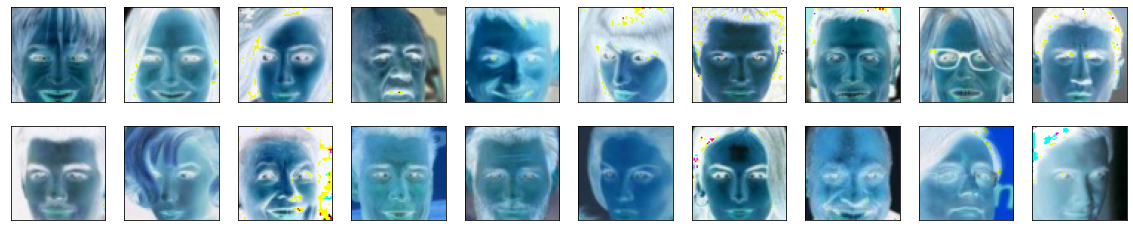

In [6]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""

def denormalize(images):
    """Transform images from [-1.0, 1.0] to [0, 255] and cast them to uint8."""
    return ((images + 1.) / 2. * 255).astype(np.uint8)

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
    img = dataset[idx].numpy()
    img = np.transpose(img, (1, 2, 0))
    img = denormalize(img)
    ax.imshow(img)

## Model implementation

As you know, a GAN is comprised of two adversarial networks, a discriminator and a generator. Now that we have a working data pipeline, we need to implement the discriminator and the generator. 

Feel free to implement any additional class or function.

### Exercise: Create the discriminator

The discriminator's job is to score real and fake images. You have two constraints here:
* the discriminator takes as input a **batch of 64x64x3 images**
* the output should be a single value (=score)

Feel free to get inspiration from the different architectures we talked about in the course, such as DCGAN, WGAN-GP or DRAGAN.

#### Some tips
* To scale down from the input image, you can either use `Conv2d` layers with the correct hyperparameters or Pooling layers.
* If you plan on using gradient penalty, do not use Batch Normalization layers in the discriminator.

In [7]:
from torch.nn import Module

In [8]:
import torch.nn as nn

In [9]:
class ConvBlock(nn.Module):
    """
    A convolutional block is made of 3 layers: Conv -> BatchNorm -> Activation.
    args:
    - in_channels: number of channels in the input to the conv layer
    - out_channels: number of filters in the conv layer
    - kernel_size: filter dimension of the conv layer
    - batch_norm: whether to use batch norm or not
    """
    def __init__(self, in_channels: int, out_channels: int, kernel_size: int, batch_norm: bool = True):
        super(ConvBlock, self).__init__()
        
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=2, padding=1, bias=False)
        self.batch_norm = batch_norm
        if self.batch_norm:
            self.bn = nn.BatchNorm2d(out_channels)
        self.activation = nn.LeakyReLU(0.2)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        if self.batch_norm:
            x = self.bn(x)
        x = self.activation(x)
        return x

In [10]:
class Discriminator(Module):
    def __init__(self,conv_dim = 64):
        super(Discriminator, self).__init__()
        # TODO: instantiate the different layers
        self.conv_dim = conv_dim
        
        self.conv1 = ConvBlock(3,conv_dim,4,batch_norm=False)
        self.conv2 = ConvBlock(conv_dim,conv_dim*2,4)
        self.conv3 = ConvBlock(conv_dim*2, conv_dim*4,4)
        
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(conv_dim*4*4*4*4,1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # TODO: implement the forward method
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        #x = self.flatten(x)
        x = x.view(-1, self.conv_dim*4*4*4*4)
        x = self.fc(x)
        x = torch.sigmoid(x)
        x = x.unsqueeze(2).unsqueeze(3)
        return x 

In [11]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to check your discriminator implementation
discriminator = Discriminator()
tests.check_discriminator(discriminator)

Congrats, your discriminator implementation passed all the tests


### Exercise: create the generator

The generator's job creates the "fake images" and learns the dataset distribution. You have three constraints here:
* the generator takes as input a vector of dimension `[batch_size, latent_dimension, 1, 1]`
* the generator must outputs **64x64x3 images**

Feel free to get inspiration from the different architectures we talked about in the course, such as DCGAN, WGAN-GP or DRAGAN.

#### Some tips:
* to scale up from the latent vector input, you can use `ConvTranspose2d` layers
* as often with Gan, **Batch Normalization** helps with training

In [12]:
class DeconvBlock(nn.Module):
    """
    A "de-convolutional" block is made of 3 layers: ConvTranspose -> BatchNorm -> Activation.
    args:
    - in_channels: number of channels in the input to the conv layer
    - out_channels: number of filters in the conv layer
    - kernel_size: filter dimension of the conv layer
    - stride: stride of the conv layer
    - padding: padding of the conv layer
    - batch_norm: whether to use batch norm or not
    """
    def __init__(self, 
                 in_channels: int, 
                 out_channels: int, 
                 kernel_size: int, 
                 stride: int,
                 padding: int,
                 batch_norm: bool = True):
        super(DeconvBlock, self).__init__()
        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.batch_norm = batch_norm
        if self.batch_norm:
            self.bn = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.deconv(x)
        if self.batch_norm:
            x = self.bn(x)
        x = self.activation(x)
        return x

In [13]:
class Generator(Module):
    def __init__(self, latent_dim: int,conv_dim: int = 64):
        super(Generator, self).__init__()
        # TODO: instantiate the different layers
        self.latent_dim = latent_dim
        self.conv_dim = conv_dim
        self.deconv1 = DeconvBlock(latent_dim, conv_dim*8, 4, 1, 0)
        self.deconv2 = DeconvBlock(conv_dim*8, conv_dim*4, 4, 2, 1)
        self.deconv3 = DeconvBlock(conv_dim*4, conv_dim*2, 4, 2, 1)
        self.deconv4 = DeconvBlock(conv_dim*2, conv_dim, 4, 2, 1)
        
        
        self.deconv5 = nn.ConvTranspose2d(conv_dim, 3, 4, stride=2, padding=1)
        self.last_activation = nn.Tanh()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # TODO: implement the forward method
        x = self.deconv1(x)
        #print(x.size)
        
        x = self.deconv2(x)
        x = self.deconv3(x)
        x = self.deconv4(x)
        x = self.deconv5(x)
        x = self.last_activation(x)
        return x

In [14]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to verify your generator implementation
latent_dim = 128
generator = Generator(latent_dim)
tests.check_generator(generator, latent_dim)

Congrats, your generator implementation passed all the tests


## Optimizer

In the following section, we create the optimizers for the generator and discriminator. You may want to experiment with different optimizers, learning rates and other hyperparameters as they tend to impact the output quality.

### Exercise: implement the optimizers

In [15]:
import torch.optim as optim


def create_optimizers(generator: Module, discriminator: Module):
    """ This function should return the optimizers of the generator and the discriminator """
    # TODO: implement the generator and discriminator optimizers
    lr = 0.0002
    beta1=0.5
    beta2=0.999 # default value
    
    g_optimizer = optim.Adam(discriminator.parameters(), lr, [beta1, beta2])
    d_optimizer =optim.Adam(generator.parameters(), lr, [beta1, beta2])
    return g_optimizer, d_optimizer

## Losses implementation

In this section, we are going to implement the loss function for the generator and the discriminator. You can and should experiment with different loss function.

Some tips:
* You can choose the commonly used the binary cross entropy loss or select other losses we have discovered in the course, such as the Wasserstein distance.
* You may want to implement a gradient penalty function as discussed in the course. It is not required and the code will work whether you implement it or not.

### Exercise: implement the generator loss

The generator's goal is to get the discriminator to think its generated images (= "fake" images) are real.

In [16]:
def real_loss(D_out, train_on_gpu=False,smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out,train_on_gpu=False):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss


In [17]:
def generator_loss(fake_logits,train_on_gpu=False):
    """ Generator loss, takes the fake scores as inputs. """
    # TODO: implement the generator loss
    loss = real_loss(fake_logits,train_on_gpu)
    return loss

### Exercise: implement the discriminator loss

We want the discriminator to give high scores to real images and low scores to fake ones and the discriminator loss should reflect that.

In [18]:
def discriminator_loss(real_logits, fake_logits,train_on_gpu=False):
    """ Discriminator loss, takes the fake and real logits as inputs. """
    # TODO: implement the discriminator loss
    d_real_loss = real_loss(real_logits,train_on_gpu)
    d_fake_loss = real_loss(fake_logits,train_on_gpu)
    loss = d_real_loss + d_fake_loss
    return loss

### Exercise (Optional): Implement the gradient Penalty

In the course, we discussed the importance of gradient penalty in training certain types of Gans. Implementing this function is not required and depends on some of the design decision you made (discriminator architecture, loss functions).

In [19]:
def gradient_penalty(discriminator, real_samples, fake_samples):
    """ This function enforces """
    gp = 0
    # TODO (Optional): implement the gradient penalty
    return gp

## Training


Training will involve alternating between training the discriminator and the generator. You'll use your functions real_loss and fake_loss to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function

### Exercise: implement the generator step and the discriminator step functions

Each function should do the following:
* calculate the loss
* backpropagate the gradient
* perform one optimizer step

In [20]:
def generator_step(batch_size: int, latent_dim: int) -> Dict:
    """ One training step of the generator. """
    # TODO: implement the generator step (foward pass, loss calculation and backward pass)
    z = np.random.uniform(-1, 1, size=(batch_size, latent_dim, 1, 1))
    z = torch.from_numpy(z).float()
    if train_on_gpu:
        z = z.cuda()

    fake_images = generator(z)

    d_fake = discriminator(fake_images)
    g_loss = generator_loss(d_fake,train_on_gpu)

    g_loss.backward()
    g_optimizer.step()
    return {'loss': g_loss}


def discriminator_step(batch_size: int, latent_dim: int, real_images: torch.Tensor) -> Dict:
    """ One training step of the discriminator. """
    # TODO: implement the discriminator step (foward pass, loss calculation and backward pass)
    gp = 0
    d_optimizer.zero_grad()
    if(train_on_gpu):
        real_images = real_images.cuda()
        
    d_real = discriminator(real_images)
        
        
    z = np.random.uniform(-1, 1, size=(batch_size, latent_dim, 1, 1))
    z = torch.from_numpy(z).float()
        
    if train_on_gpu:
        z = z.cuda()
    fake_images = generator(z)

    d_fake = discriminator(fake_images.detach())
        
    d_loss = discriminator_loss(d_real,d_fake,train_on_gpu)
       
        
    d_loss.backward()
    d_optimizer.step()
    
    return {'loss': d_loss, 'gp': gp}
    

### Main training loop

You don't have to implement anything here but you can experiment with different hyperparameters.

In [21]:
from datetime import datetime

In [22]:
# you can experiment with different dimensions of latent spaces
latent_dim = 128

# update to cpu if you do not have access to a gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_on_gpu = (True if torch.cuda.is_available() else False)

# number of epochs to train your model
n_epochs = 1

# number of images in each batch
batch_size = 64

In [23]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
print_every = 50

# Create optimizers for the discriminator D and generator G
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
g_optimizer, d_optimizer = create_optimizers(generator, discriminator)

dataloader = DataLoader(dataset, 
                        batch_size=64, 
                        shuffle=True, 
                        num_workers=4, 
                        drop_last=True,
                        pin_memory=False)

In [24]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""

def display(fixed_latent_vector: torch.Tensor):
    """ helper function to display images during training """
    fig = plt.figure(figsize=(14, 4))
    plot_size = 16
    for idx in np.arange(plot_size):
        ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
        img = fixed_latent_vector[idx, ...].detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = denormalize(img)
        ax.imshow(img)
    plt.show()

### Exercise: implement the training strategy

You should experiment with different training strategies. For example:

* train the generator more often than the discriminator. 
* added noise to the input image
* use label smoothing

Implement with your training strategy below.

2023-08-21 23:20:38 | Epoch [1/1] | Batch 0/509 | d_loss: 0.9823 | g_loss: 0.4931
2023-08-21 23:27:48 | Epoch [1/1] | Batch 50/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-21 23:35:42 | Epoch [1/1] | Batch 100/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-21 23:42:56 | Epoch [1/1] | Batch 150/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-21 23:50:43 | Epoch [1/1] | Batch 200/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-21 23:58:02 | Epoch [1/1] | Batch 250/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-22 00:06:11 | Epoch [1/1] | Batch 300/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-22 00:13:32 | Epoch [1/1] | Batch 350/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-22 00:21:32 | Epoch [1/1] | Batch 400/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-22 00:29:17 | Epoch [1/1] | Batch 450/509 | d_loss: 0.6265 | g_loss: 0.3133
2023-08-22 00:37:11 | Epoch [1/1] | Batch 500/509 | d_loss: 0.6265 | g_loss: 0.3133


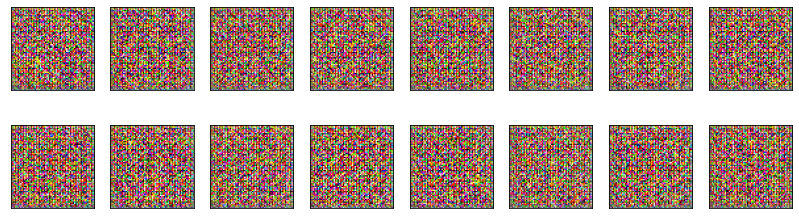

In [25]:
fixed_latent_vector = torch.randn(16, latent_dim, 1, 1).float().cuda()

losses = []

for epoch in range(n_epochs):
    for batch_i, real_images in enumerate(dataloader):
        real_images = real_images.to(device)
        
        ####################################
        
        # TODO: implement the training strategy
        
        ####################################
        d_loss = discriminator_step(batch_size, latent_dim, real_images)
        g_loss = generator_step(batch_size,latent_dim)
        
        
        if batch_i % print_every == 0:
            # append discriminator loss and generator loss
            d = d_loss['loss'].item()
            g = g_loss['loss'].item()
            #d = d_loss.item()
            #g = g_loss.item()
            losses.append((d, g))
            # print discriminator and generator loss
            time = str(datetime.now()).split('.')[0]
            print(f'{time} | Epoch [{epoch+1}/{n_epochs}] | Batch {batch_i}/{len(dataloader)} | d_loss: {d:.4f} | g_loss: {g:.4f}')
    
    # display images during training
    generator.eval()
    generated_images = generator(fixed_latent_vector)
    display(generated_images)
    generator.train()

### Training losses

Plot the training losses for the generator and discriminator.

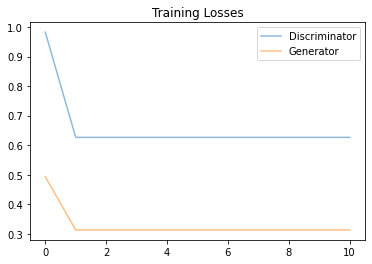

In [26]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result
* Loss functions

**Answer:** (Write your answer in this cell)

My samples are all static.  I'm sure I have something wrong, but I'm not sure what.  I've looked at the code and the framework many times and can't figure it out.  I've used the solution from one of the exercises as my framework as well as the example from https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html?highlight=training%20loop

The d_loss and g_loss both seem to freeze at the same values after the first batch.  I got the same results on my local PC as well.

Each epoch takes a long time so I don't want to just keep going when I believe I have a problem.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb".  

Submit the notebook using the ***SUBMIT*** button in the bottom right corner of the Project Workspace.